Package install and import

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import os
import pickle
import openpyxl

Loading the dataset

In [37]:
# Đọc file data.pkl
df = pd.read_pickle('data/clean/cars.pkl')
df.head()

Tên hãng xe  Năm sản xuất    Tỉnh  Số Km đã đi    Xuất xứ  Kiểu dáng  \
0        Audi          2020  TP HCM      30000.0  Nhập khẩu      Sedan   
1        Audi          2014  Hà Nội      94000.0  Nhập khẩu      Sedan   
2        Audi          2016  TP HCM      50000.0  Nhập khẩu      Sedan   
3        Audi          2016  Hà Nội      76000.0  Nhập khẩu  Crossover   
4        Audi          2016  Hà Nội      90000.0  Nhập khẩu        SUV   

       Hộp số Màu ngoại thất Màu nội thất  Số chỗ ngồi  Số cửa Dẫn động  \
0  Số tự động            Đen          Đen            5       4      AWD   
1  Số tự động           Xanh          Nâu            5       4      FWD   
2  Số tự động            Đen          Đen            5       4      FWD   
3  Số tự động           Xanh          Đen            5       5      AWD   
4  Số tự động          Trắng          Kem            5       5      AWD   

  Loại động cơ  Dung tích     Giá  
0         Xăng        3.0  2950.0  
1         Xăng        2.0   560.0  
2         Xăng        2.0   690.0  
3         Xăng        2.0   699.0  
4         Xăng        2.0   739.0

Kiểm tra các cột số

In [38]:
df.select_dtypes(include="number").columns

Index(['Năm sản xuất', 'Số Km đã đi', 'Số chỗ ngồi', 'Số cửa', 'Dung tích',
       'Giá'],
      dtype='object')

Kiểm tra các cột phân loại

In [39]:
df.select_dtypes(include="object").columns

Index(['Tên hãng xe', 'Tỉnh', 'Xuất xứ', 'Kiểu dáng', 'Hộp số',
       'Màu ngoại thất', 'Màu nội thất', 'Dẫn động', 'Loại động cơ'],
      dtype='object')

## Exploratory analysis and Visualization

### Visualization

In [40]:
df = pd.read_pickle('data/clean/cars.pkl')

In [41]:
df.head()


Tên hãng xe  Năm sản xuất    Tỉnh  Số Km đã đi    Xuất xứ  Kiểu dáng  \
0        Audi          2020  TP HCM      30000.0  Nhập khẩu      Sedan   
1        Audi          2014  Hà Nội      94000.0  Nhập khẩu      Sedan   
2        Audi          2016  TP HCM      50000.0  Nhập khẩu      Sedan   
3        Audi          2016  Hà Nội      76000.0  Nhập khẩu  Crossover   
4        Audi          2016  Hà Nội      90000.0  Nhập khẩu        SUV   

       Hộp số Màu ngoại thất Màu nội thất  Số chỗ ngồi  Số cửa Dẫn động  \
0  Số tự động            Đen          Đen            5       4      AWD   
1  Số tự động           Xanh          Nâu            5       4      FWD   
2  Số tự động            Đen          Đen            5       4      FWD   
3  Số tự động           Xanh          Đen            5       5      AWD   
4  Số tự động          Trắng          Kem            5       5      AWD   

  Loại động cơ  Dung tích     Giá  
0         Xăng        3.0  2950.0  
1         Xăng        2.0   560.0  
2         Xăng        2.0   690.0  
3         Xăng        2.0   699.0  
4         Xăng        2.0   739.0

In [42]:
df.shape

(25582, 15)

Biểu đồ countplot và pie tần xuất các giá trị ở các cột

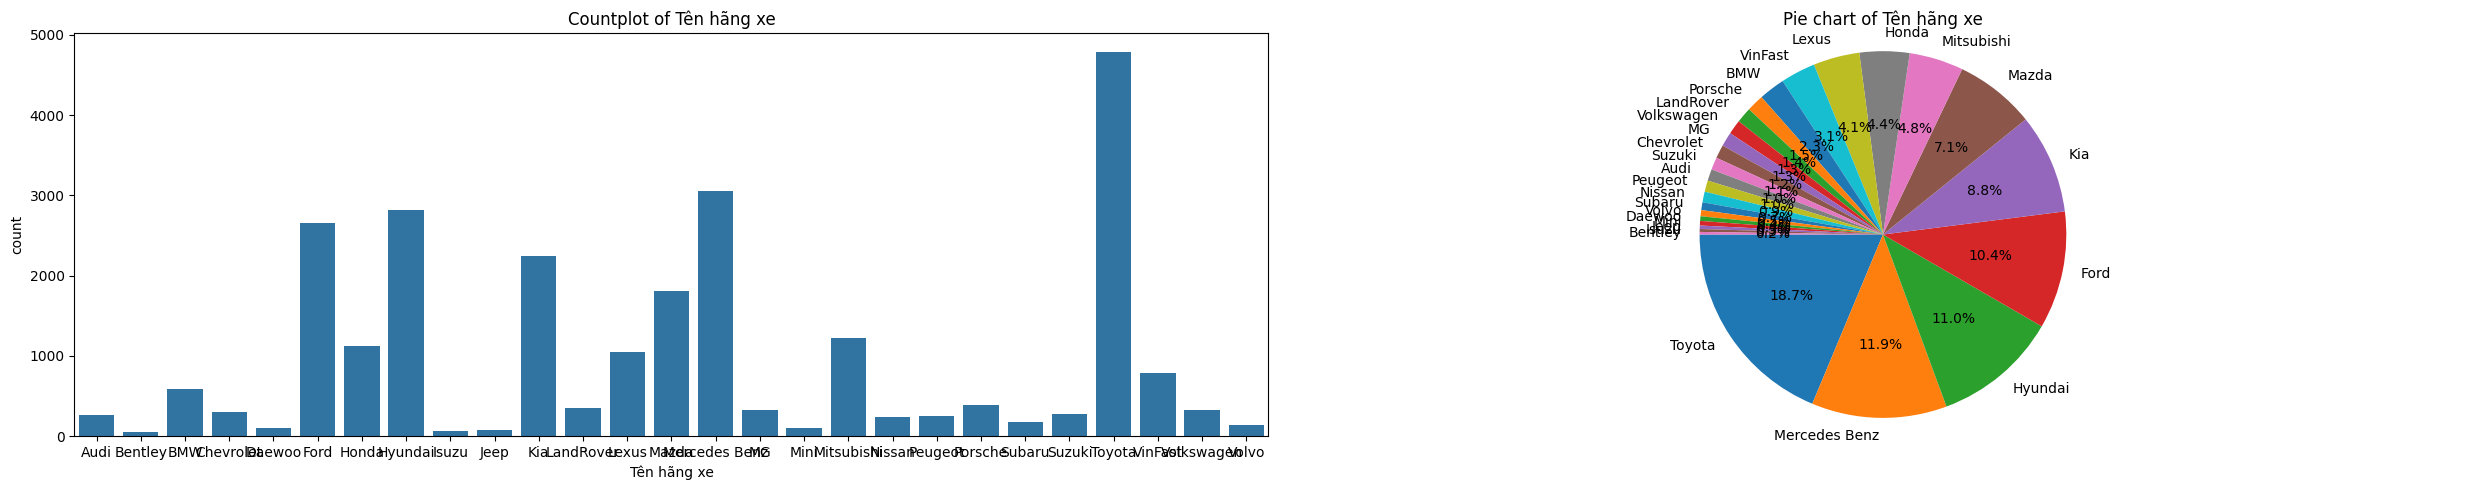

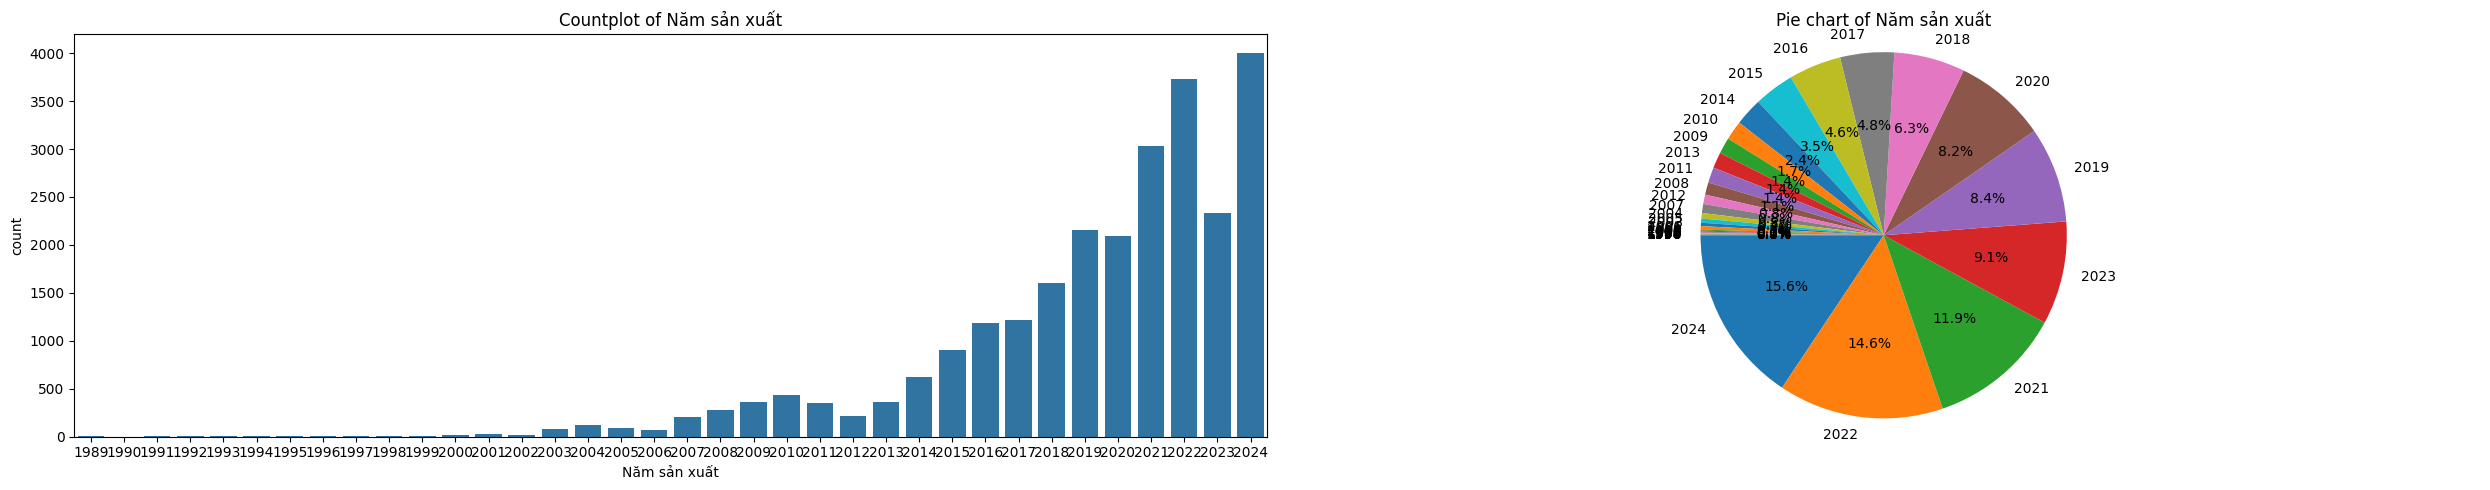

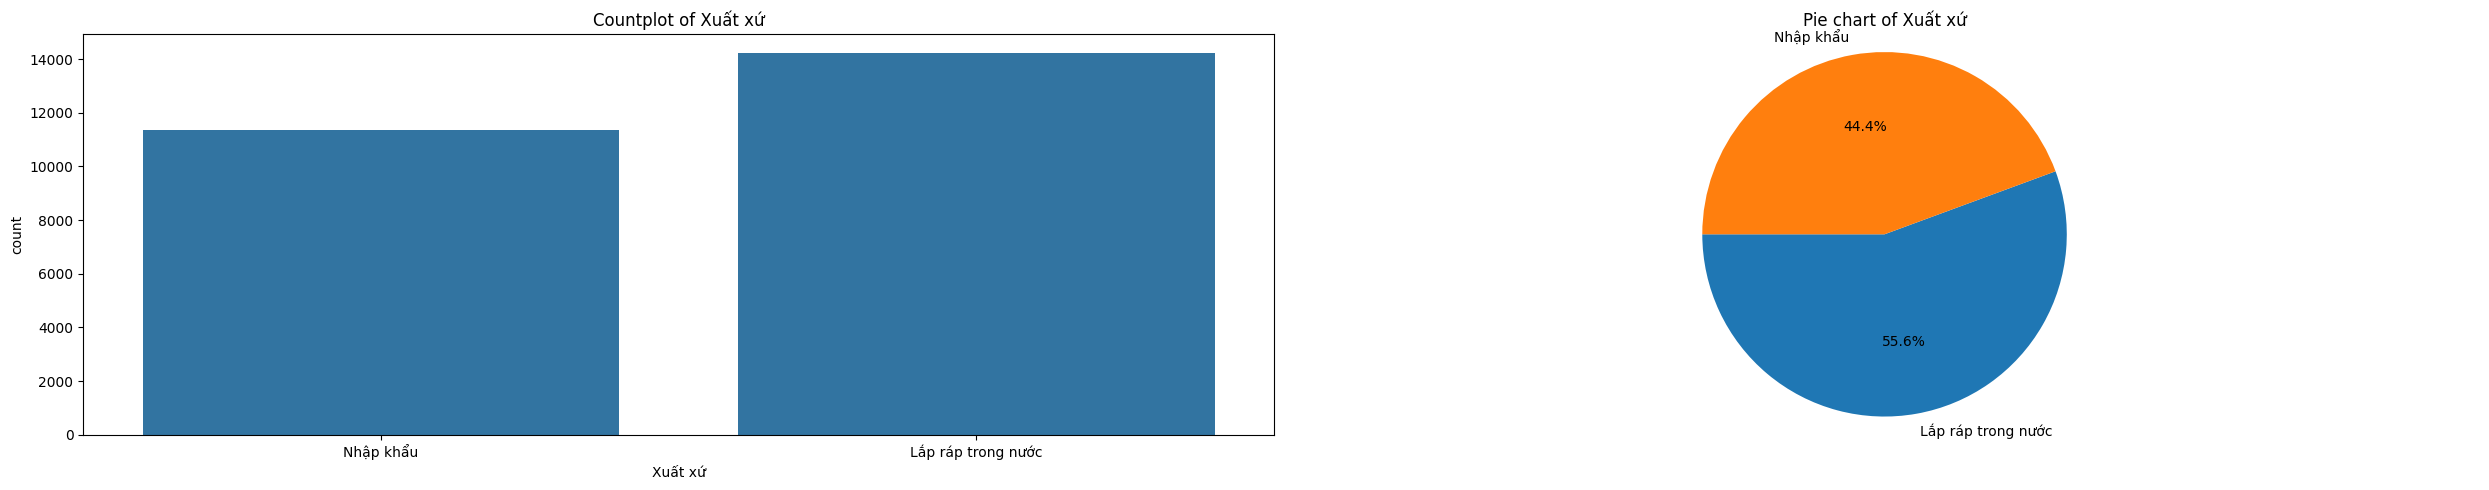

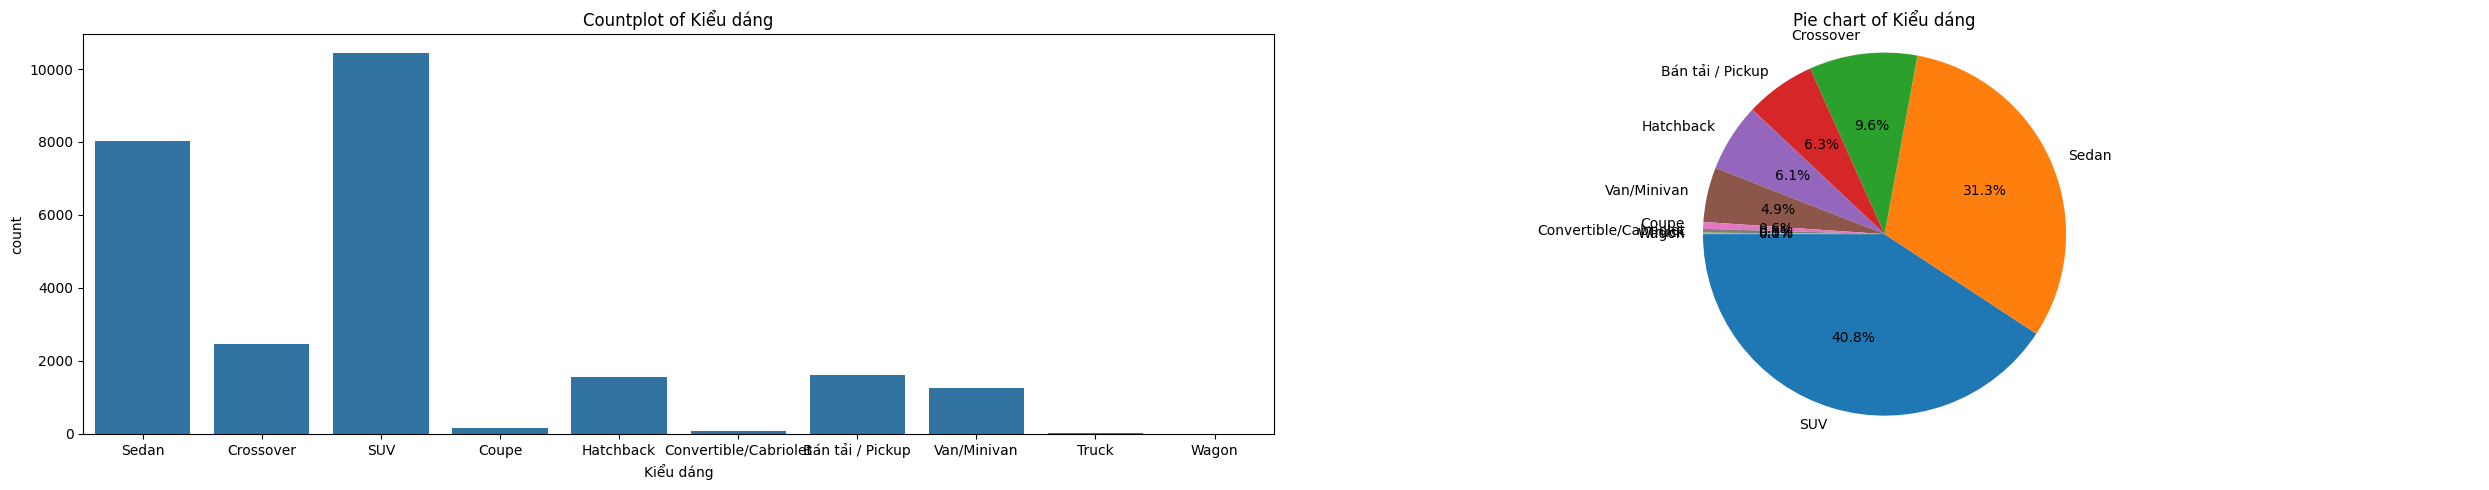

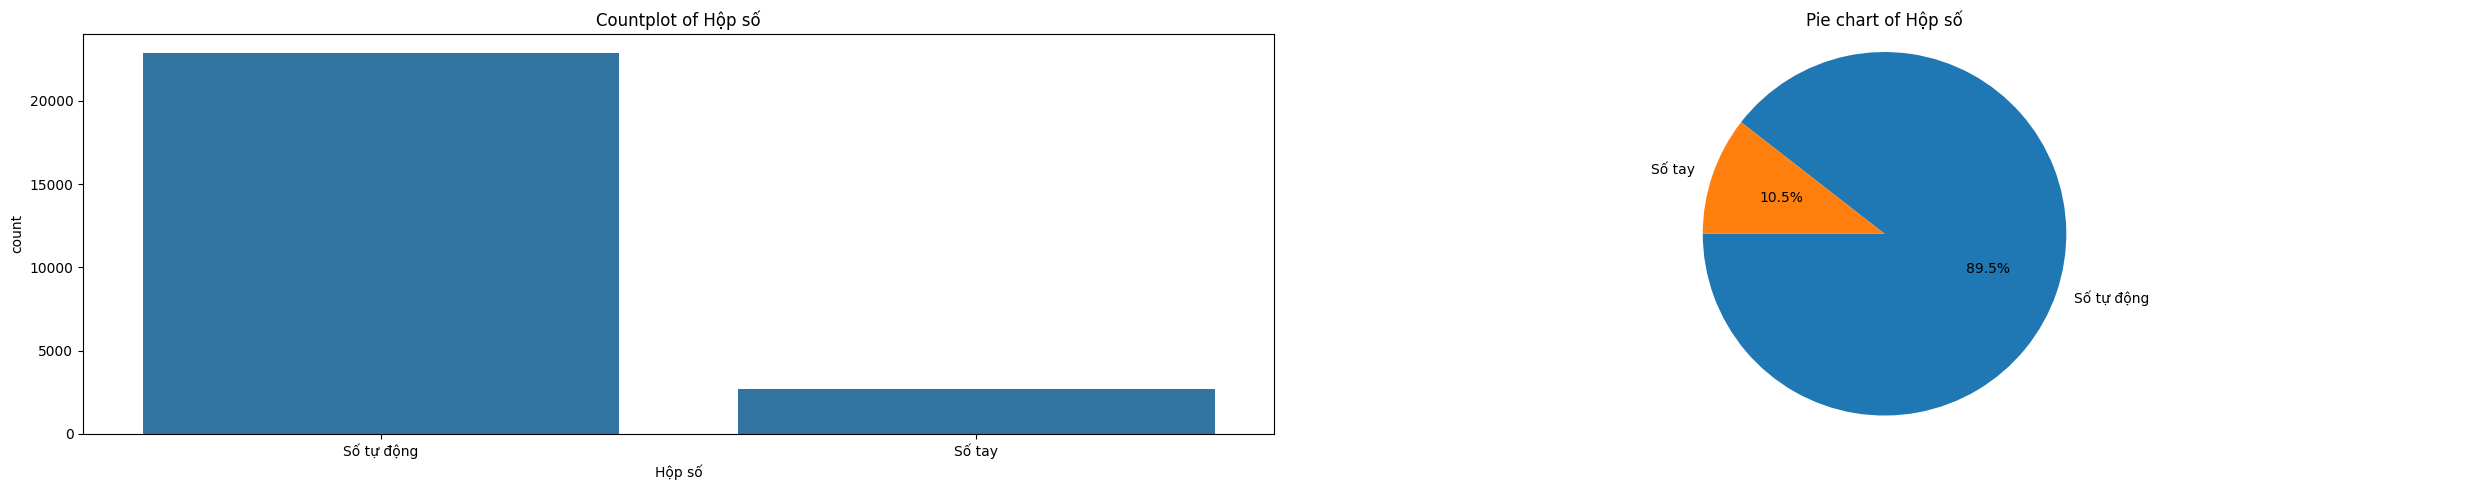

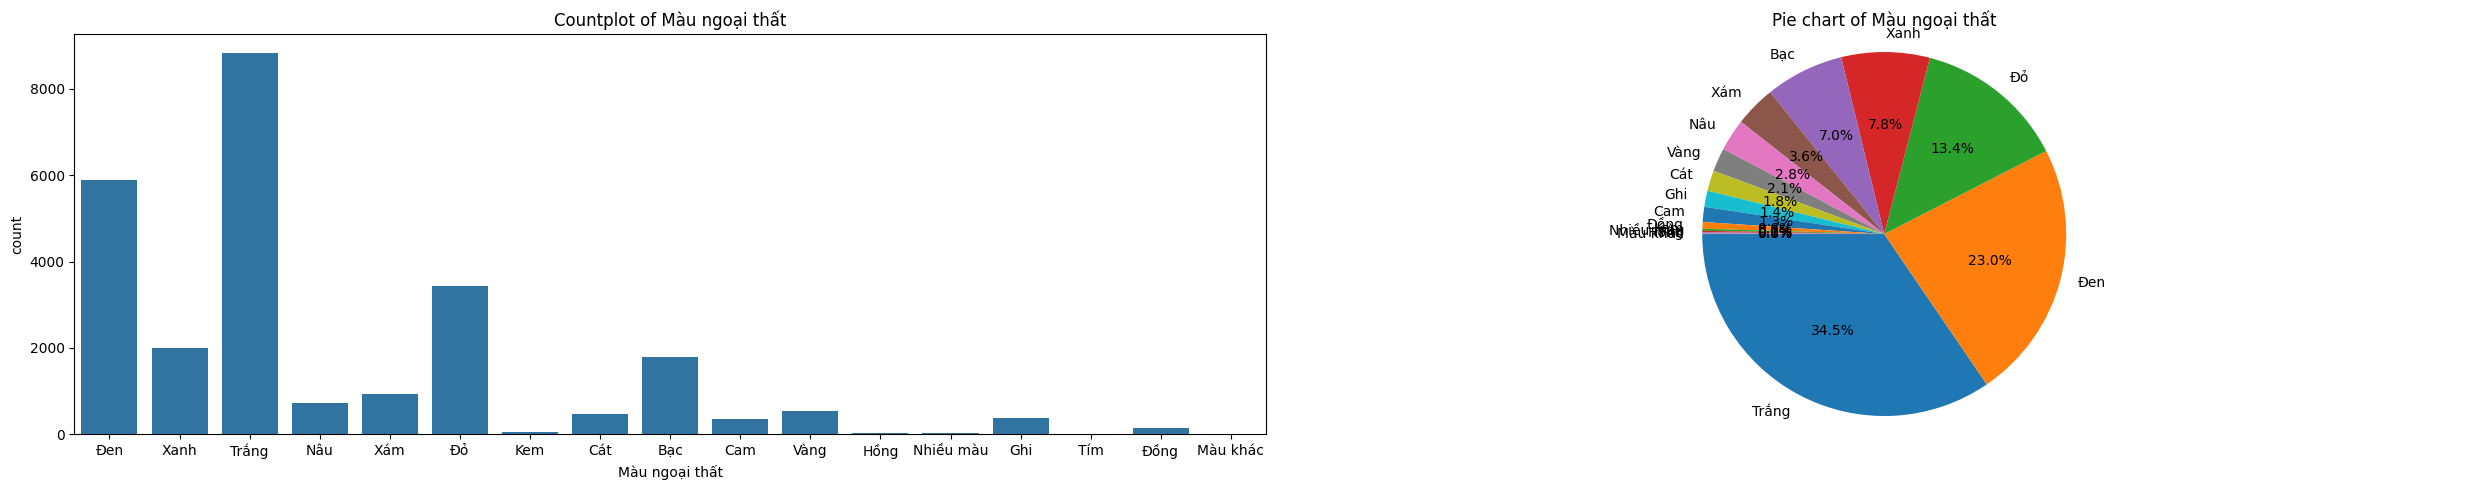

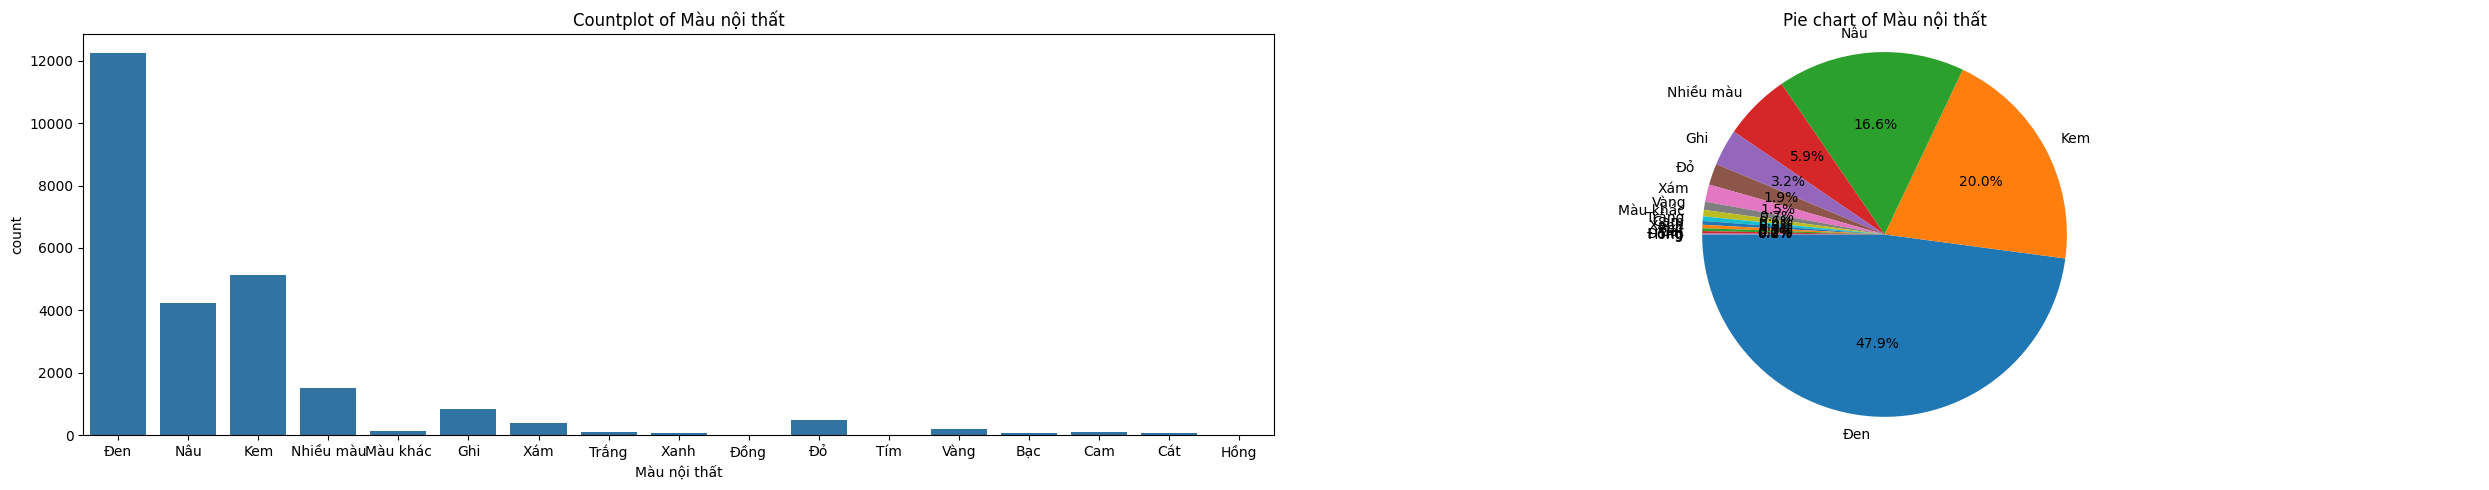

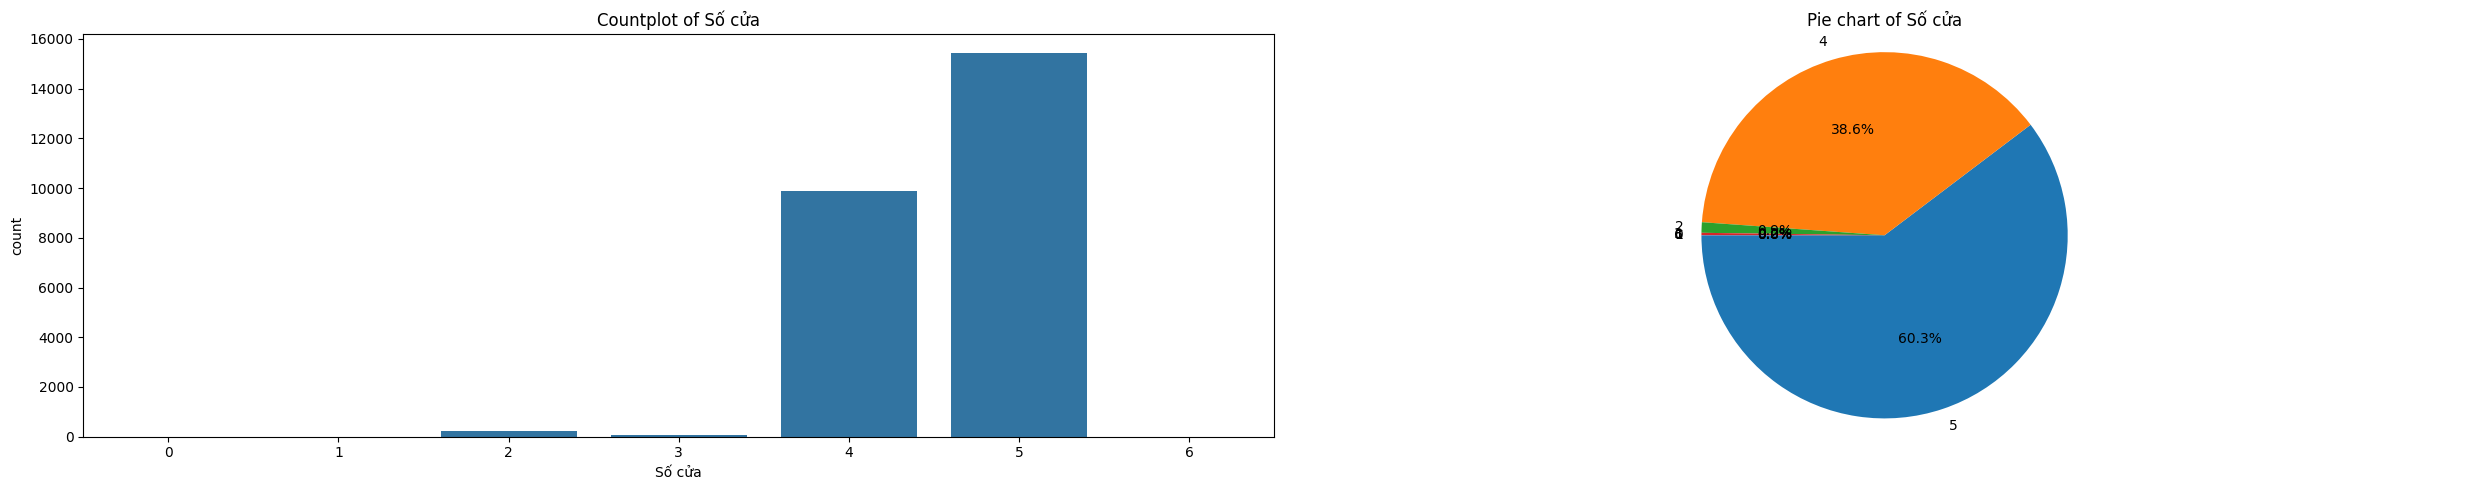

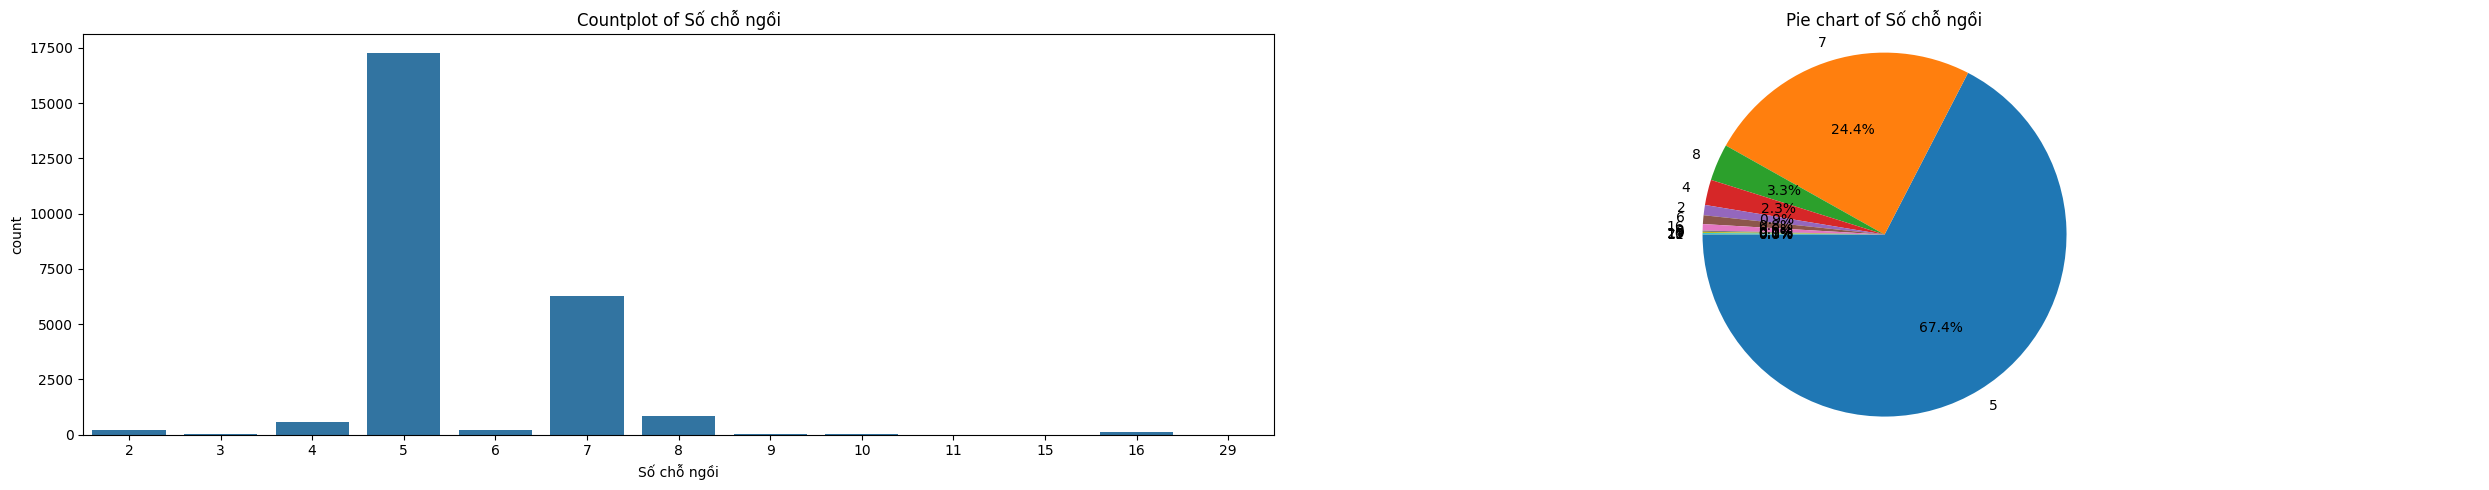

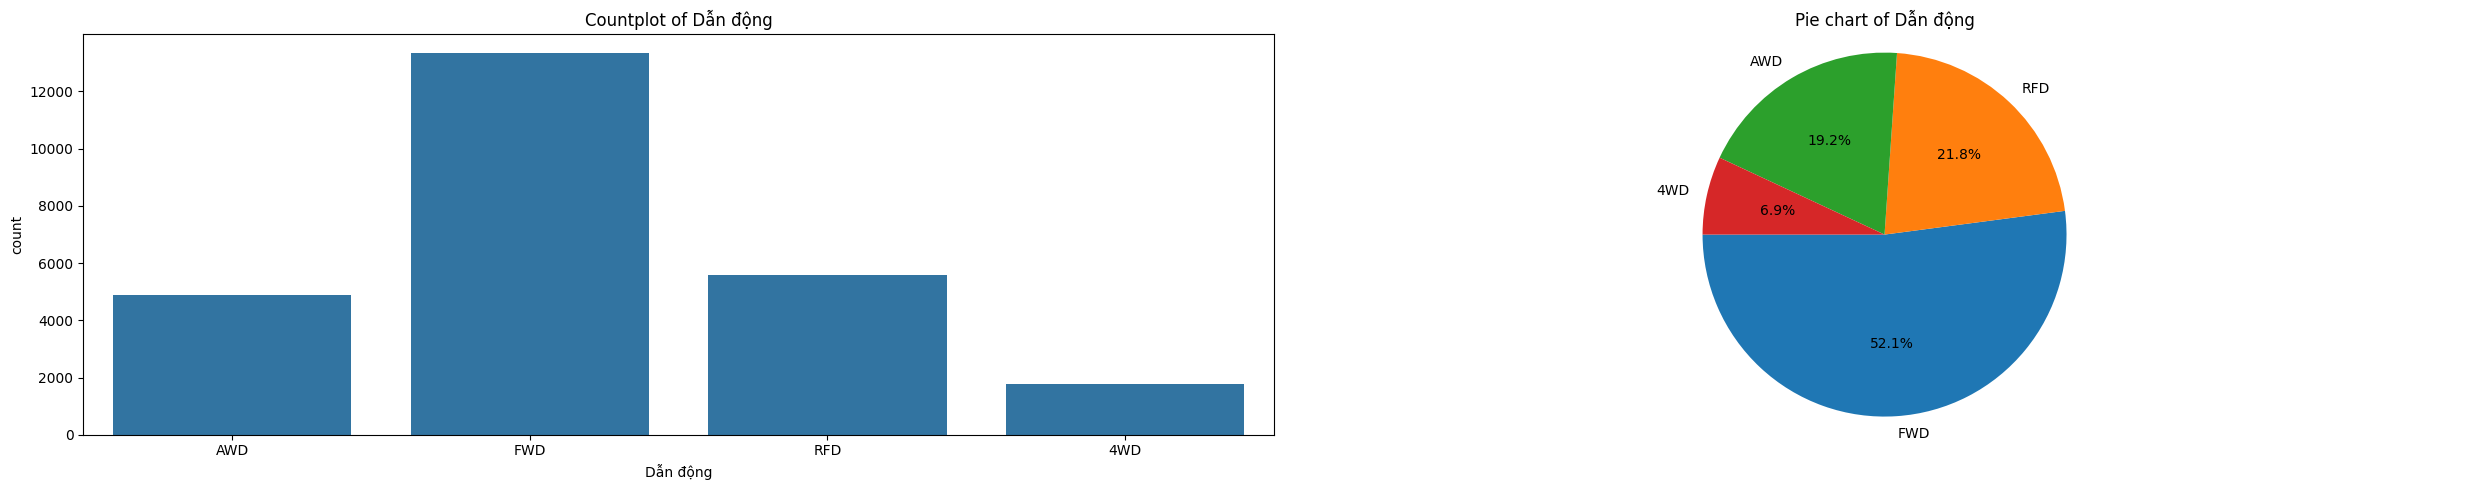

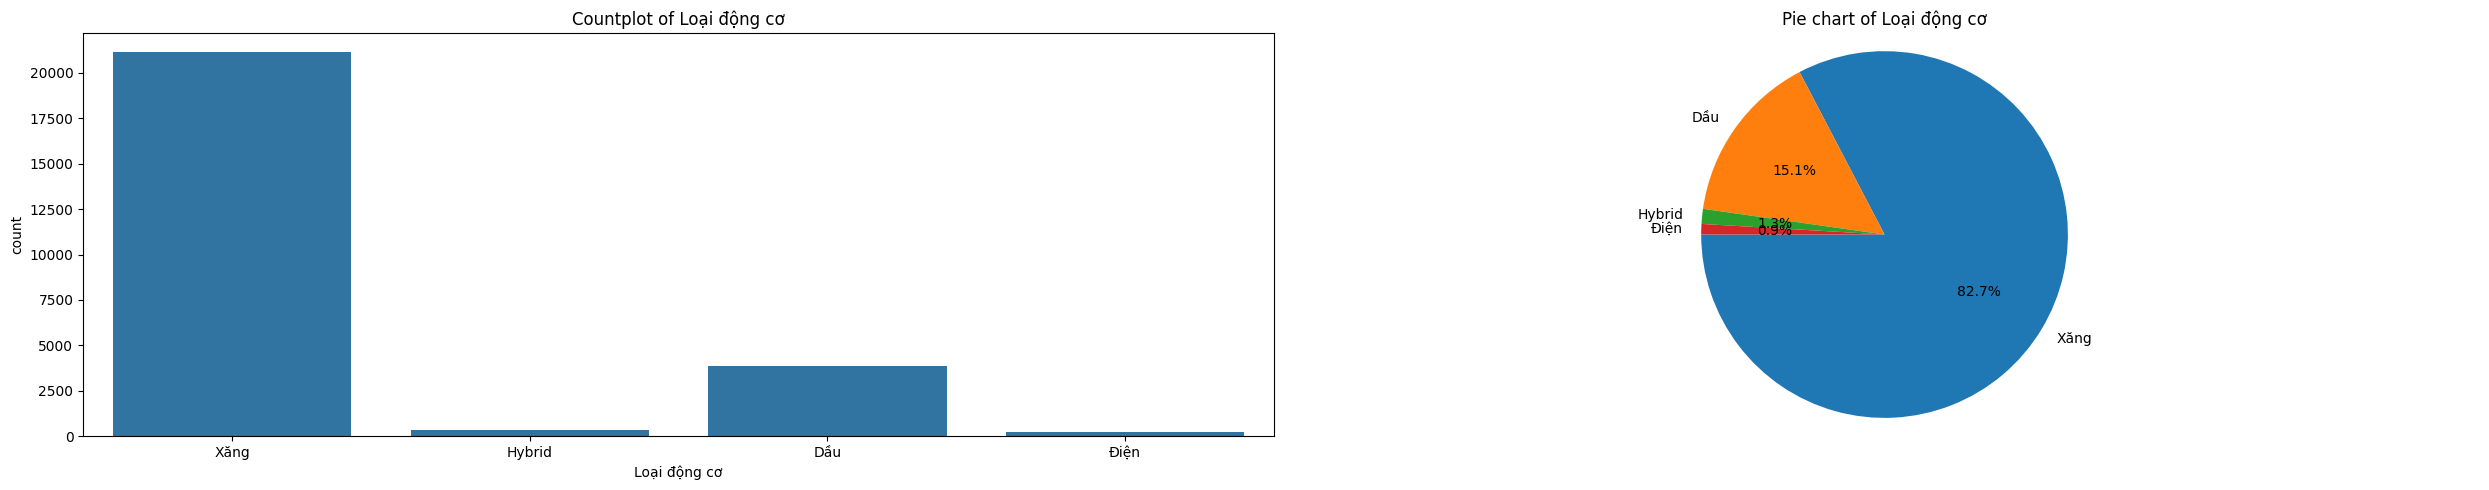

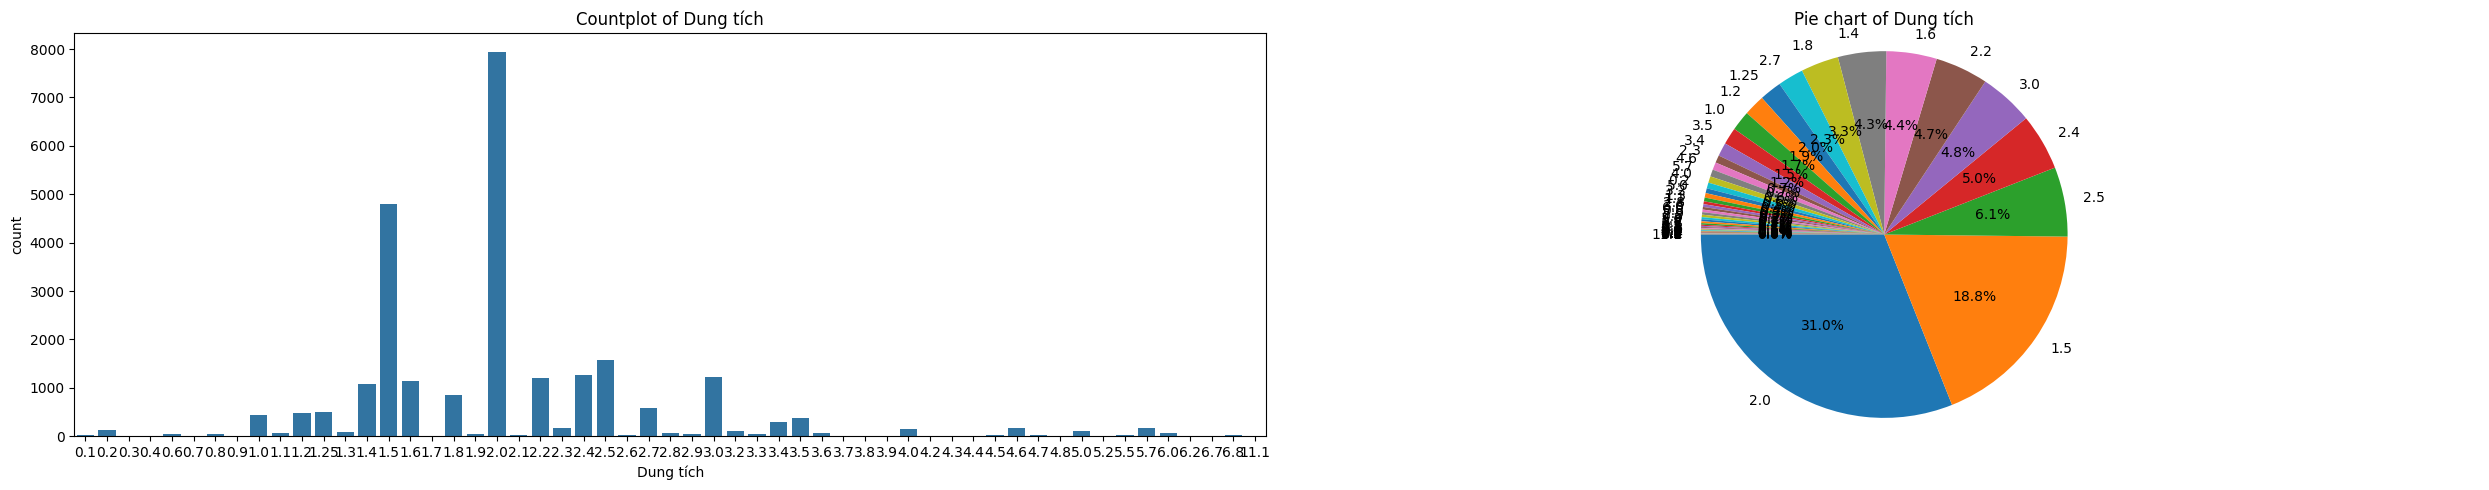

In [43]:
for column in ['Tên hãng xe', 'Năm sản xuất', 'Xuất xứ', 'Kiểu dáng','Hộp số','Màu ngoại thất', 'Màu nội thất', 'Số cửa', 'Số chỗ ngồi', 'Dẫn động', 'Loại động cơ', 'Dung tích']:
        # Tạo figure và axes cho countplot và pie chart
        fig, axs = plt.subplots(1, 2, figsize=(25, 5))

        # Vẽ countplot
        sns.countplot(x=column, data=df, ax=axs[0])
        axs[0].set_title(f'Countplot of {column}')

        # Đếm số lượng giá trị duy nhất trong cột và vẽ pie chart
        value_counts = df[column].value_counts()
        axs[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=180)
        axs[1].set_title(f'Pie chart of {column}')
        axs[1].axis('equal')  # Đảm bảo biểu đồ pie là hình tròn

        # Hiển thị biểu đồ
        plt.tight_layout()
        plt.show()

Bảng tần xuất các giá trị ở các cột còn lại

In [44]:
column = ["Tỉnh"]
element_count_df = df[column].value_counts().to_frame().reset_index()
element_count_df.columns = ['Tỉnh', 'Count']
print(f"Column '{column}':")
print(element_count_df)
print()

Column '['Tỉnh']':
          Tỉnh  Count
0       Hà Nội  14801
1       TP HCM   5518
2    Hải Phòng    553
3   Bình Dương    472
4      Nghệ An    299
..         ...    ...
58   Vĩnh Long      4
59    Trà Vinh      3
60    Lai Châu      3
61    Cao Bằng      1
62    Bạc Liêu      1

[63 rows x 2 columns]



## Checking distribution

#### Giá

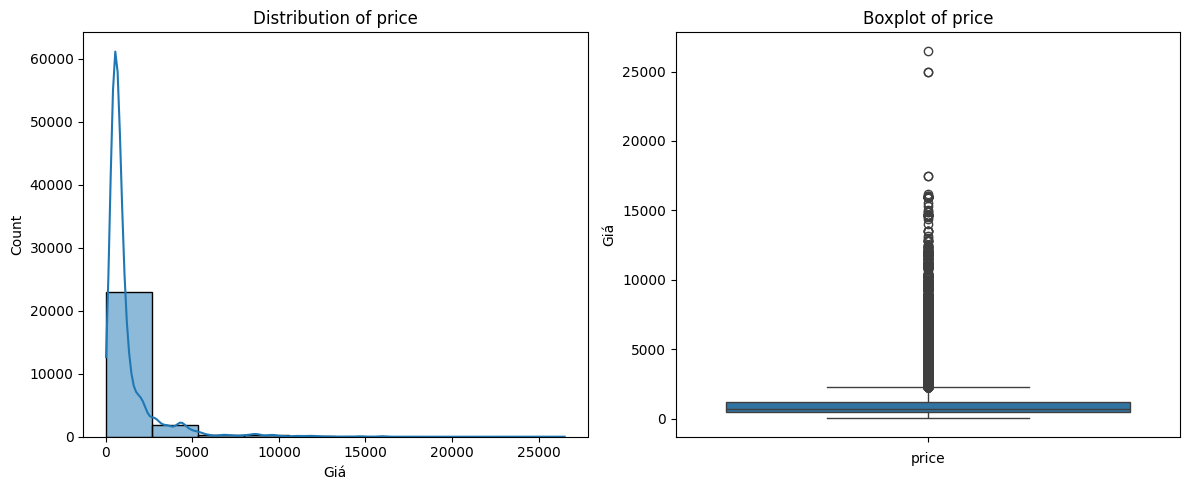

In [45]:
fig,axes=plt.subplots(1,2,figsize=(12,5))

# Distribution plot for the "Giá" column
sns.histplot(df['Giá'], kde=True, bins=10, ax=axes[0])
axes[0].set_title("Distribution of price")
axes[0].set_xlabel("Giá")
axes[0].set_ylabel("Count")

# Boxplot plot for the "Giá" column
sns.boxplot(data=df, y='Giá',ax=axes[1])
axes[1].set_title("Boxplot of price")
axes[1].set_xlabel("price")

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

* Phân bố giá có độ lệch dương
* Có một số ngoại lệ được quan sát thấy 

In [46]:
# Giảm độ lớn của giá
df['Giá']=np.log(df['Giá'])

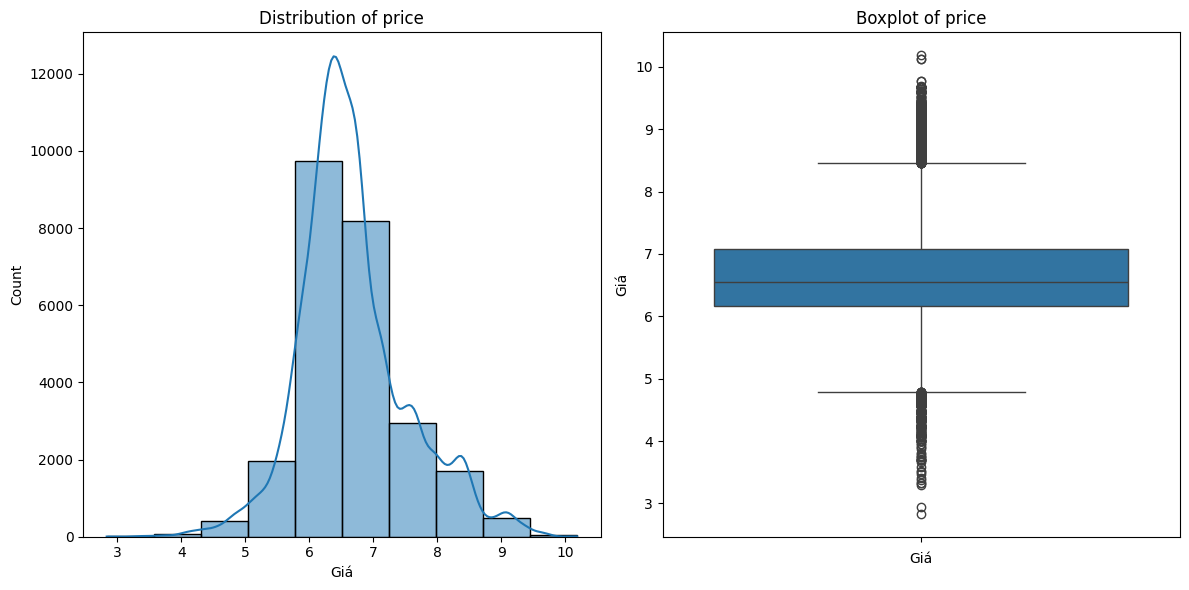

In [47]:
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Distribution plot for the "Giá" column
sns.histplot(df['Giá'], kde=True, bins=10, ax=axes[0])
axes[0].set_title("Distribution of price")
axes[0].set_xlabel("Giá")
axes[0].set_ylabel("Count")

# Boxplot plot for the "price" column
sns.boxplot(data=df, y='Giá',ax=axes[1])
axes[1].set_title("Boxplot of price")
axes[1].set_xlabel("Giá")

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

In [48]:
# Chọn các cột có kiểu dữ liệu số
numeric_df = df.select_dtypes(include=['number'])

# Tính toán ma trận tương quan cho các cột số
numeric_df.corr().loc['Giá']

Năm sản xuất    0.470546
Số Km đã đi    -0.021678
Số chỗ ngồi     0.035355
Số cửa          0.115266
Dung tích       0.525127
Giá             1.000000
Name: Giá, dtype: float64

In [49]:
# Tương quan
numeric_df.corr()

Năm sản xuất  Số Km đã đi  Số chỗ ngồi    Số cửa  Dung tích  \
Năm sản xuất      1.000000    -0.020696     0.004766  0.101617  -0.228591   
Số Km đã đi      -0.020696     1.000000    -0.002573  0.003735  -0.007702   
Số chỗ ngồi       0.004766    -0.002573     1.000000  0.327240   0.163895   
Số cửa            0.101617     0.003735     0.327240  1.000000   0.036517   
Dung tích        -0.228591    -0.007702     0.163895  0.036517   1.000000   
Giá               0.470546    -0.021678     0.035355  0.115266   0.525127   

                   Giá  
Năm sản xuất  0.470546  
Số Km đã đi  -0.021678  
Số chỗ ngồi   0.035355  
Số cửa        0.115266  
Dung tích     0.525127  
Giá           1.000000

Biểu đồ heatmap giữa các cột số và cột giá


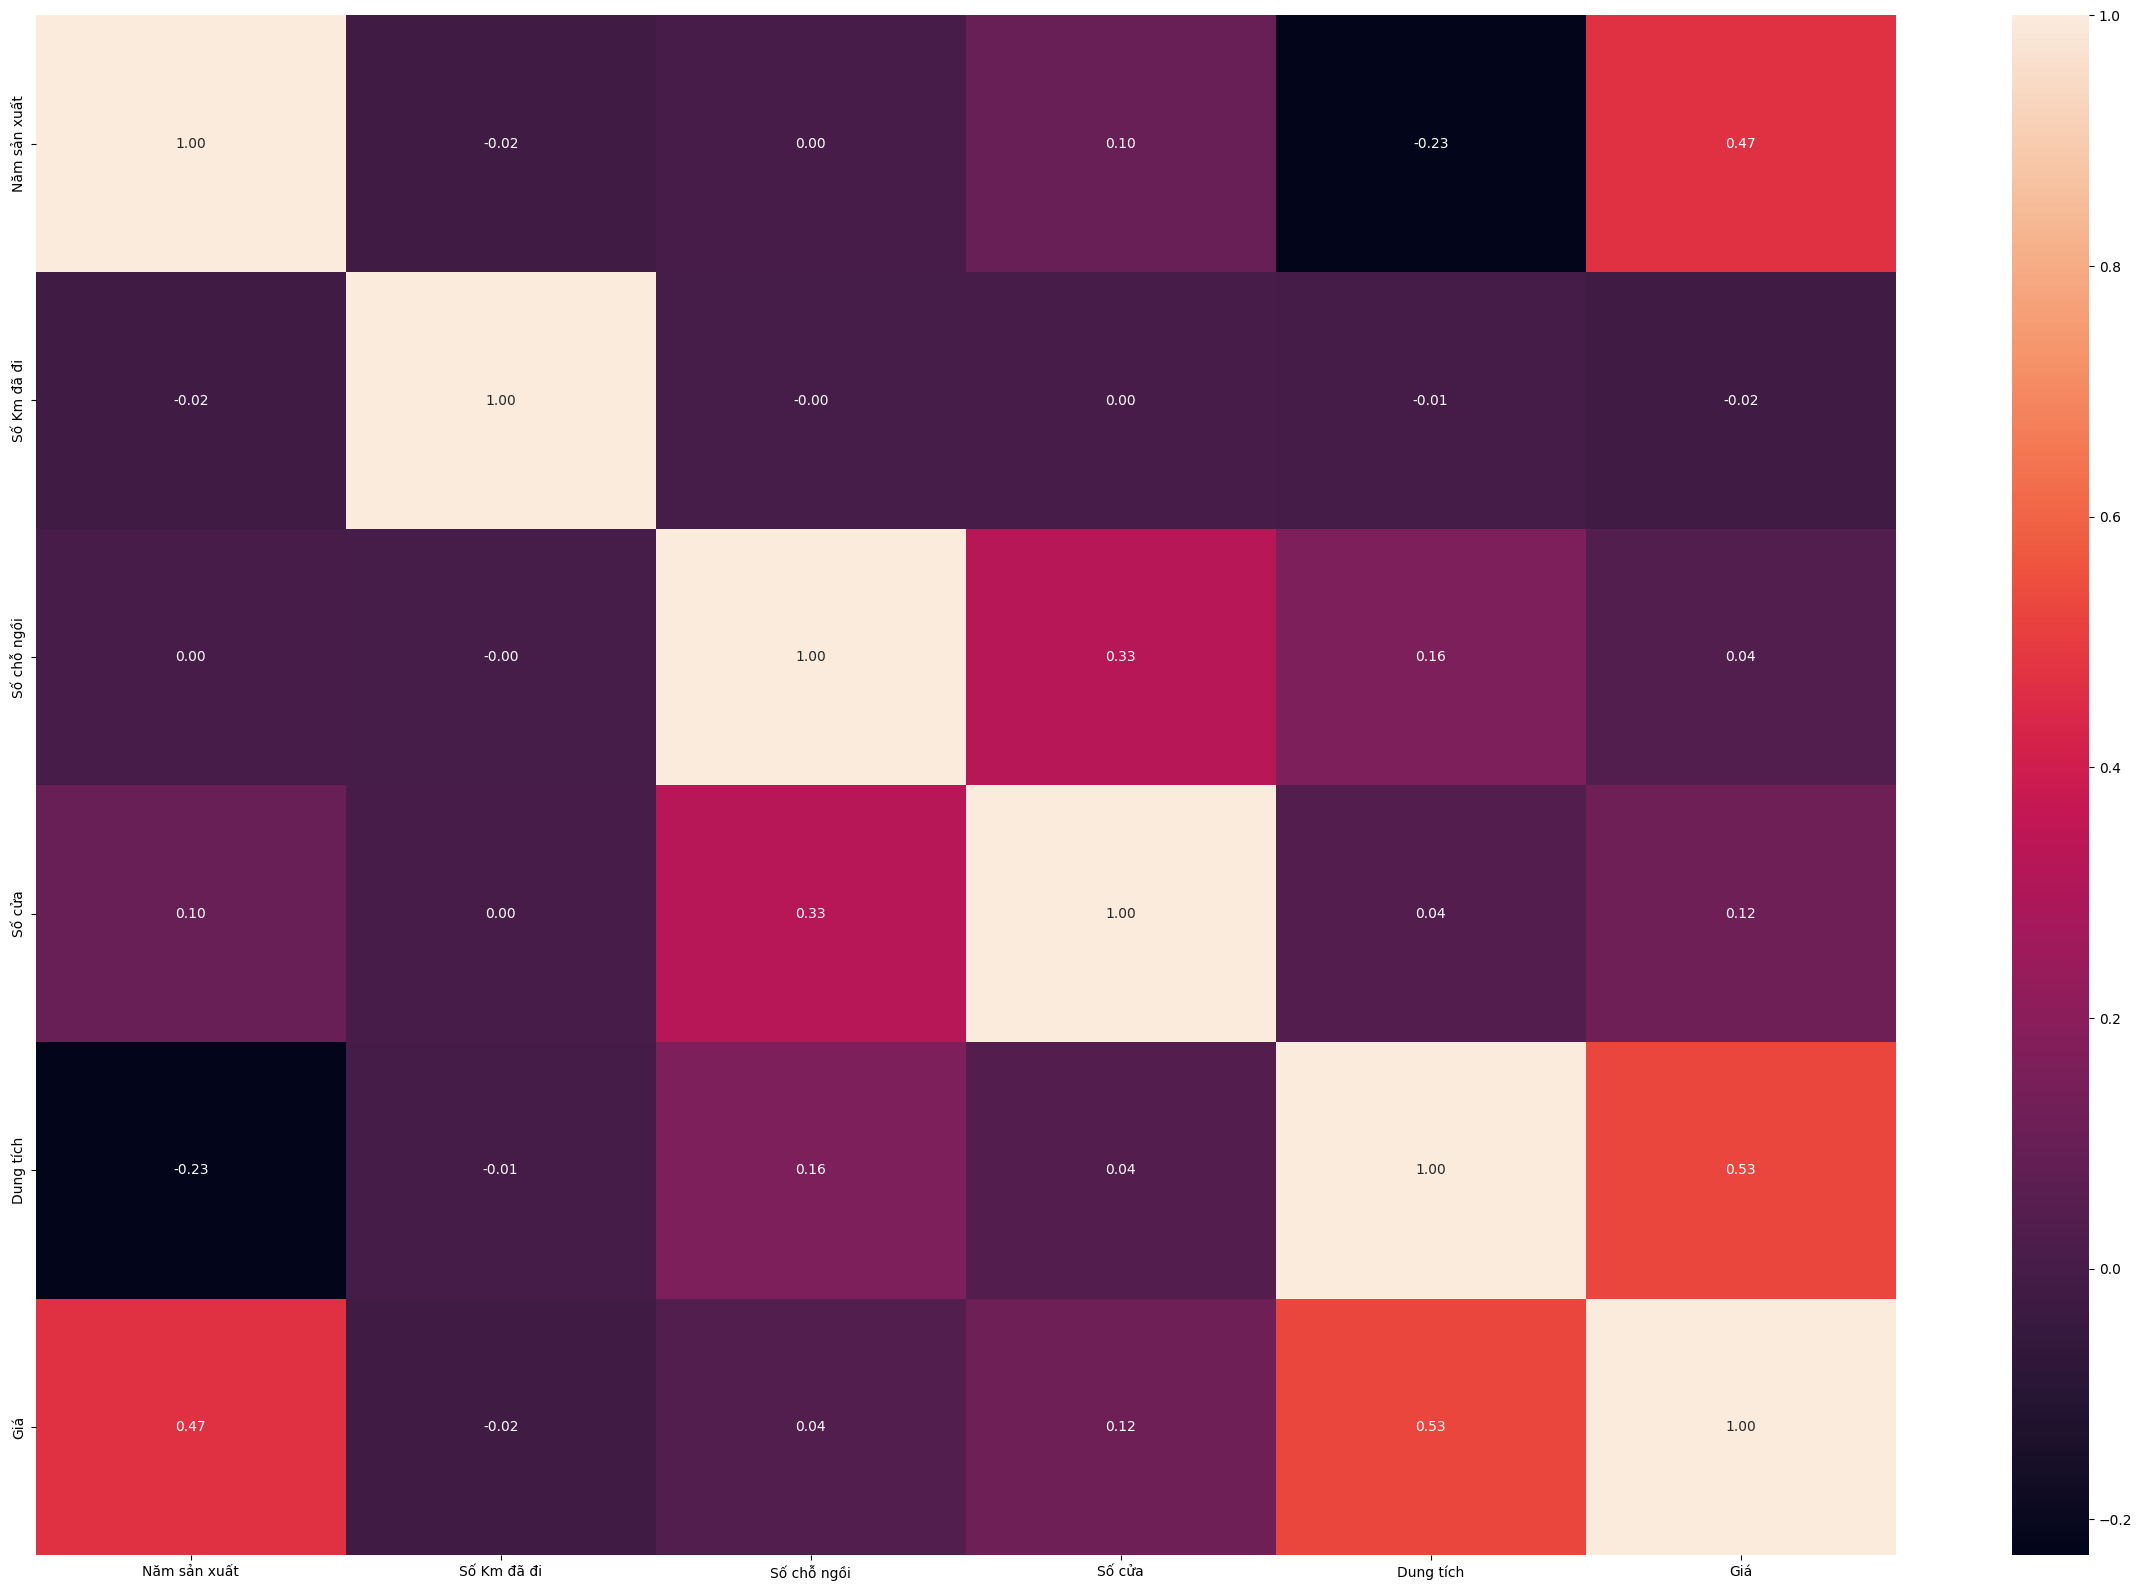

In [50]:
plt.figure(figsize=(30, 20))

# Create the heatmap of the correlation matrix
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f')

# Display the plot
plt.show()

## Phân tích uni_variate cho các cột số

### Độ lệch

In [51]:
numeric_df.skew()

Năm sản xuất     -1.625311
Số Km đã đi     157.006280
Số chỗ ngồi       3.316977
Số cửa           -1.254099
Dung tích         2.031580
Giá               0.558711
dtype: float64

### Độ nhọn

In [52]:
numeric_df.kurt()

Năm sản xuất        3.491904
Số Km đã đi     24928.536966
Số chỗ ngồi        26.321610
Số cửa              2.826696
Dung tích           7.497405
Giá                 0.974619
dtype: float64

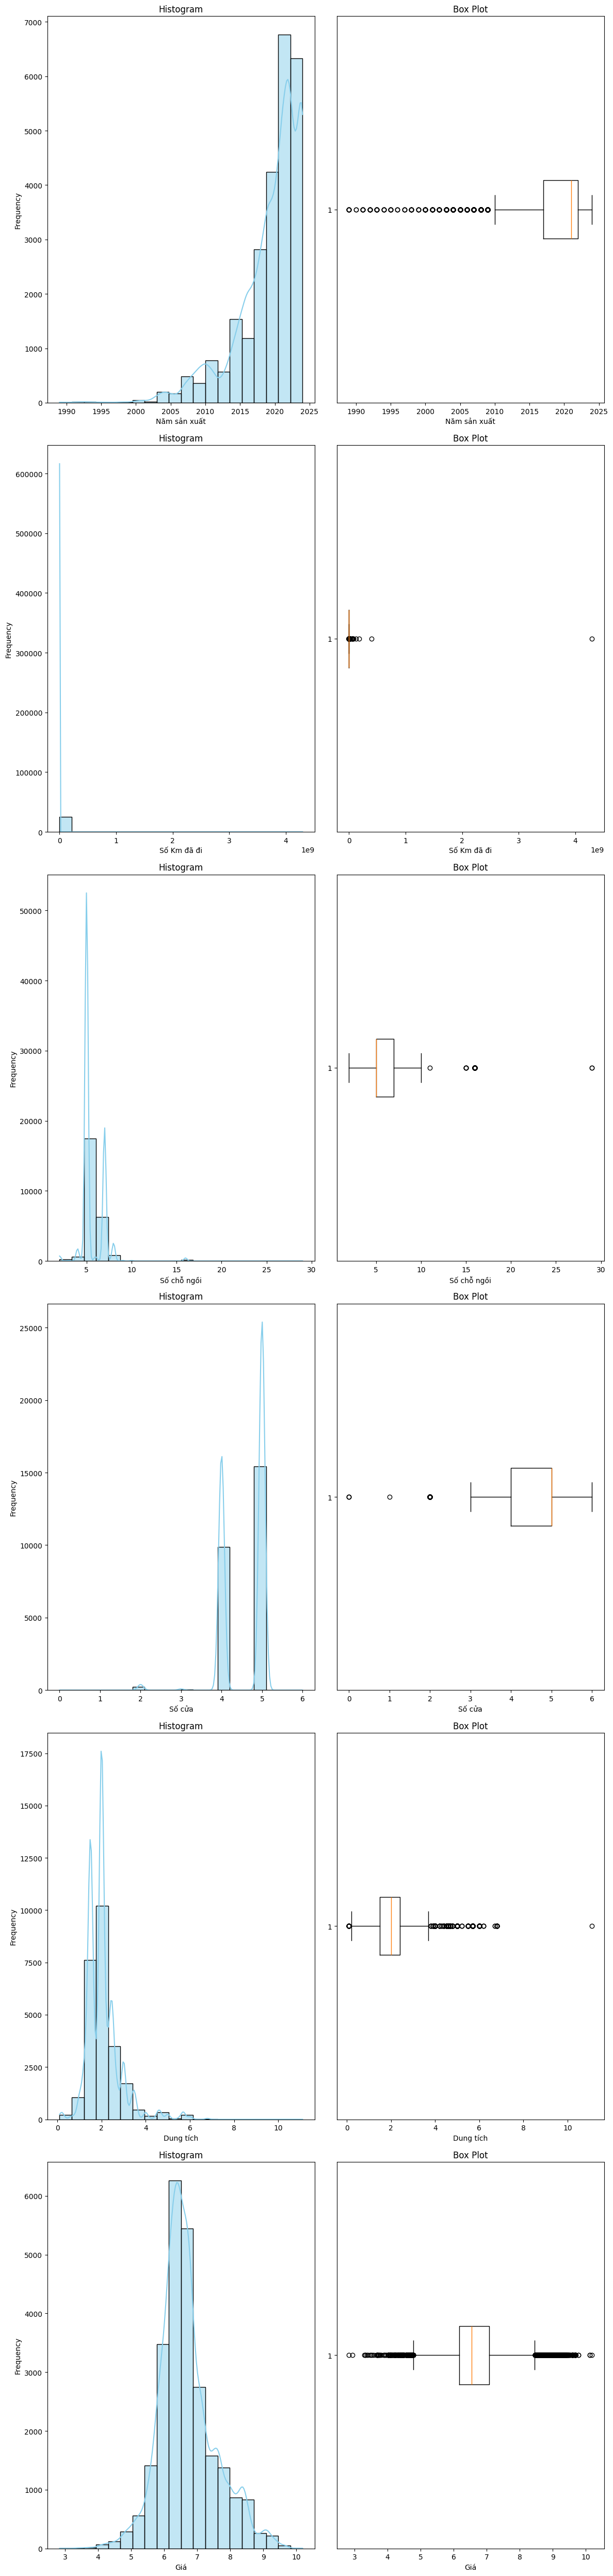

In [53]:
# Select numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Create subplots for the histograms
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(12, 50))
fig.subplots_adjust(hspace=0.5)

# Generate histograms and box plots
for i, column in enumerate(numeric_columns):
    # Histogram
    sns.histplot(data=df, x=column, bins=20, color='skyblue',kde=True, ax=axes[i,0])
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_title('Histogram')

    # Box plot
    axes[i, 1].boxplot(df[column], vert=False)
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_title('Box Plot')

# Show the plots
plt.tight_layout()
plt.show()

## Phân tích uni_variate cho các cột phân loại

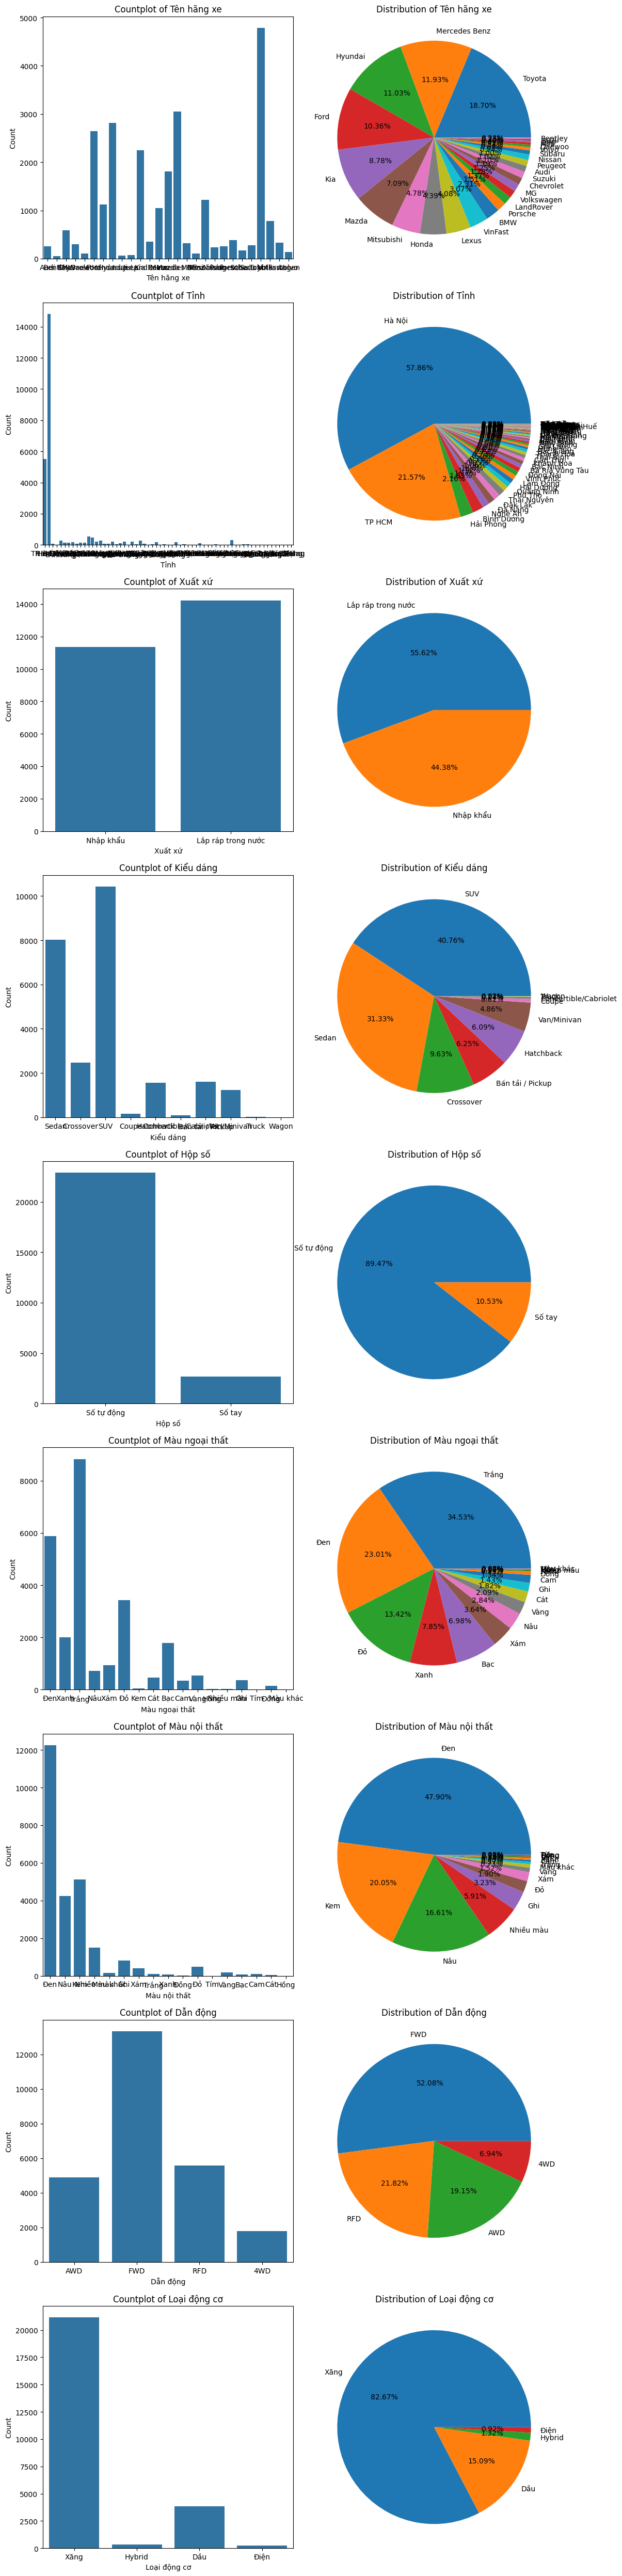

In [54]:
cat=[]
for column in df.columns:
    if df[column].dtype== object:
        cat.append(column)
# Assuming 'cat' is a list of categorical column names
fig, axes = plt.subplots(nrows=len(cat), ncols=2, figsize=(12, 50))

for i, column in enumerate(cat):
    
    # Plot the count plot (histogram) in the first column of the current row
        sns.countplot(x=column, data=df, ax=axes[i, 0])
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Count')
        axes[i, 0].set_title('Countplot of ' + column)

    # Plot the pie chart in the second column of the current row using Pandas plot
        df[column].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[i, 1])
        axes[i, 1].set_title('Distribution of ' + column)
        axes[i, 1].set_ylabel('')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the subplots
plt.show()

### Phân tích bi-variate cho giá và cột số

/tmp/ipykernel_51799/4025047005.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')


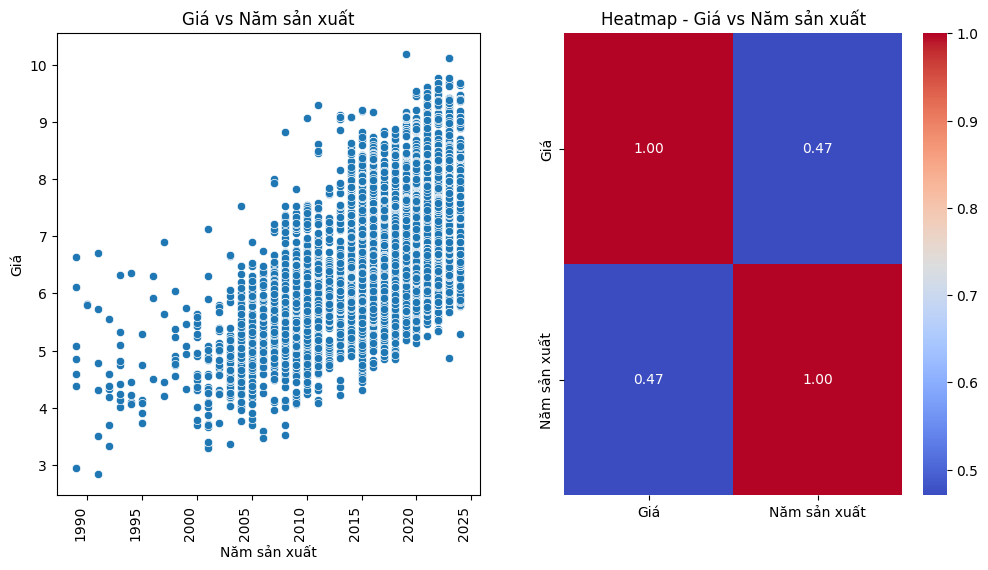

/tmp/ipykernel_51799/4025047005.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')


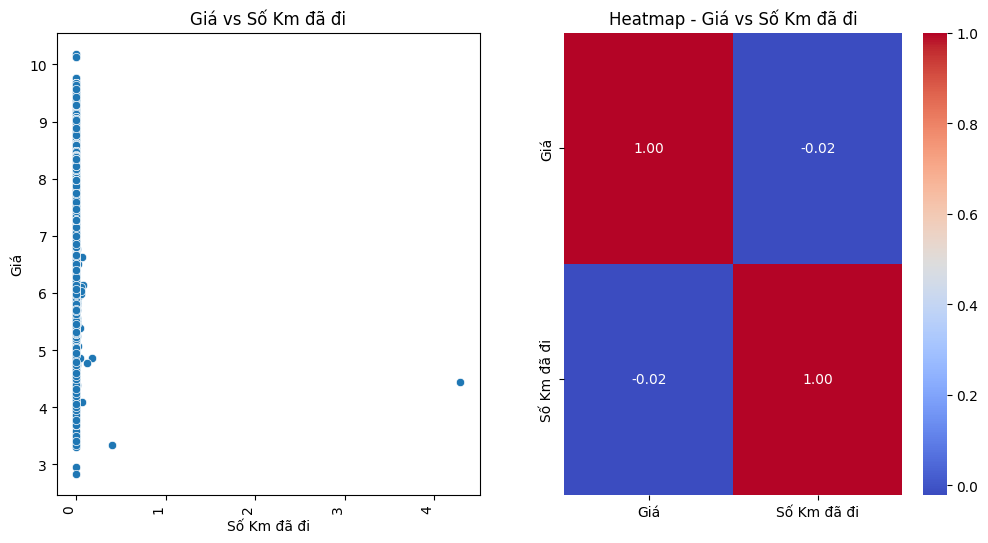

/tmp/ipykernel_51799/4025047005.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')


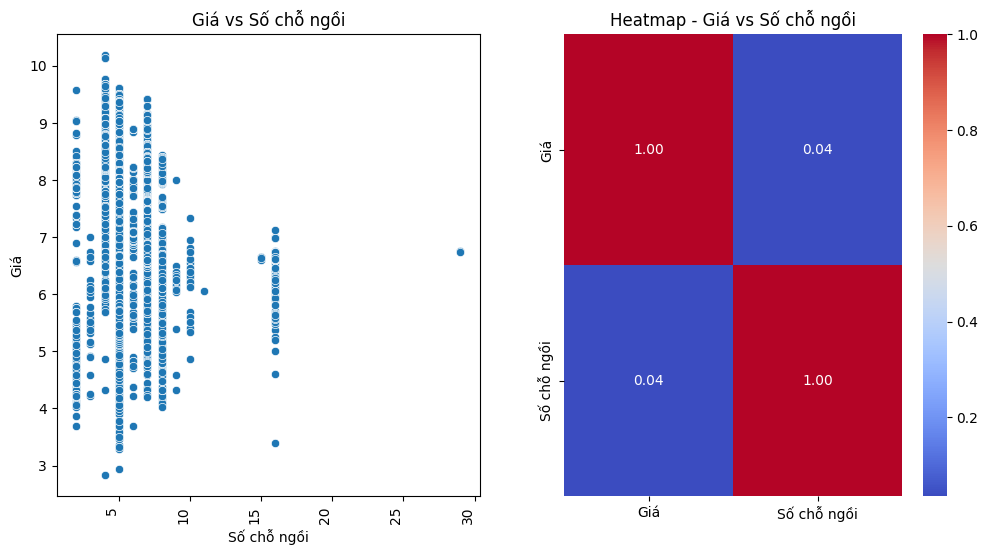

/tmp/ipykernel_51799/4025047005.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')


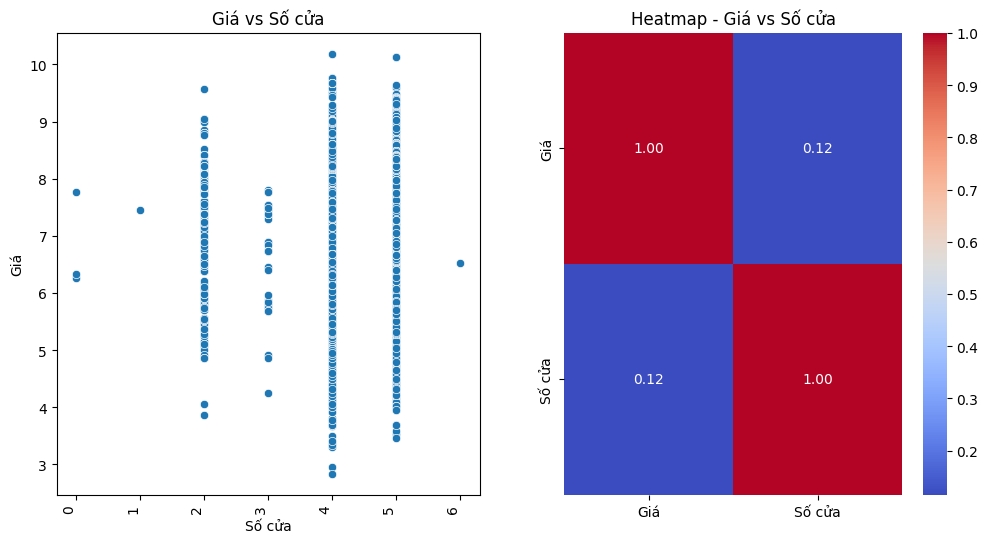

/tmp/ipykernel_51799/4025047005.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')


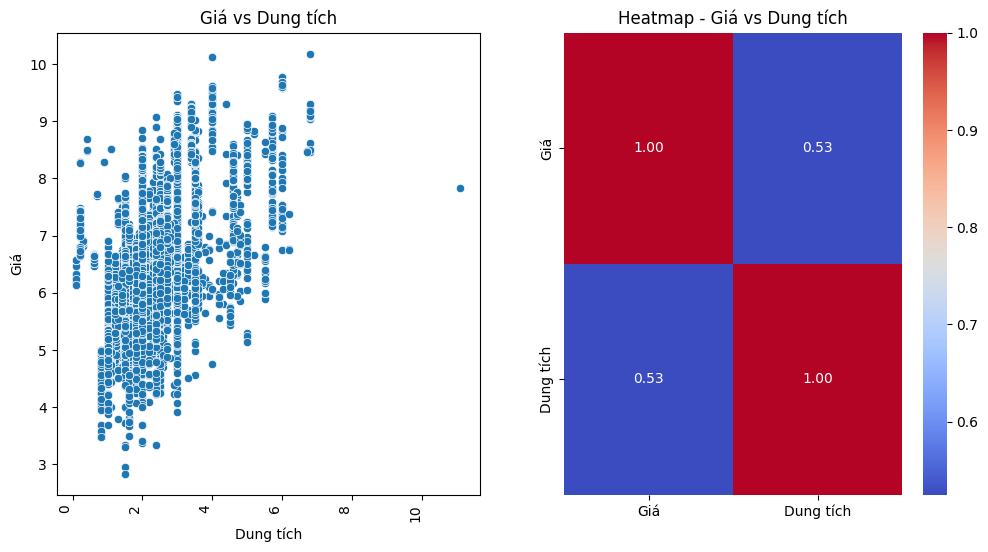

/tmp/ipykernel_51799/4025047005.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')


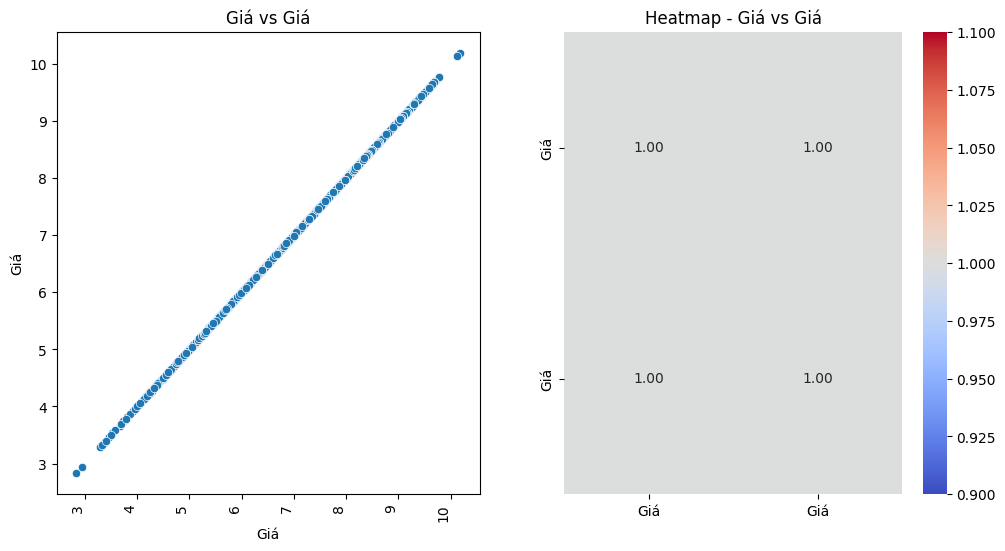

In [55]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Scatter plot using seaborn
    sns.scatterplot(x=df[column], y=df['Giá'], ax=axes[0])
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Giá')
    axes[0].set_title('Giá vs ' + column)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

    # Heatmap using seaborn
    sns.heatmap(df[['Giá', column]].corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])

    # Set plot title
    plt.title("Heatmap - Giá vs " + column)

    # Display the plot
    plt.show()



In [56]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    correlation, p_value = pearsonr(df['Giá'], df[column])
    print("Correlation with 'Giá' for column '{}' : {:.4f}".format(column, correlation))
    print("p-value for column '{}' : {:.4f}".format(column, p_value))
    print("------------------------------------------------------")

Correlation with 'Giá' for column 'Năm sản xuất' : 0.4705
p-value for column 'Năm sản xuất' : 0.0000
------------------------------------------------------
Correlation with 'Giá' for column 'Số Km đã đi' : -0.0217
p-value for column 'Số Km đã đi' : 0.0005
------------------------------------------------------
Correlation with 'Giá' for column 'Số chỗ ngồi' : 0.0354
p-value for column 'Số chỗ ngồi' : 0.0000
------------------------------------------------------
Correlation with 'Giá' for column 'Số cửa' : 0.1153
p-value for column 'Số cửa' : 0.0000
------------------------------------------------------
Correlation with 'Giá' for column 'Dung tích' : 0.5251
p-value for column 'Dung tích' : 0.0000
------------------------------------------------------
Correlation with 'Giá' for column 'Giá' : 1.0000
p-value for column 'Giá' : 0.0000
------------------------------------------------------


### Phân tích bi_variate cho cột giá và các cột phân loại

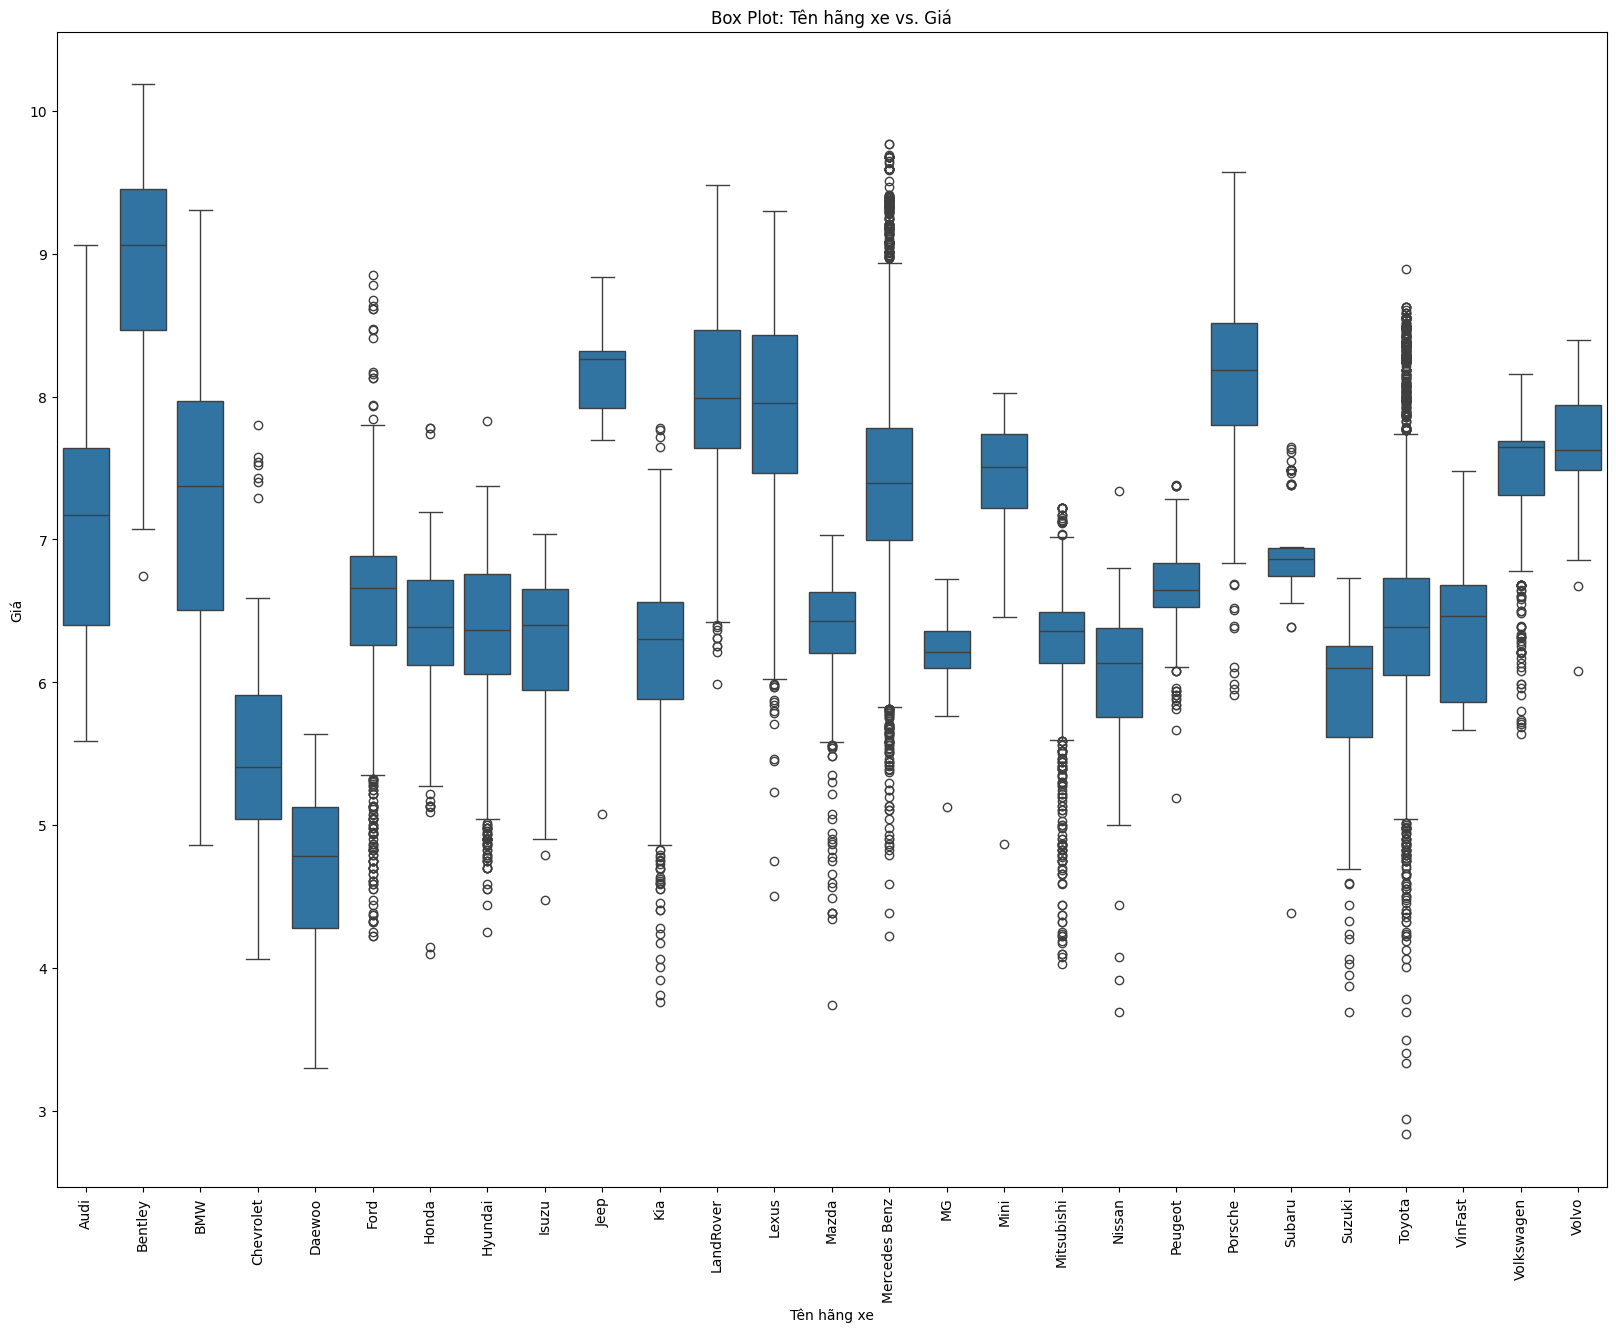

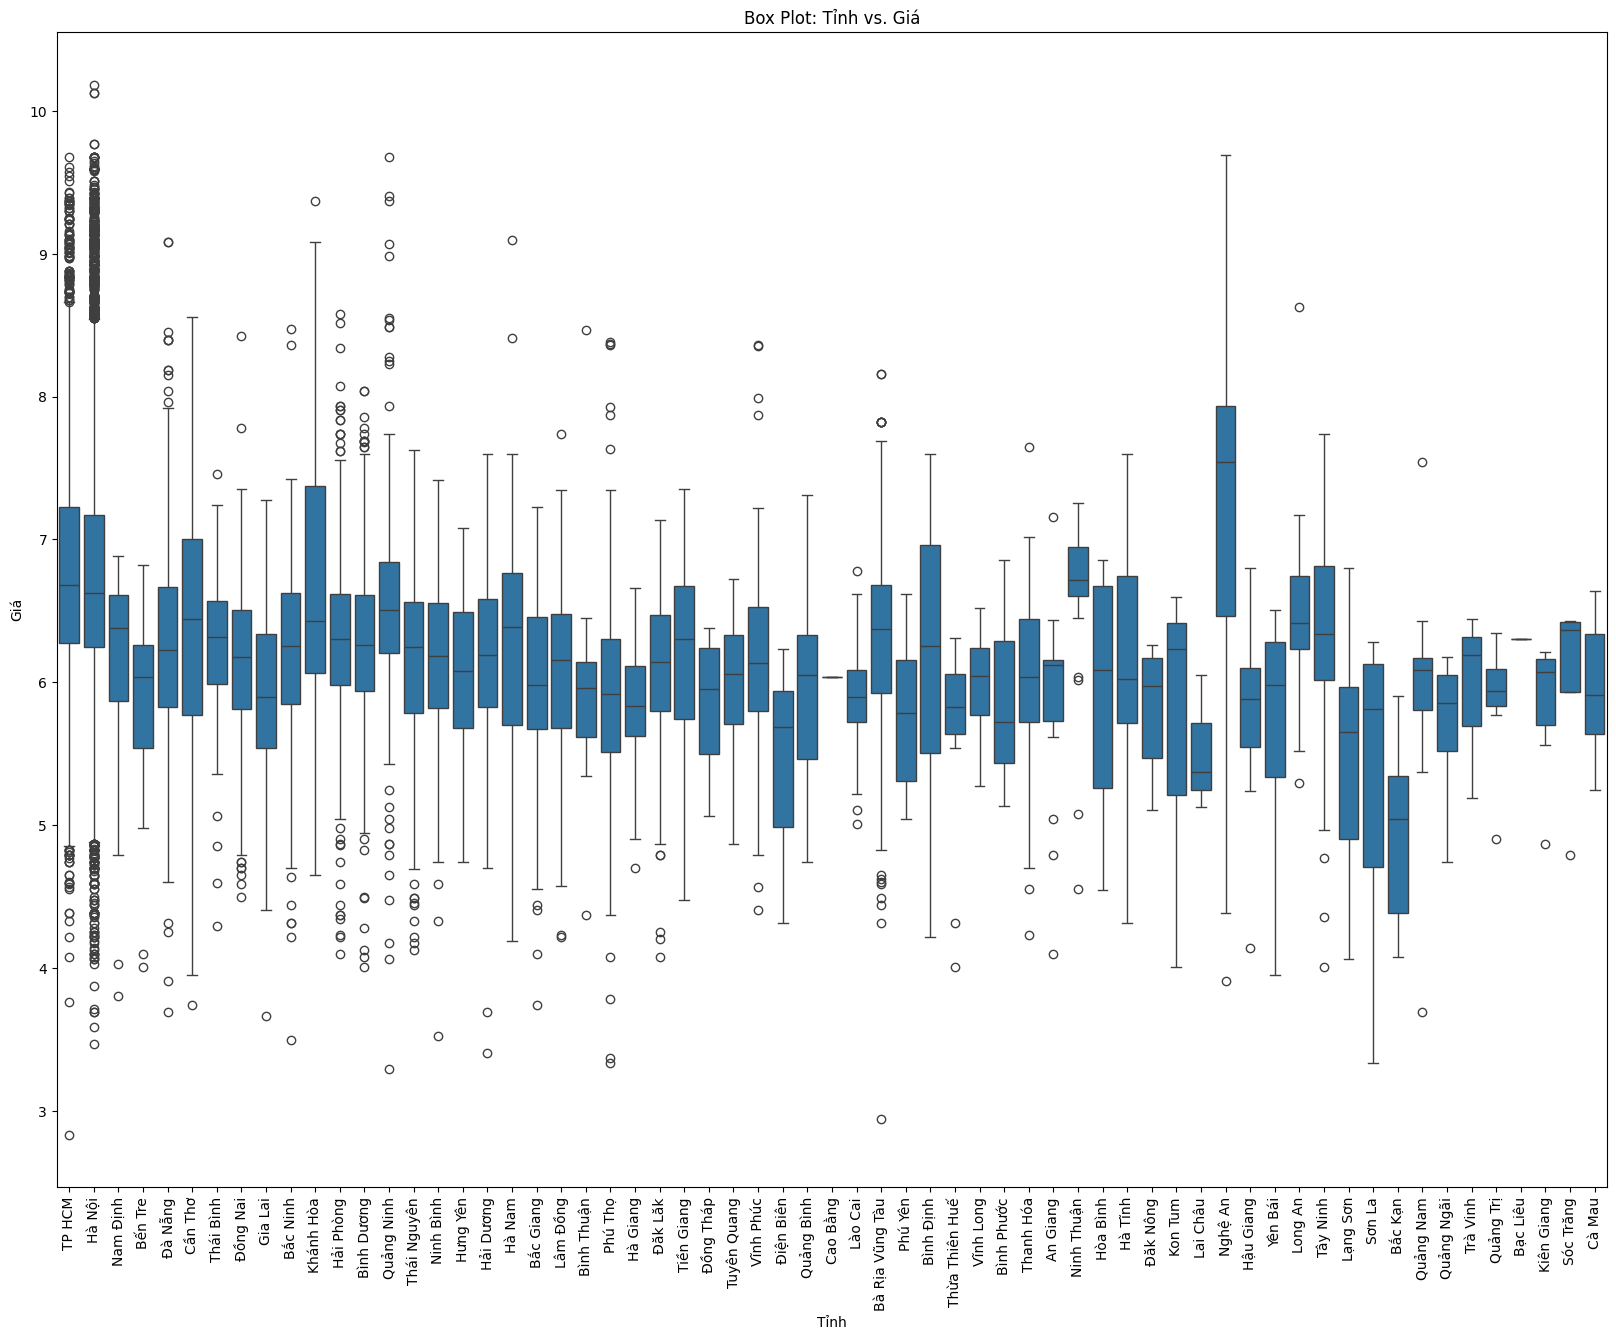

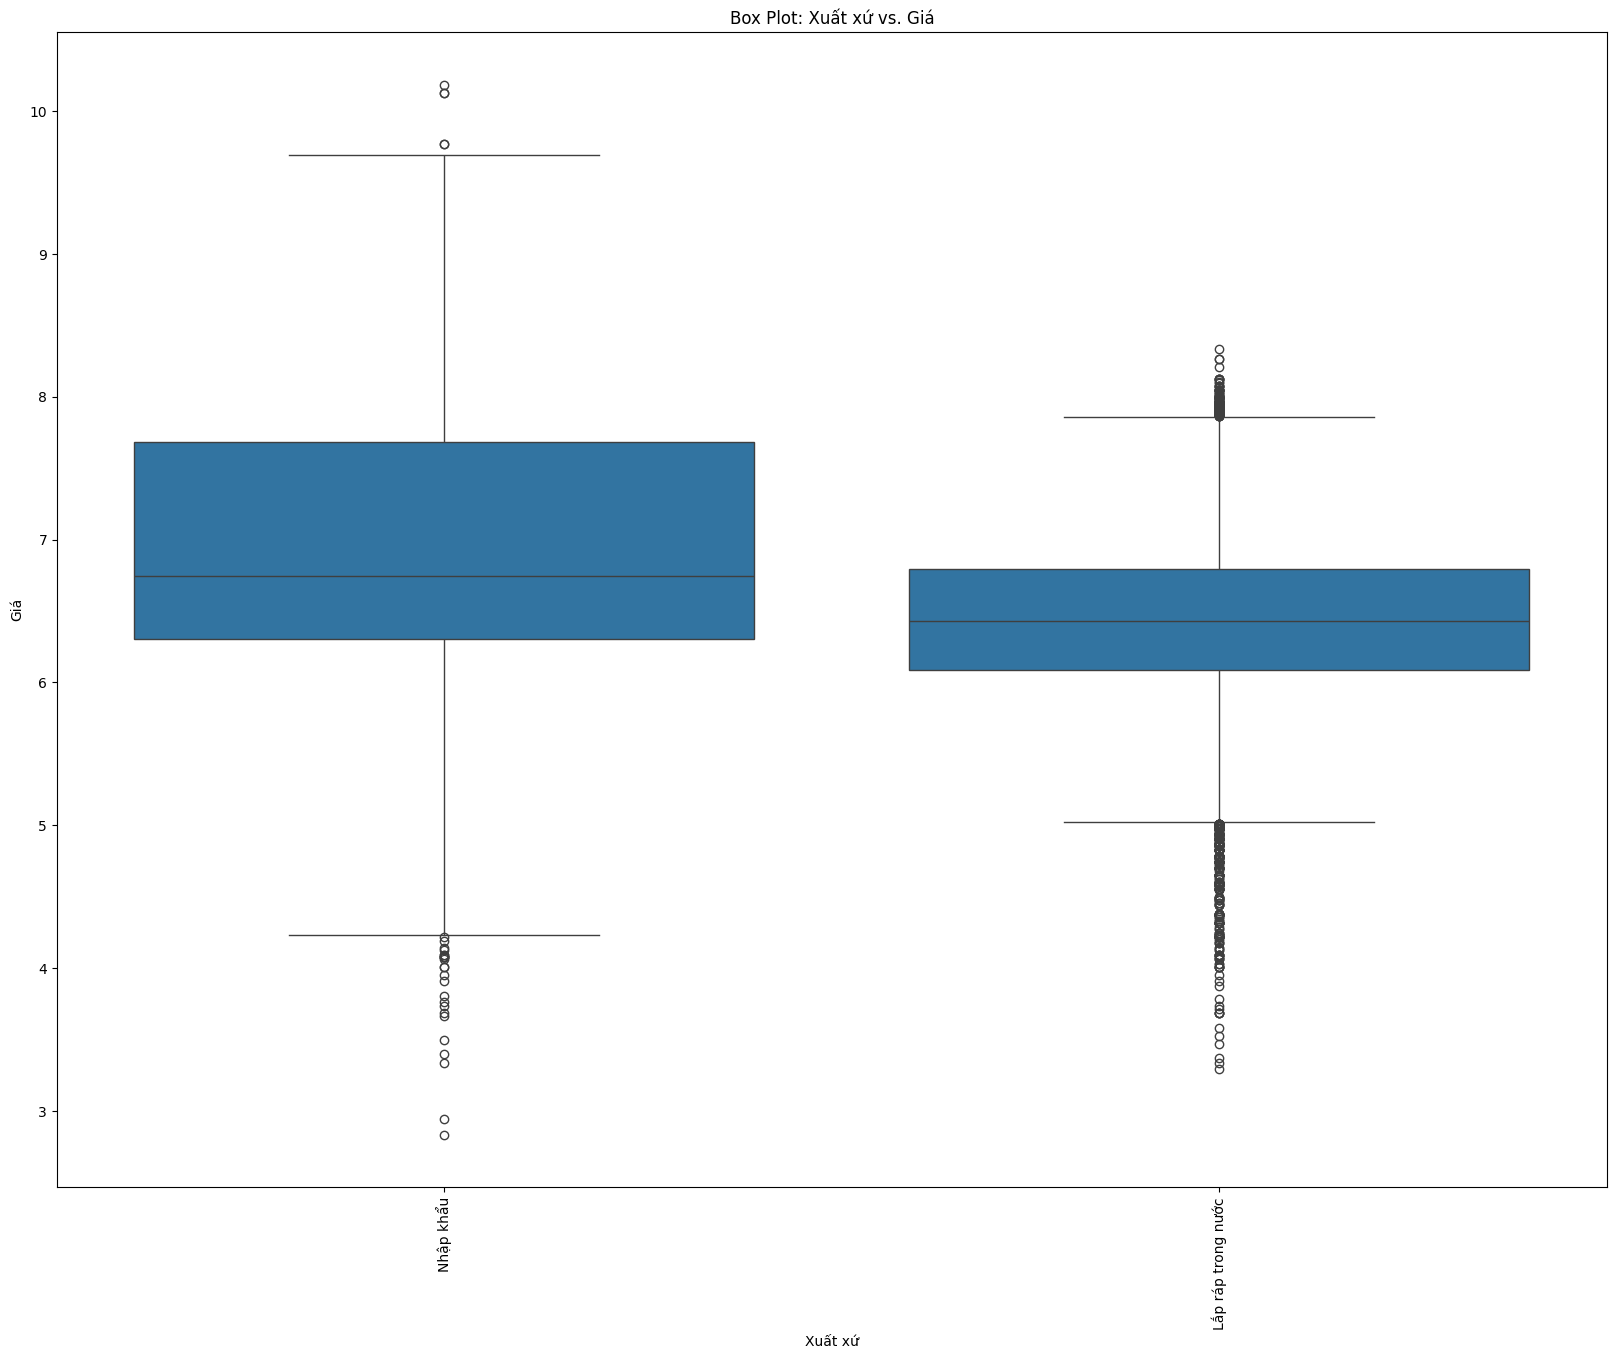

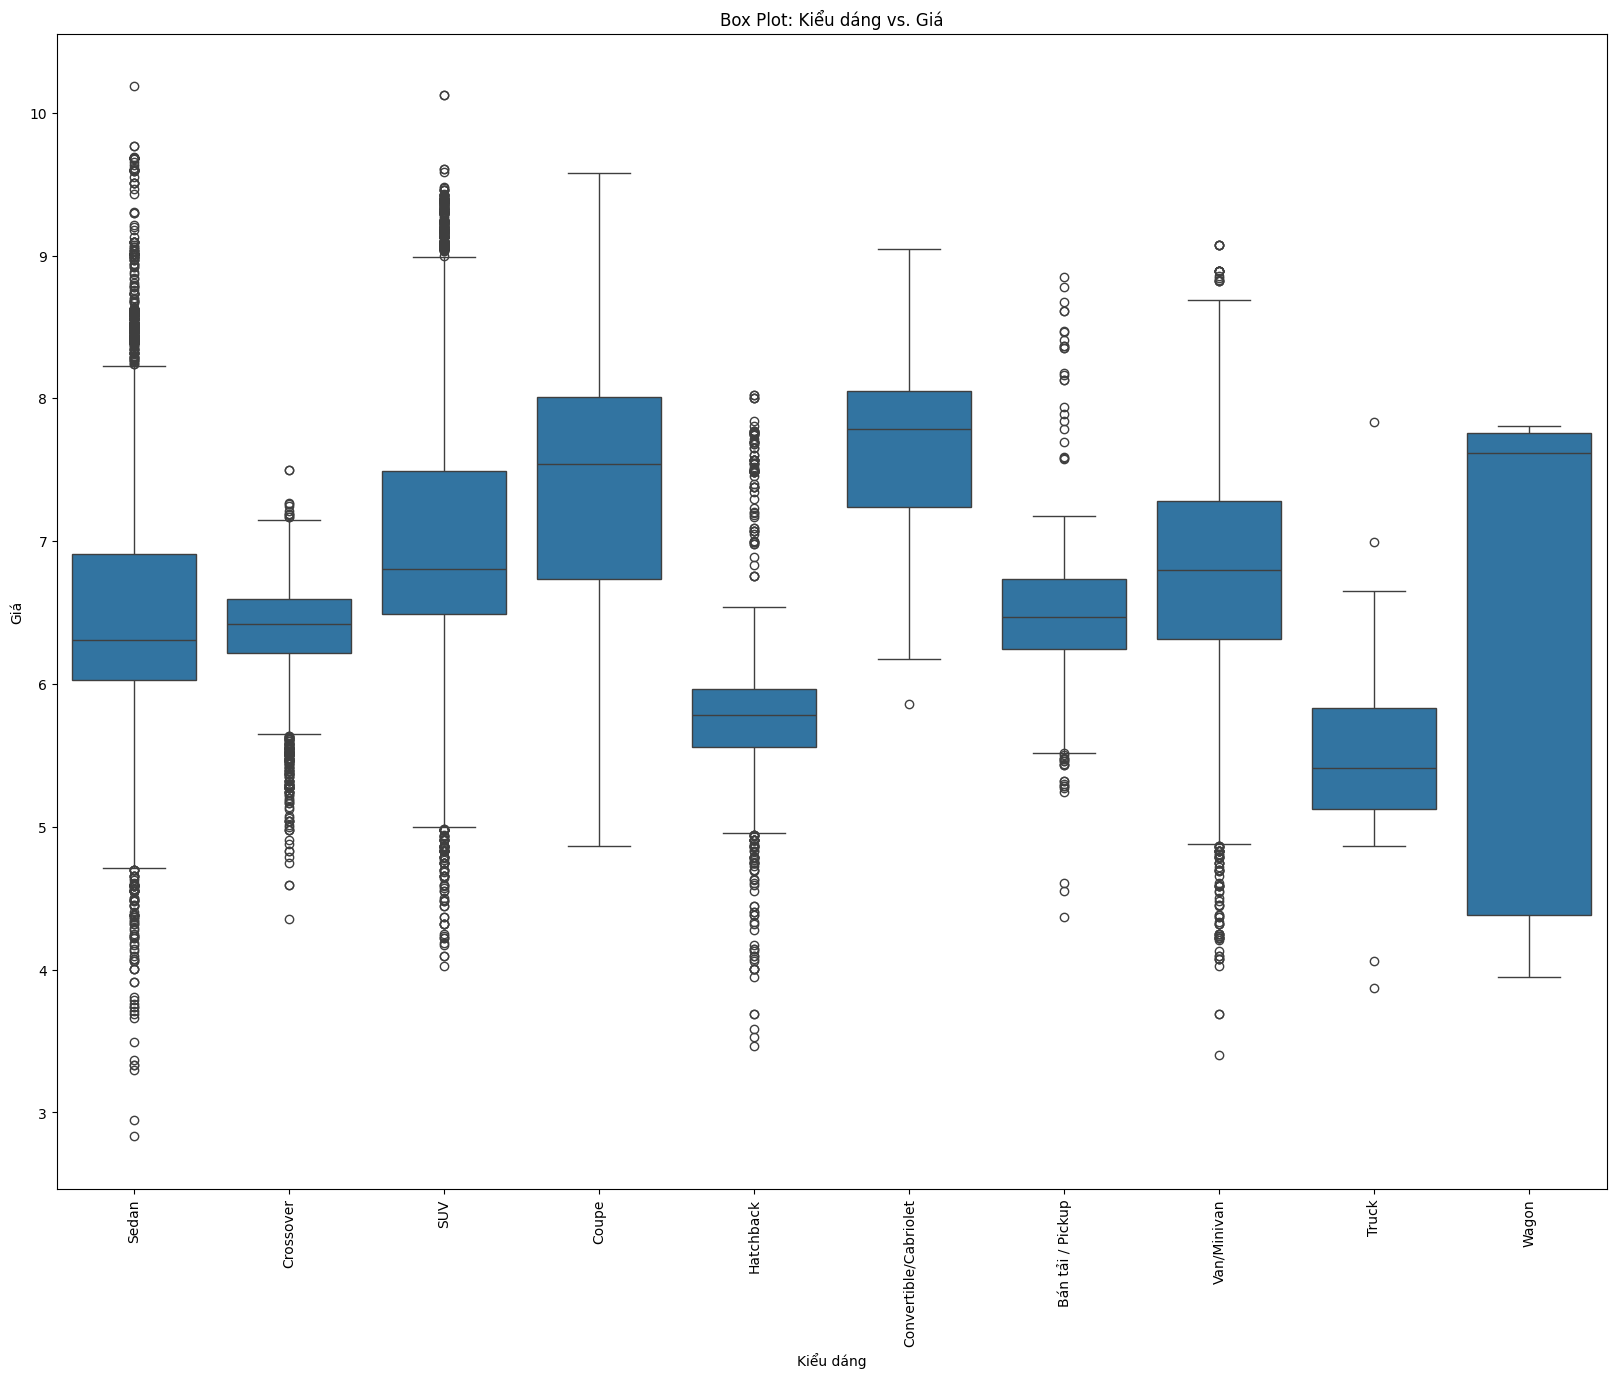

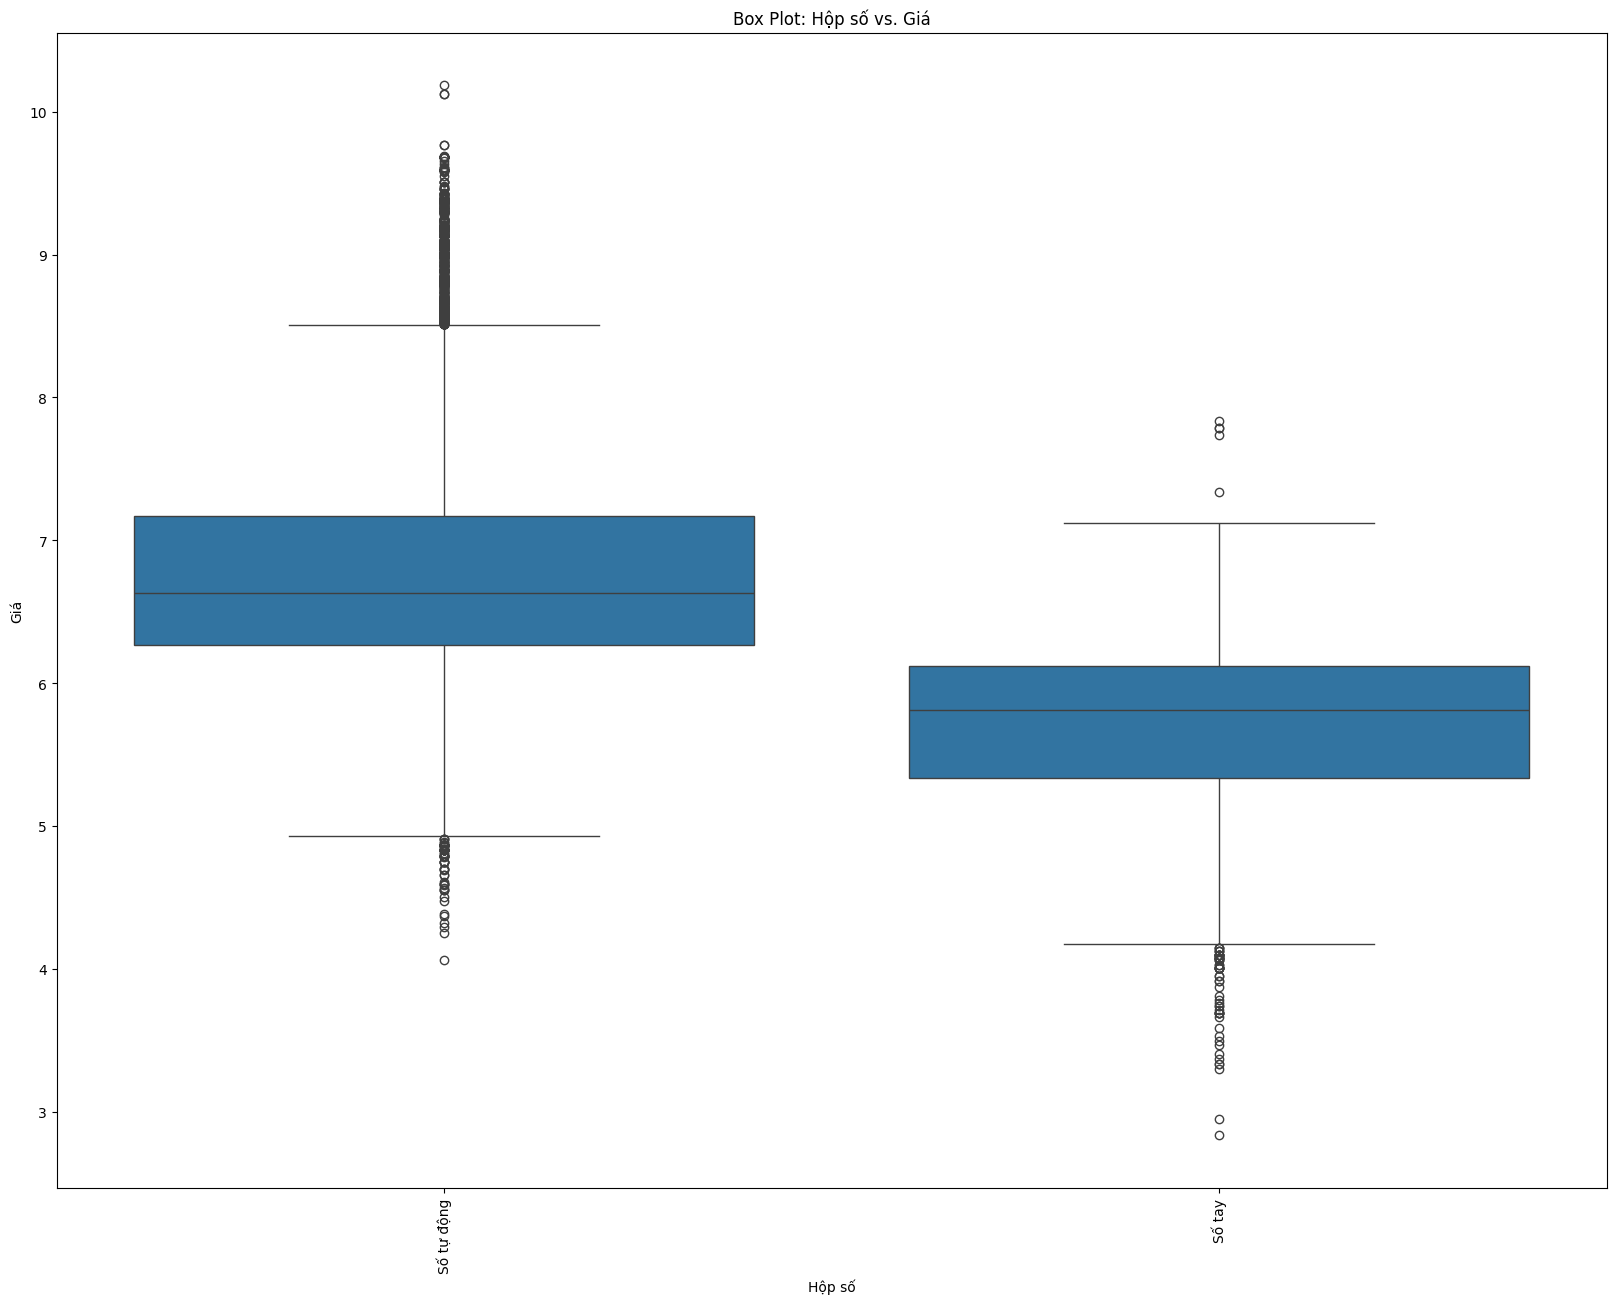

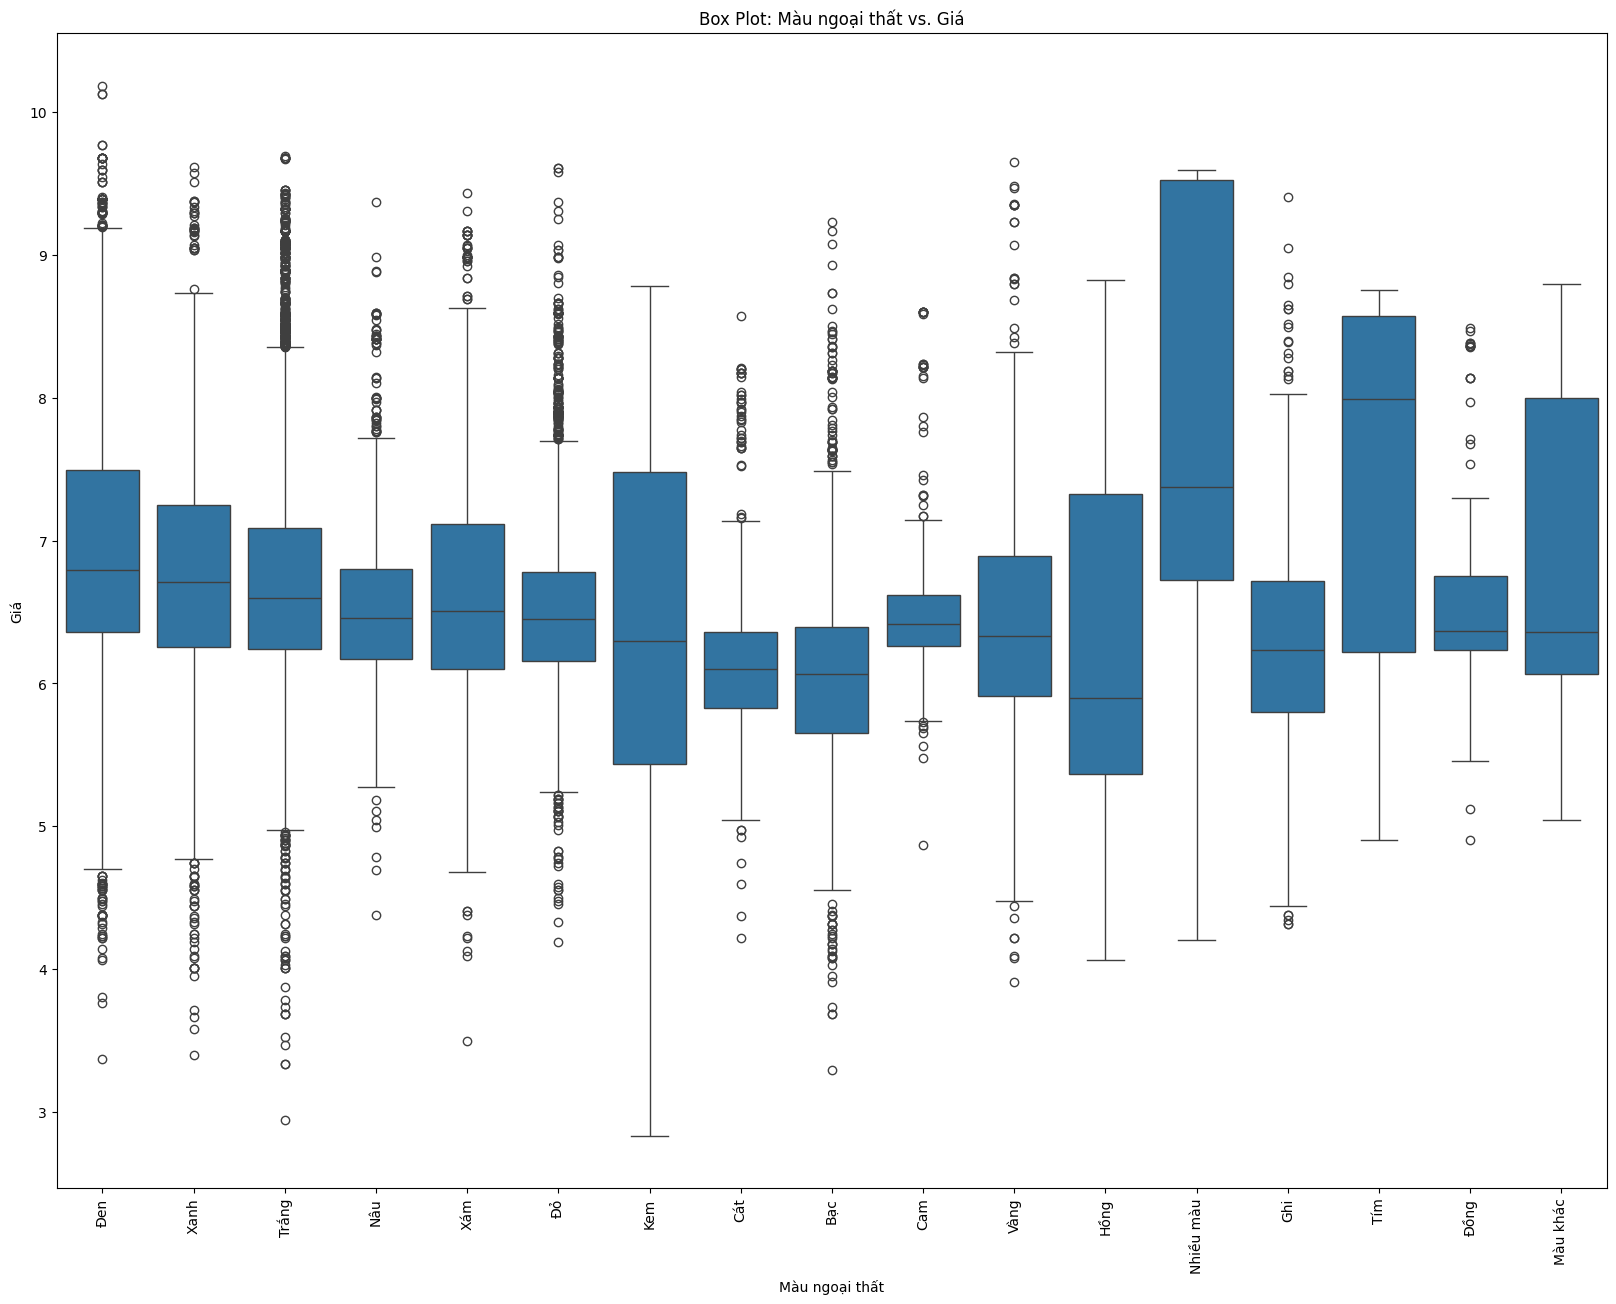

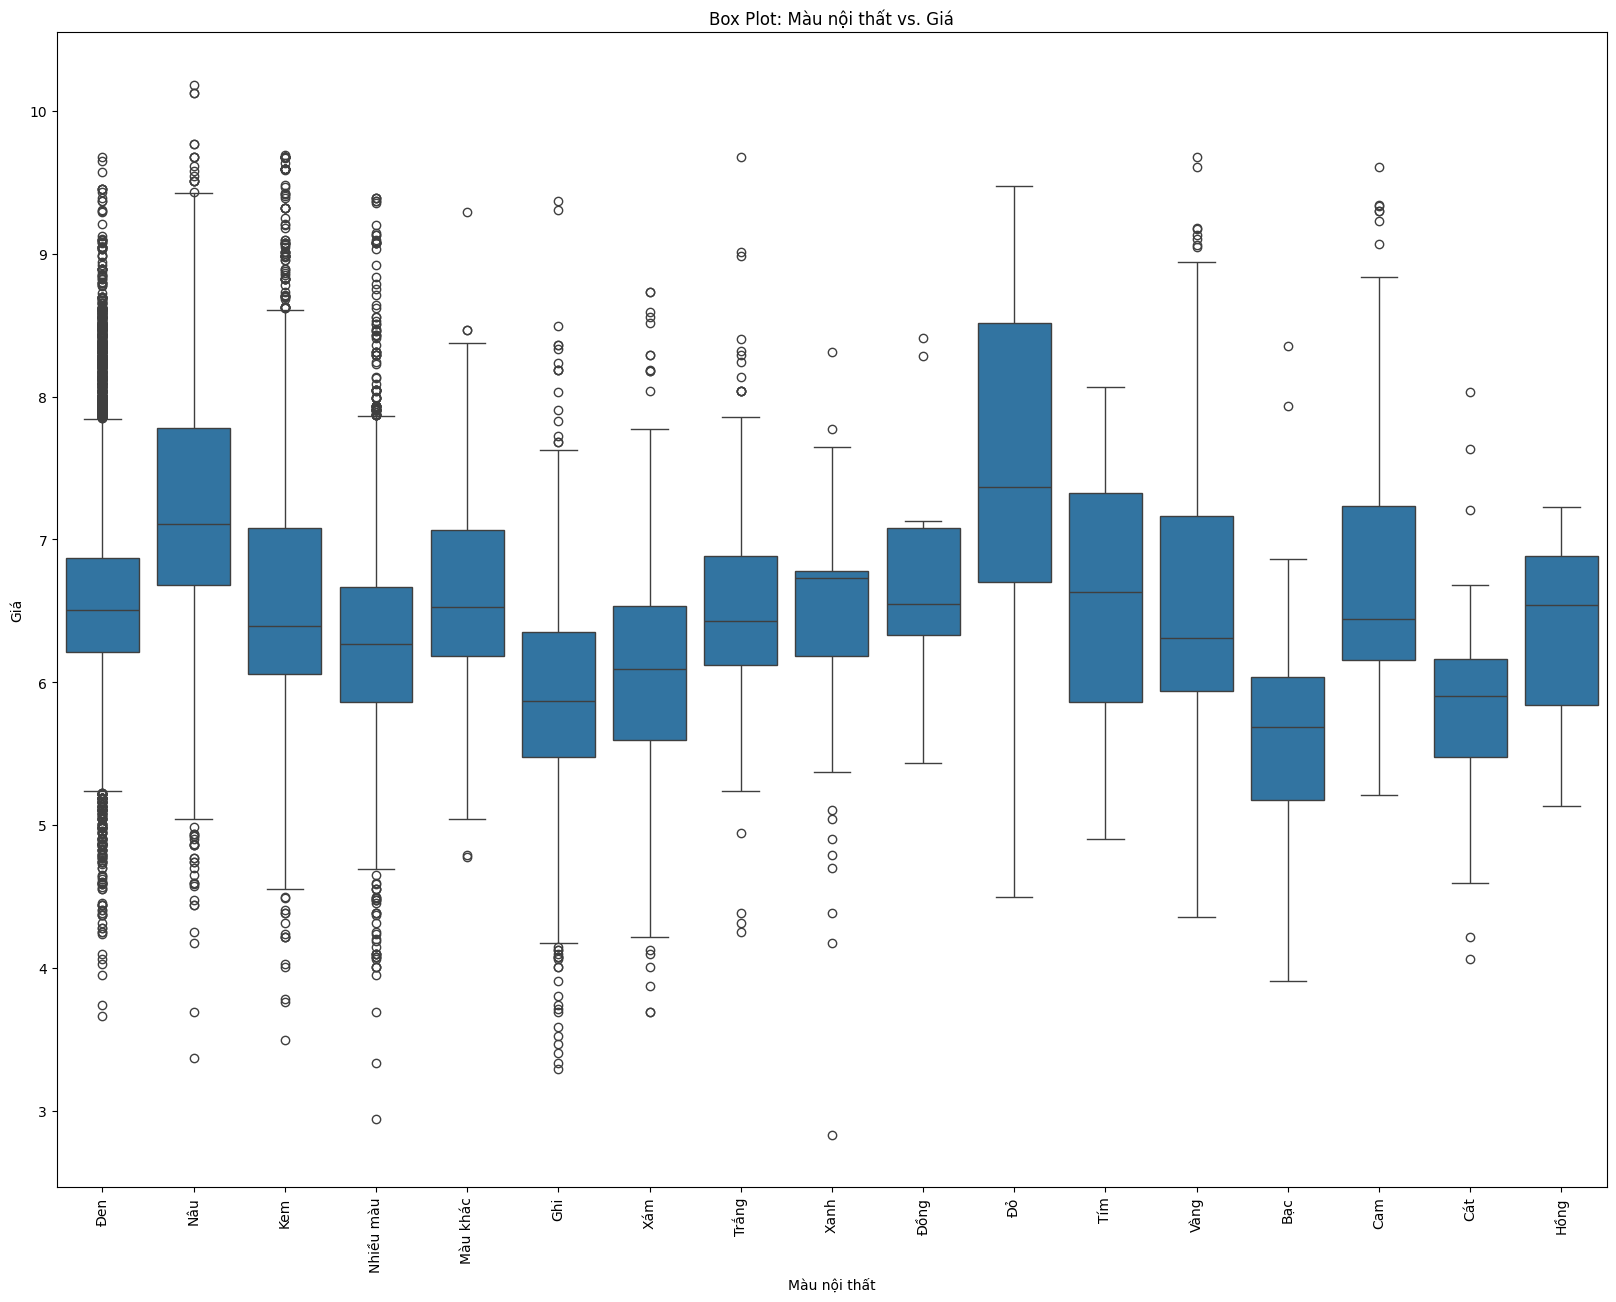

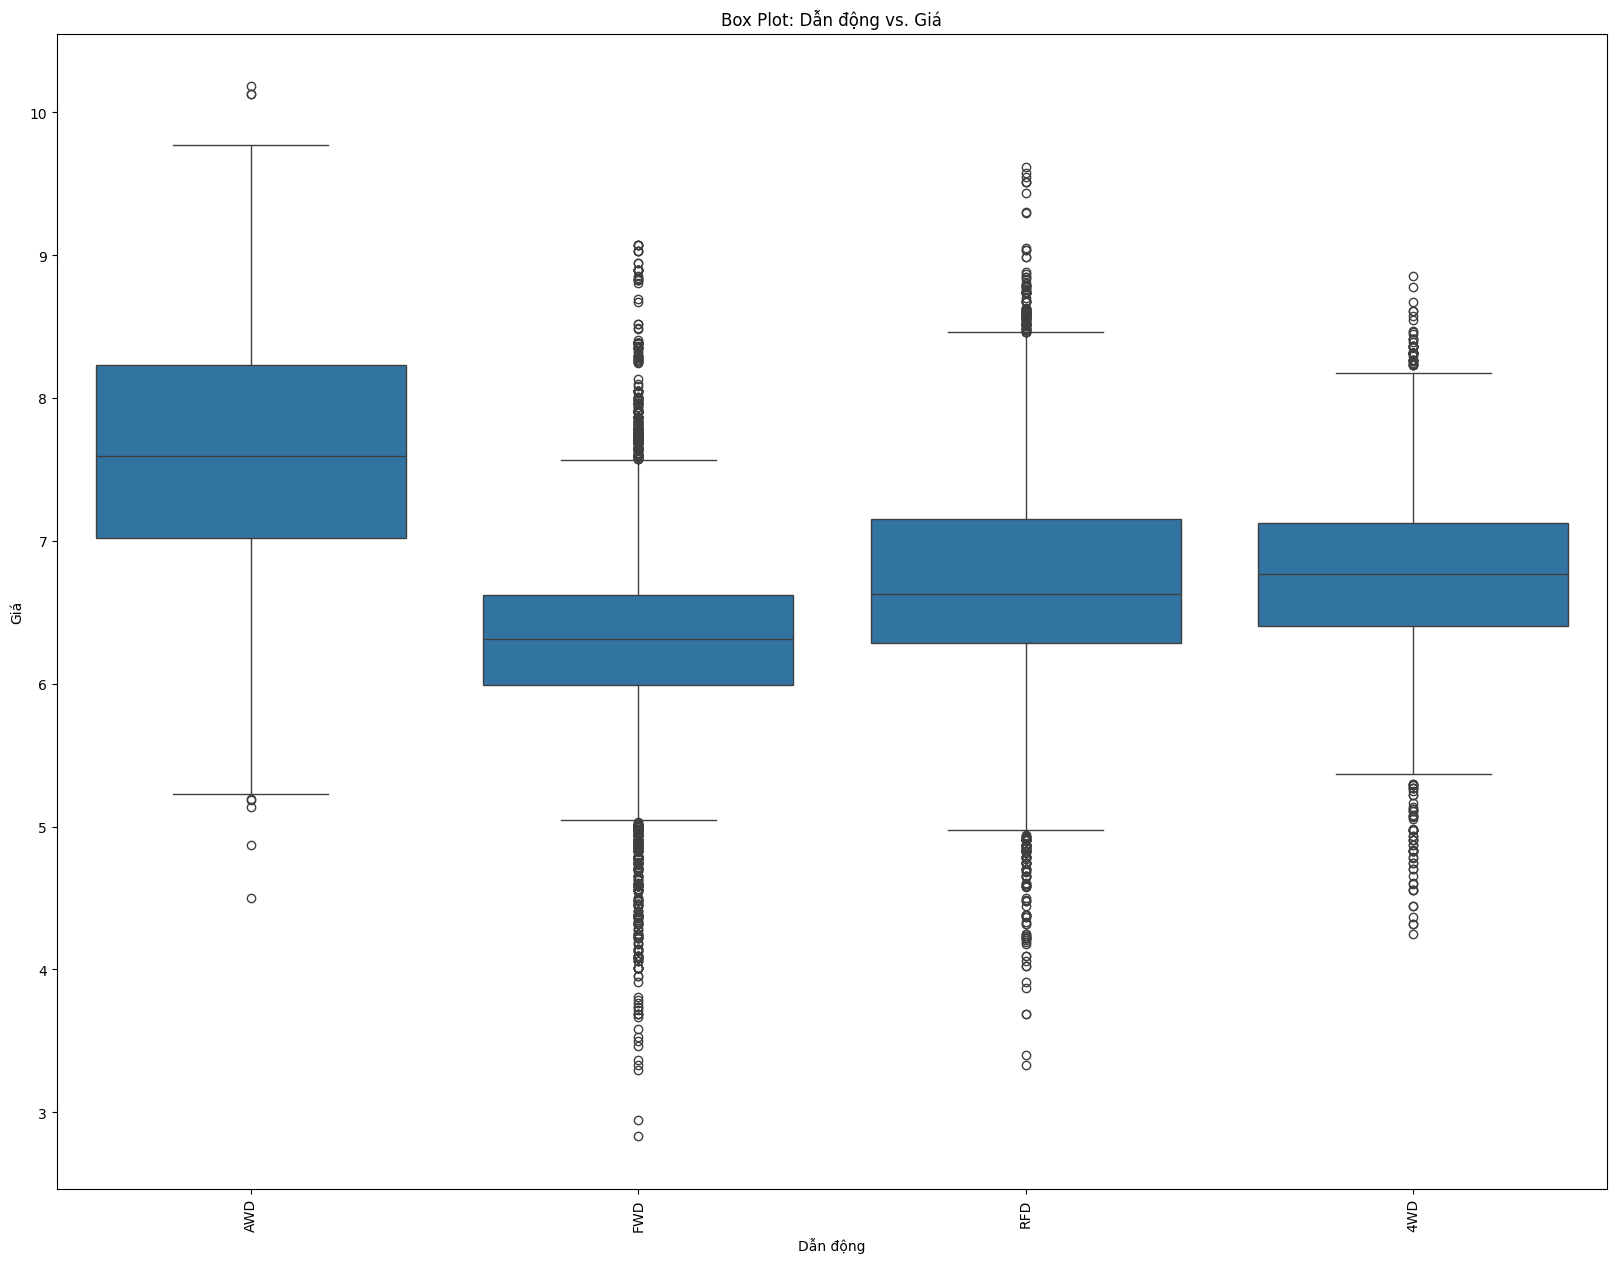

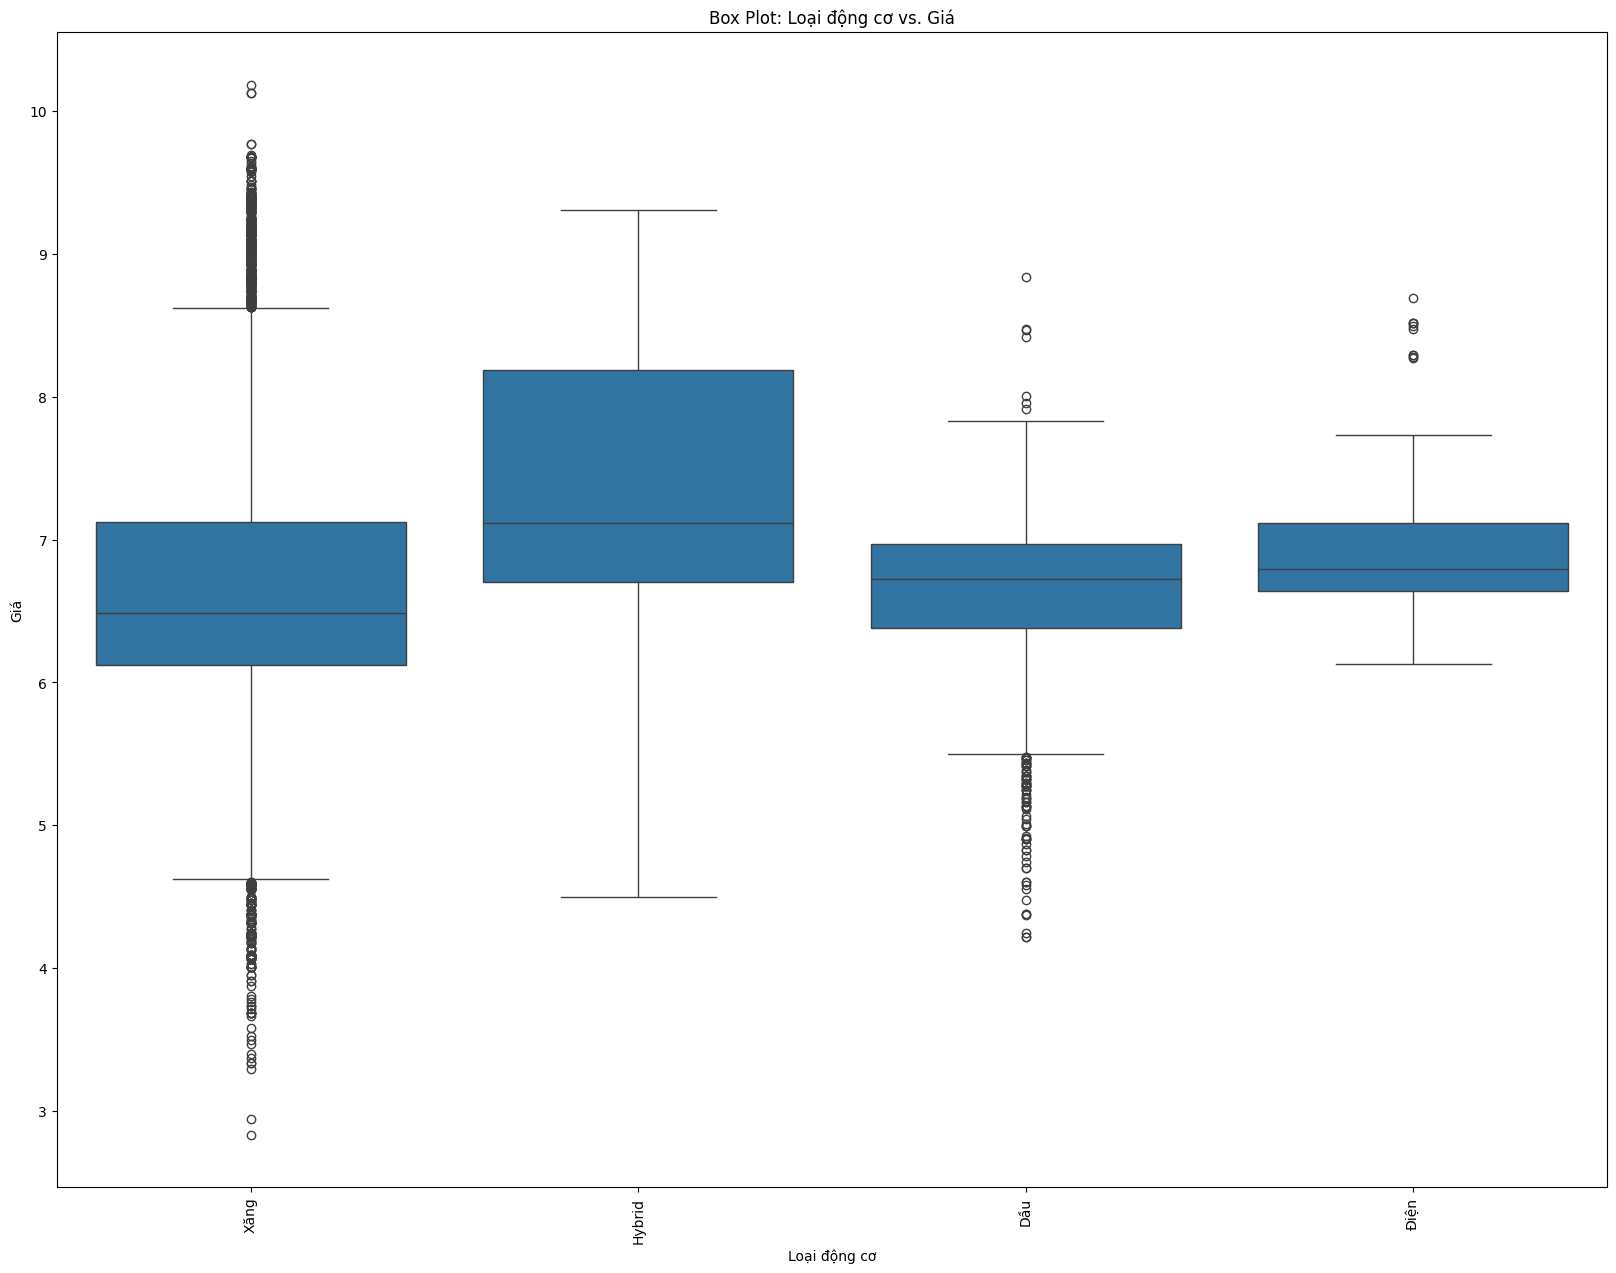

In [57]:
categorical_column=[]
for column in df.columns:
    if df[column].dtype== object:
        categorical_column.append(column)
        
# Loop through each categorical column
for column in categorical_column:
    plt.figure(figsize=(20, 15))
    
    # Create a box plot
    sns.boxplot(data=df, x=column, y='Giá')
    
    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Giá')
    plt.title(f'Box Plot: {column} vs. Giá')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=90)
    
    # Display the plot
    plt.show()

In [58]:
from scipy.stats import f_oneway
import pandas as pd

# Assuming you have a DataFrame named 'df' containing the data
# and 'categorical_column' is a list of categorical columns
categorical_column=[]
for column in df.columns:
    if df[column].dtype== object:
        categorical_column.append(column)

for column in categorical_column:
    # Drop any rows with missing values
    data = df[['Giá', column]].copy()
    data.dropna(inplace=True)

    # Perform ANOVA
    groups = [data[data[column] == value]['Giá'] for value in data[column].unique()]
    f_statistic, p_value = f_oneway(*groups)

    # Create DataFrame to display results
    results = pd.DataFrame({'Group': data[column].unique(), 'F-Statistic': f_statistic, 'p-value': p_value})
    
    # Print the ANOVA table
    print(f"ANOVA Test for {column}")
    print(results.head())
    print("---------------------------")


ANOVA Test for Tên hãng xe
       Group  F-Statistic  p-value
0       Audi   823.333449      0.0
1    Bentley   823.333449      0.0
2        BMW   823.333449      0.0
3  Chevrolet   823.333449      0.0
4     Daewoo   823.333449      0.0
---------------------------
ANOVA Test for Tỉnh
      Group  F-Statistic  p-value
0    TP HCM    43.589823      0.0
1    Hà Nội    43.589823      0.0
2  Nam Định    43.589823      0.0
3   Bến Tre    43.589823      0.0
4   Đà Nẵng    43.589823      0.0
---------------------------
ANOVA Test for Xuất xứ
                Group  F-Statistic  p-value
0           Nhập khẩu  2907.128434      0.0
1  Lắp ráp trong nước  2907.128434      0.0
---------------------------
ANOVA Test for Kiểu dáng
       Group  F-Statistic  p-value
0      Sedan   597.806497      0.0
1  Crossover   597.806497      0.0
2        SUV   597.806497      0.0
3      Coupe   597.806497      0.0
4  Hatchback   597.806497      0.0
---------------------------
ANOVA Test for Hộp số
        Group  

/tmp/ipykernel_51799/3188225898.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


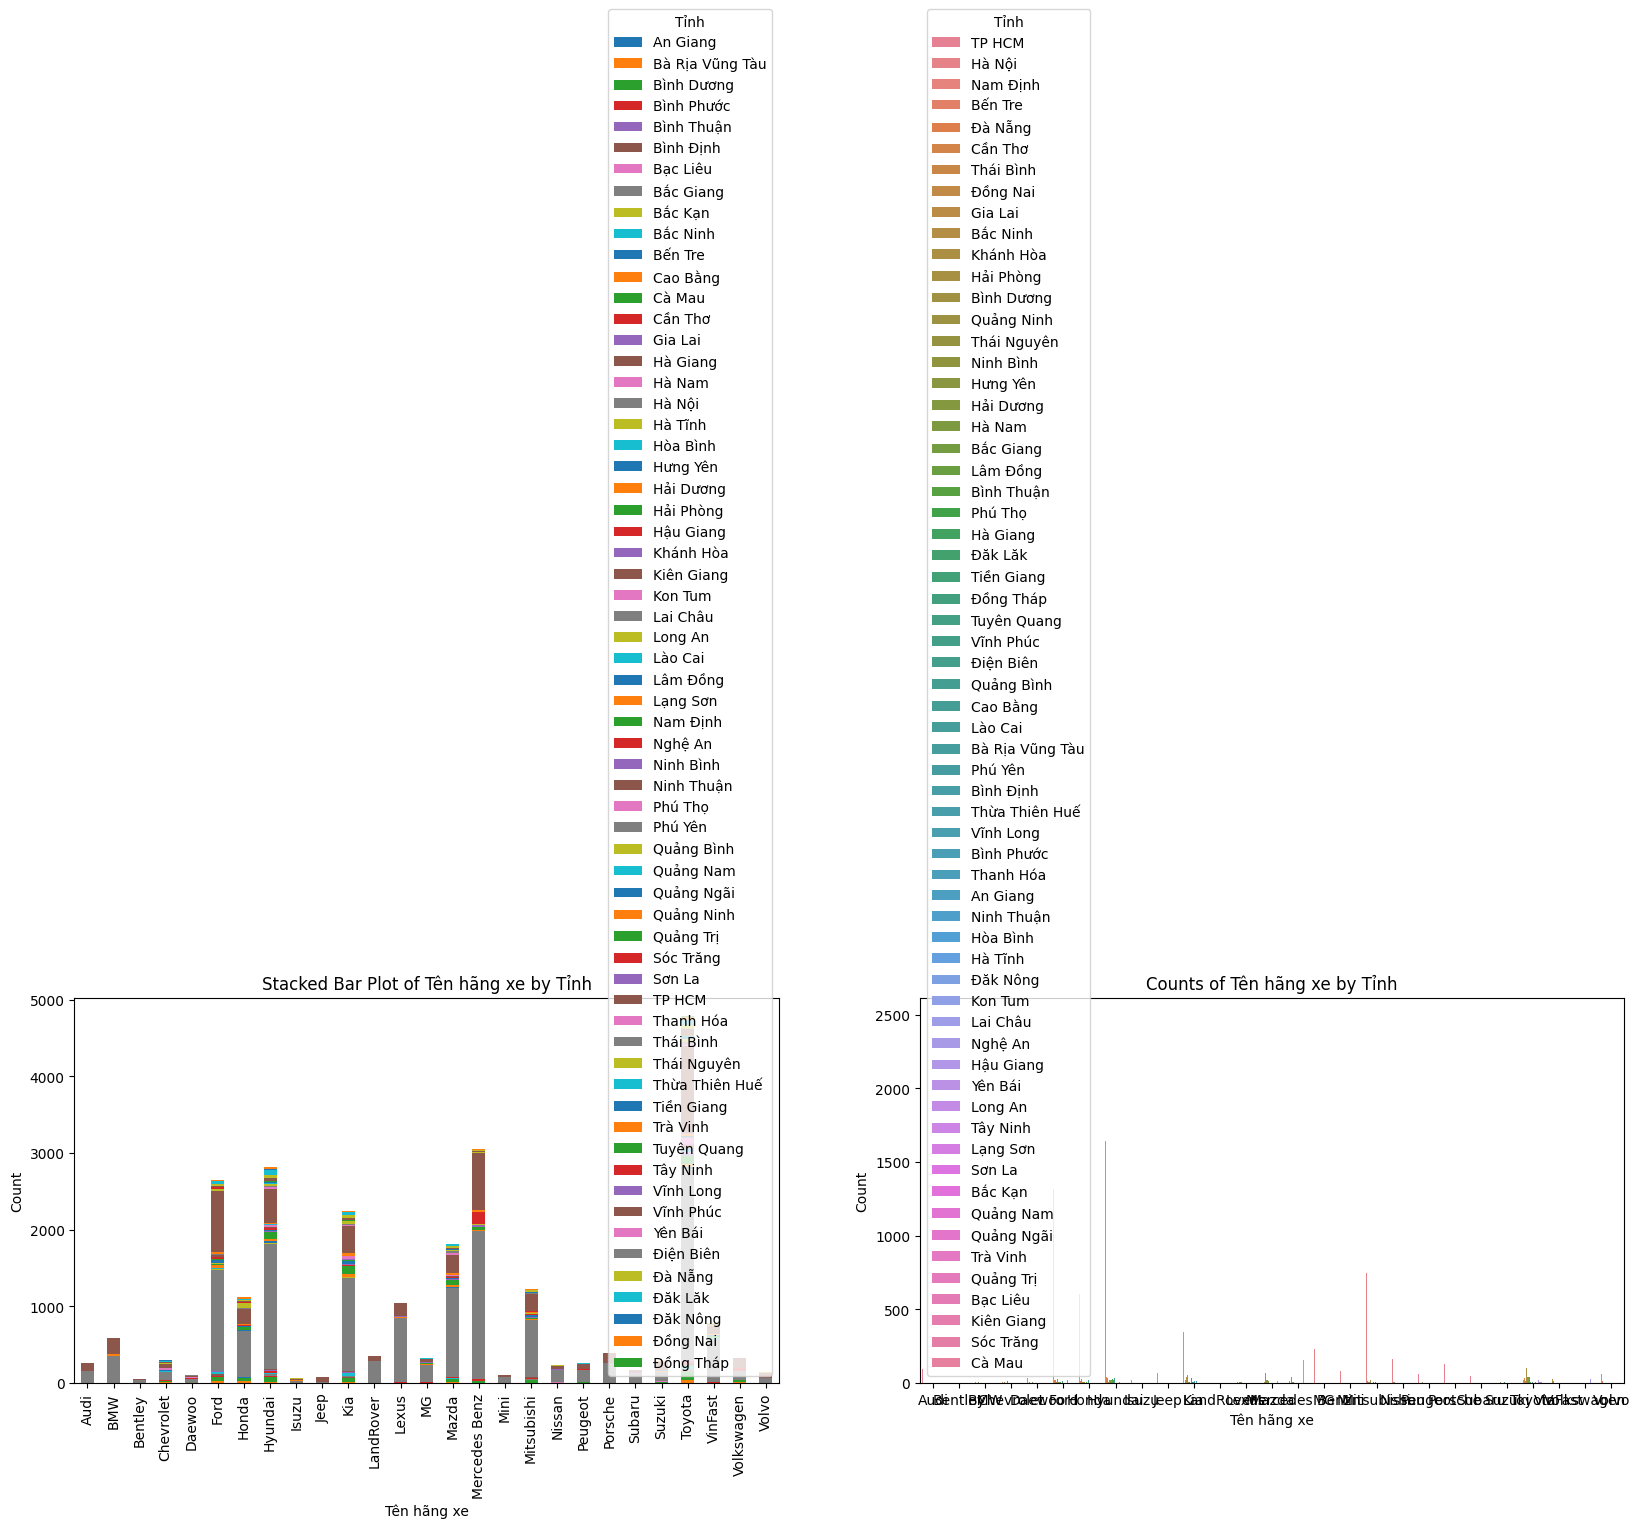

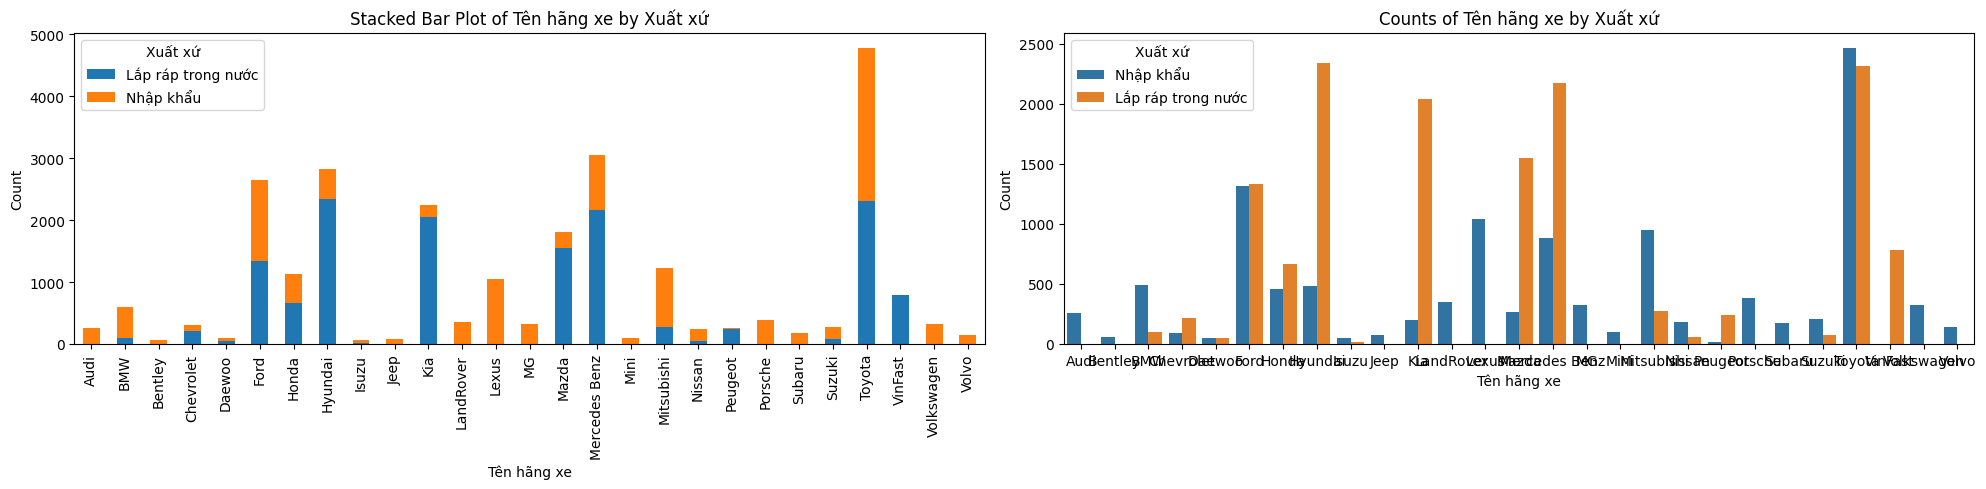

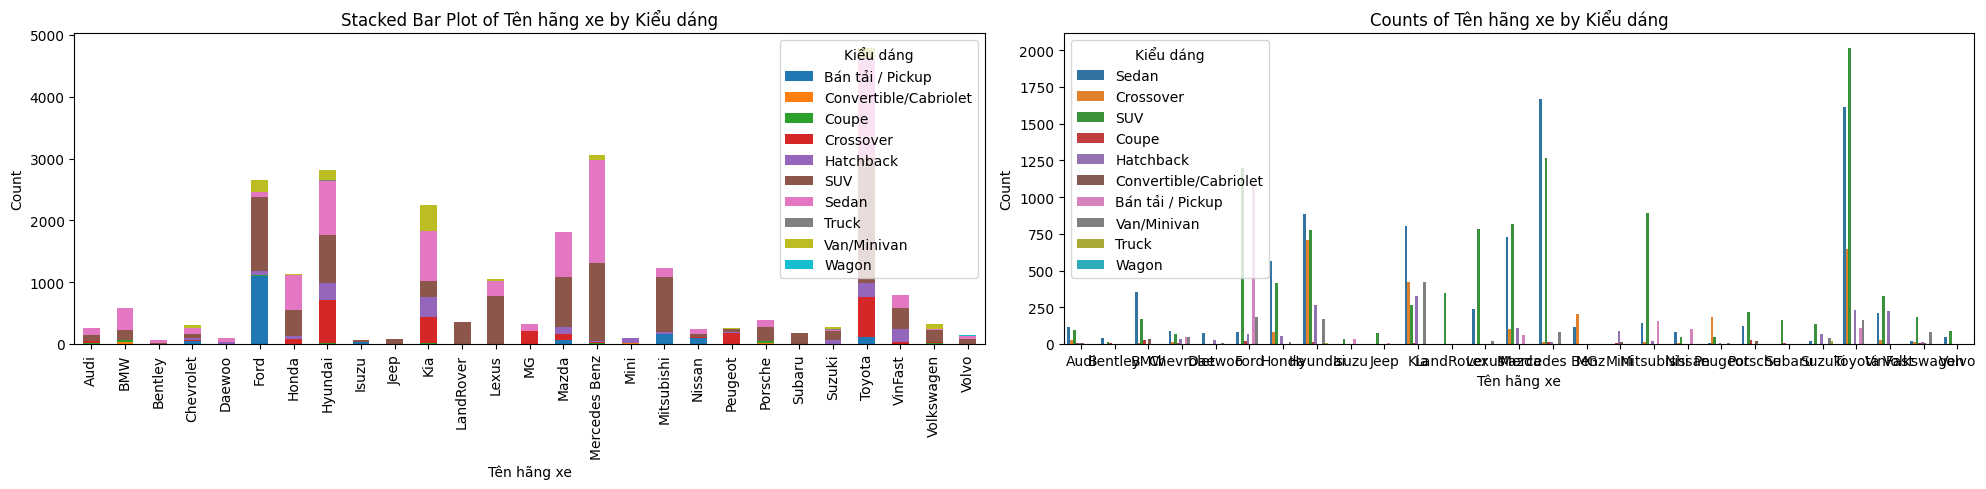

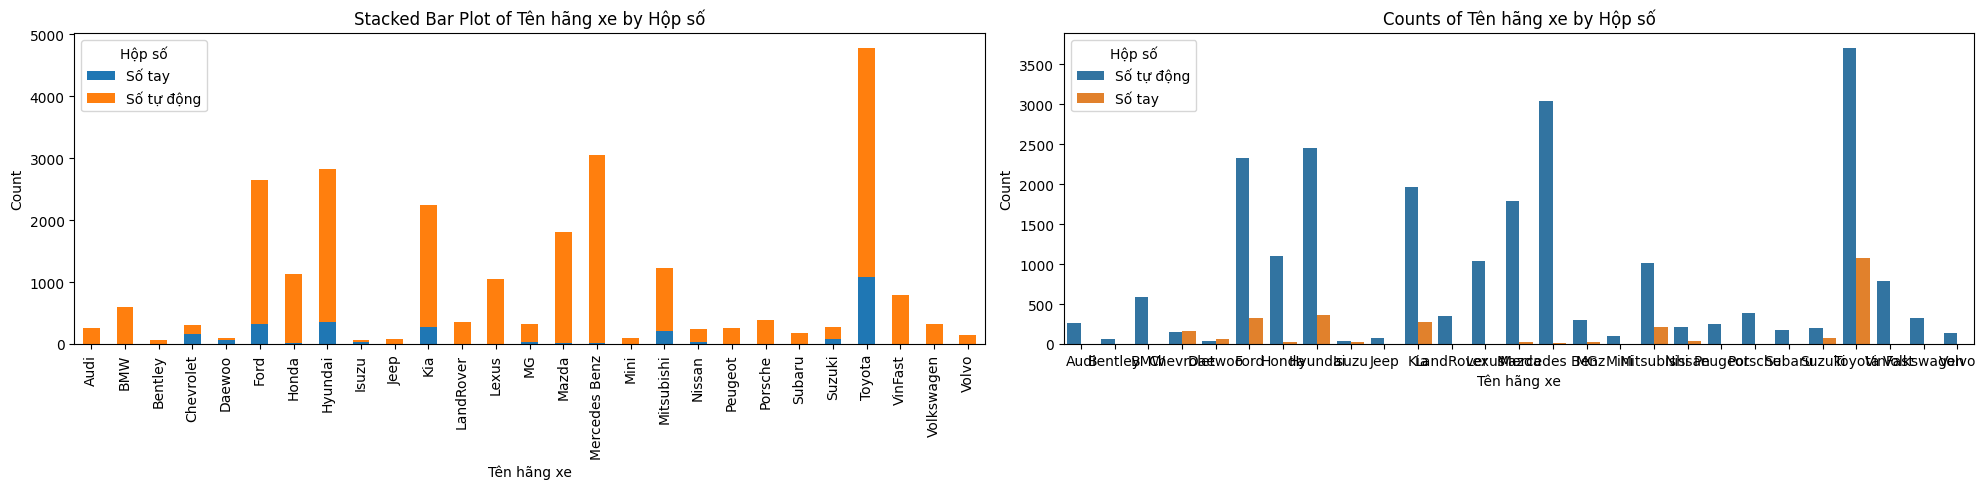

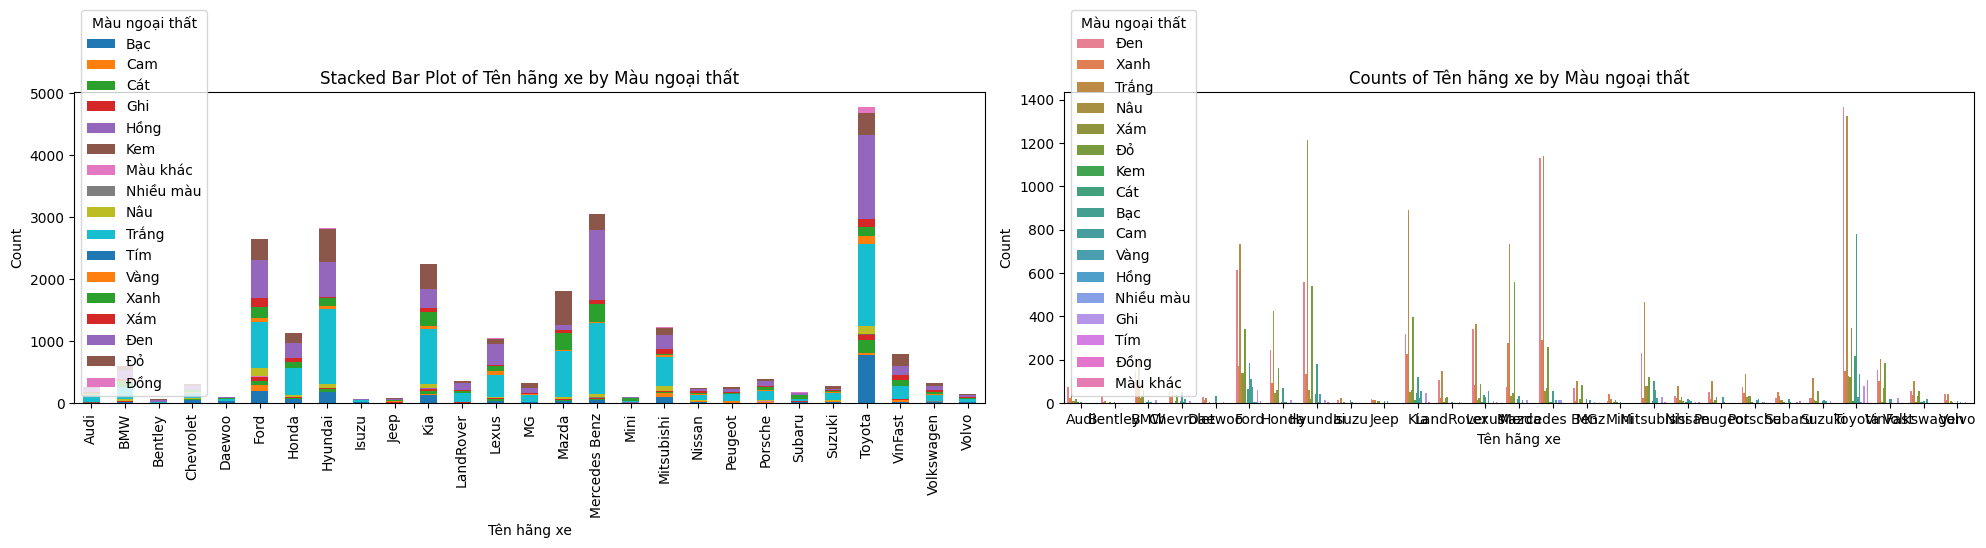

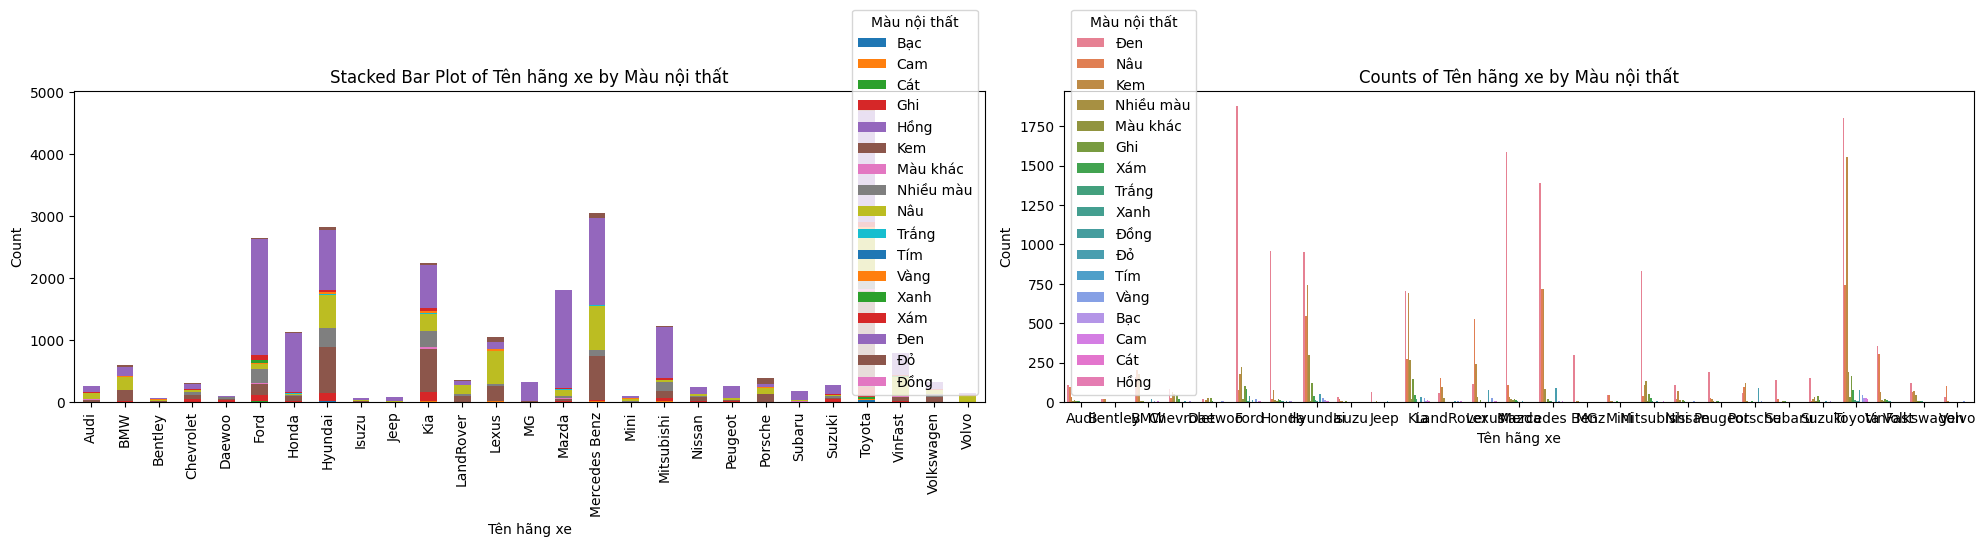

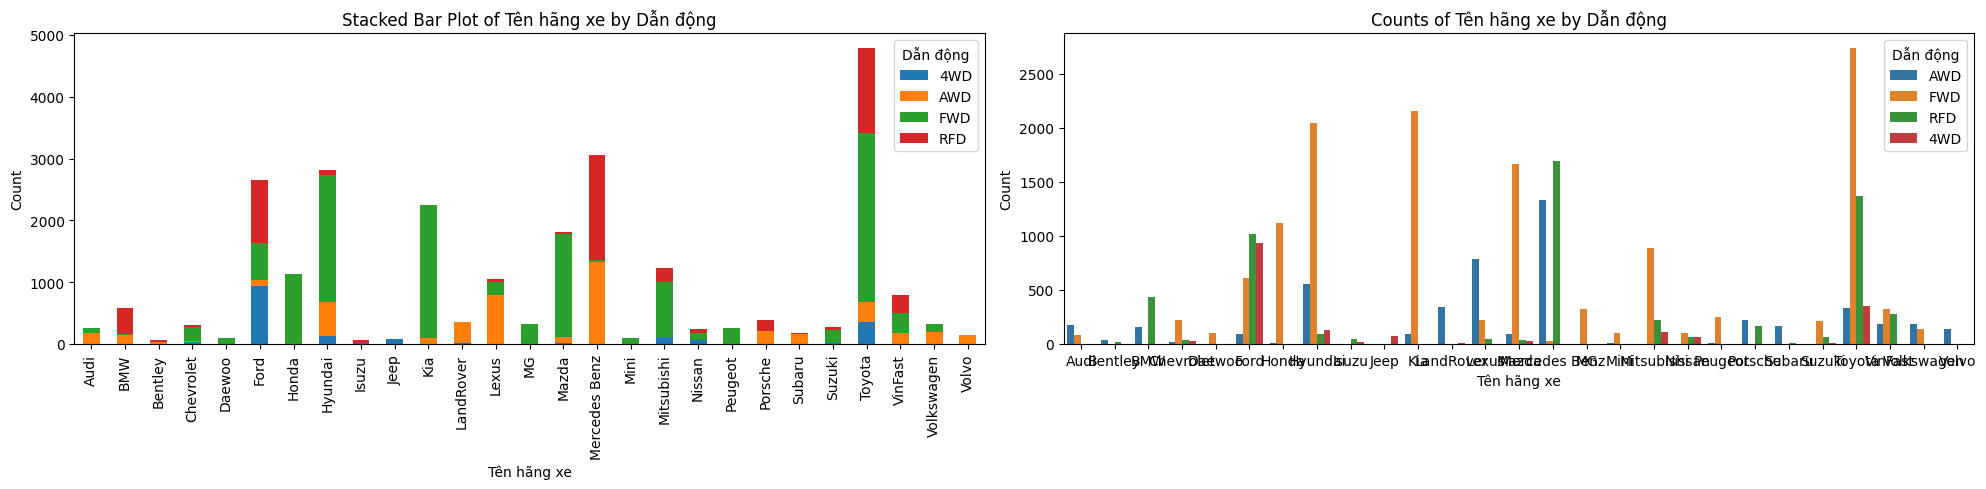

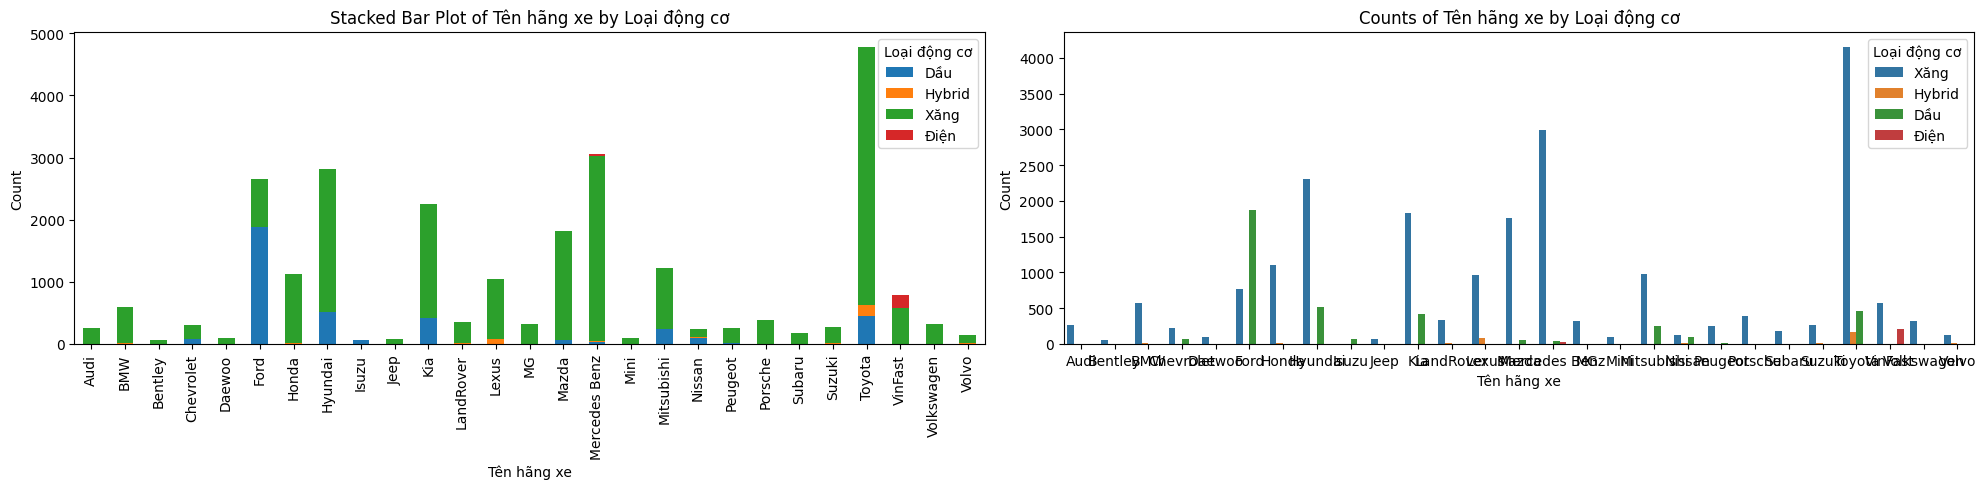

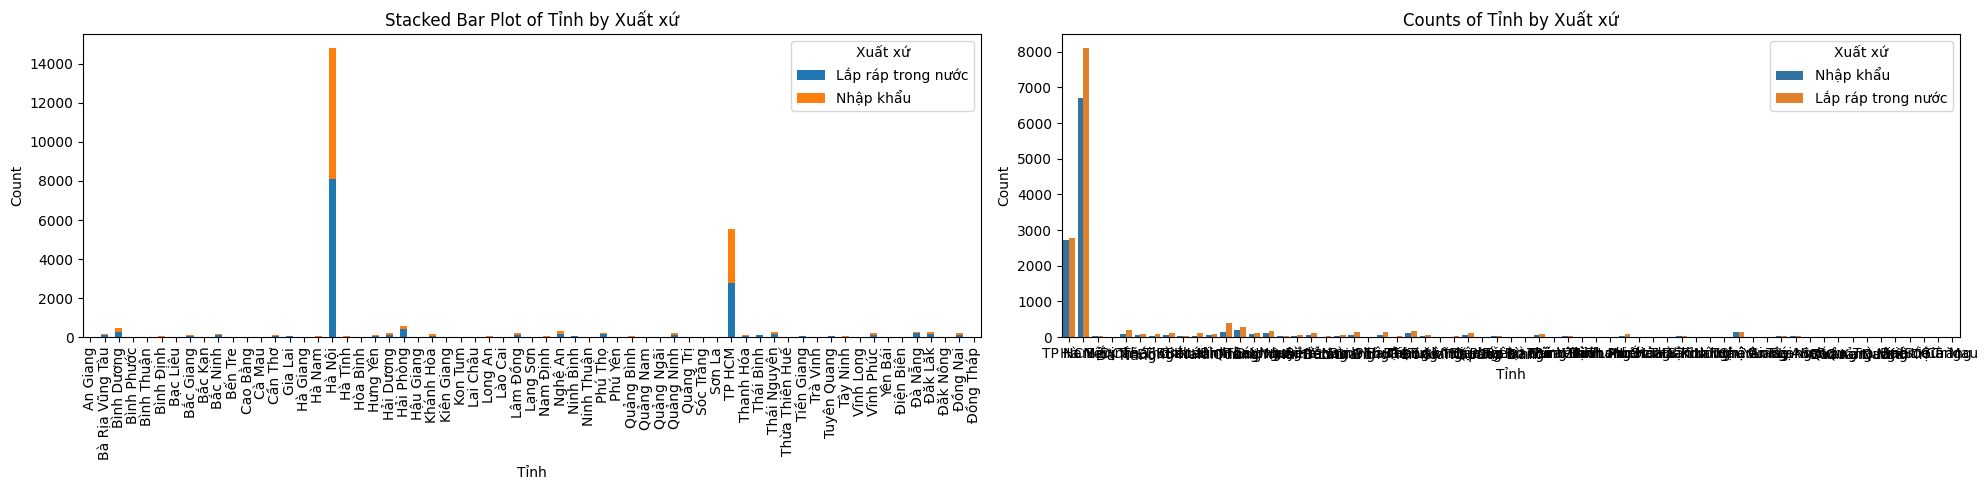

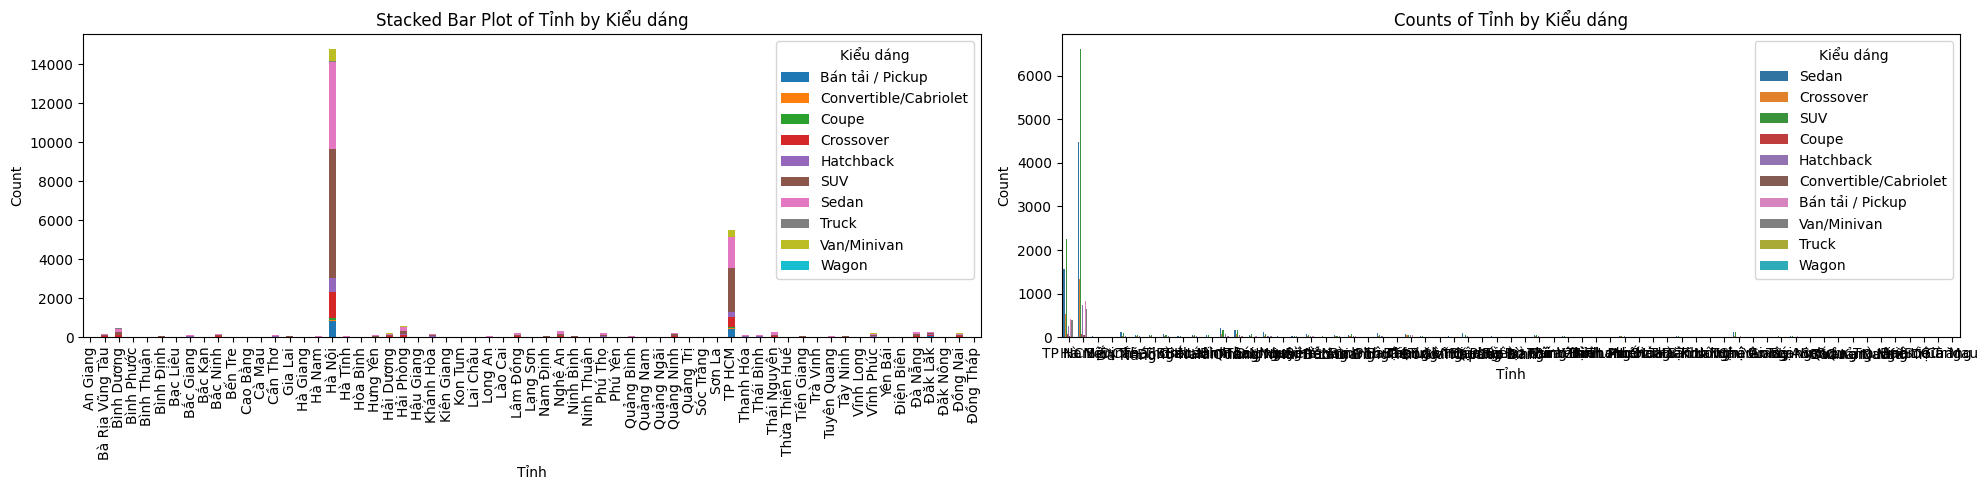

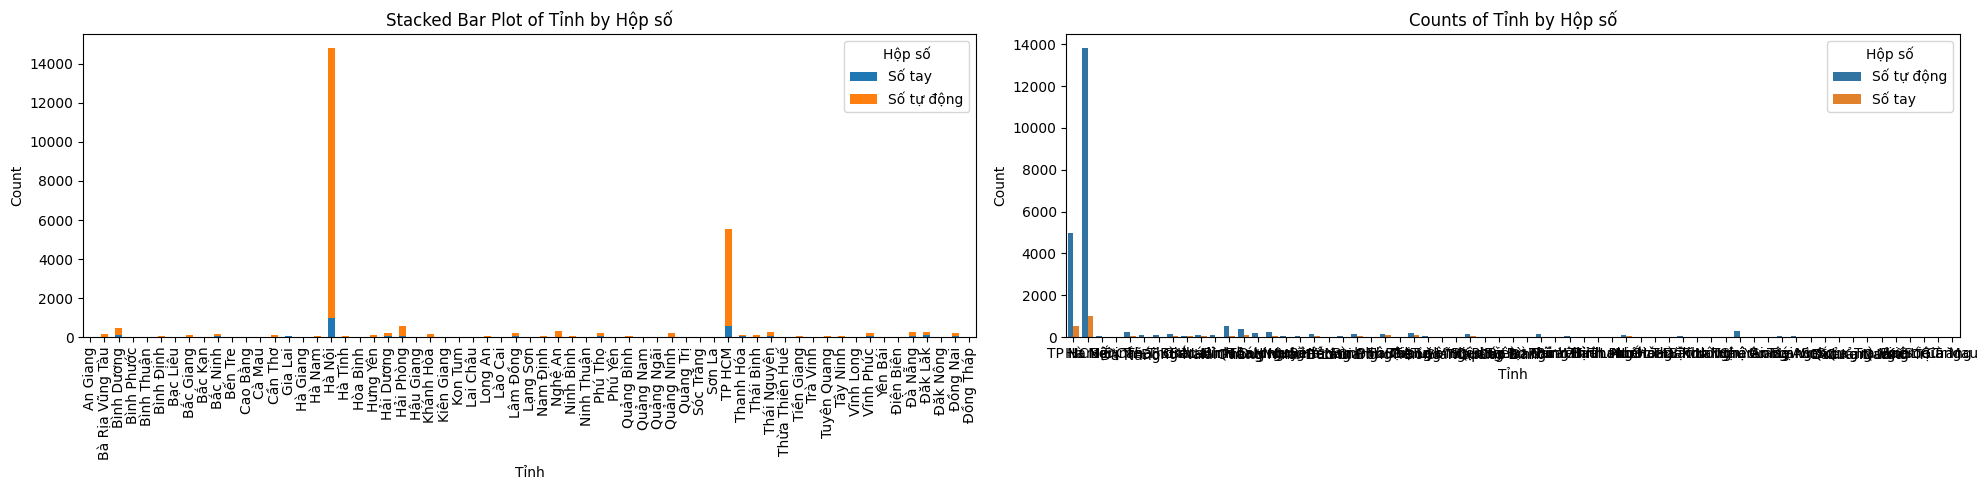

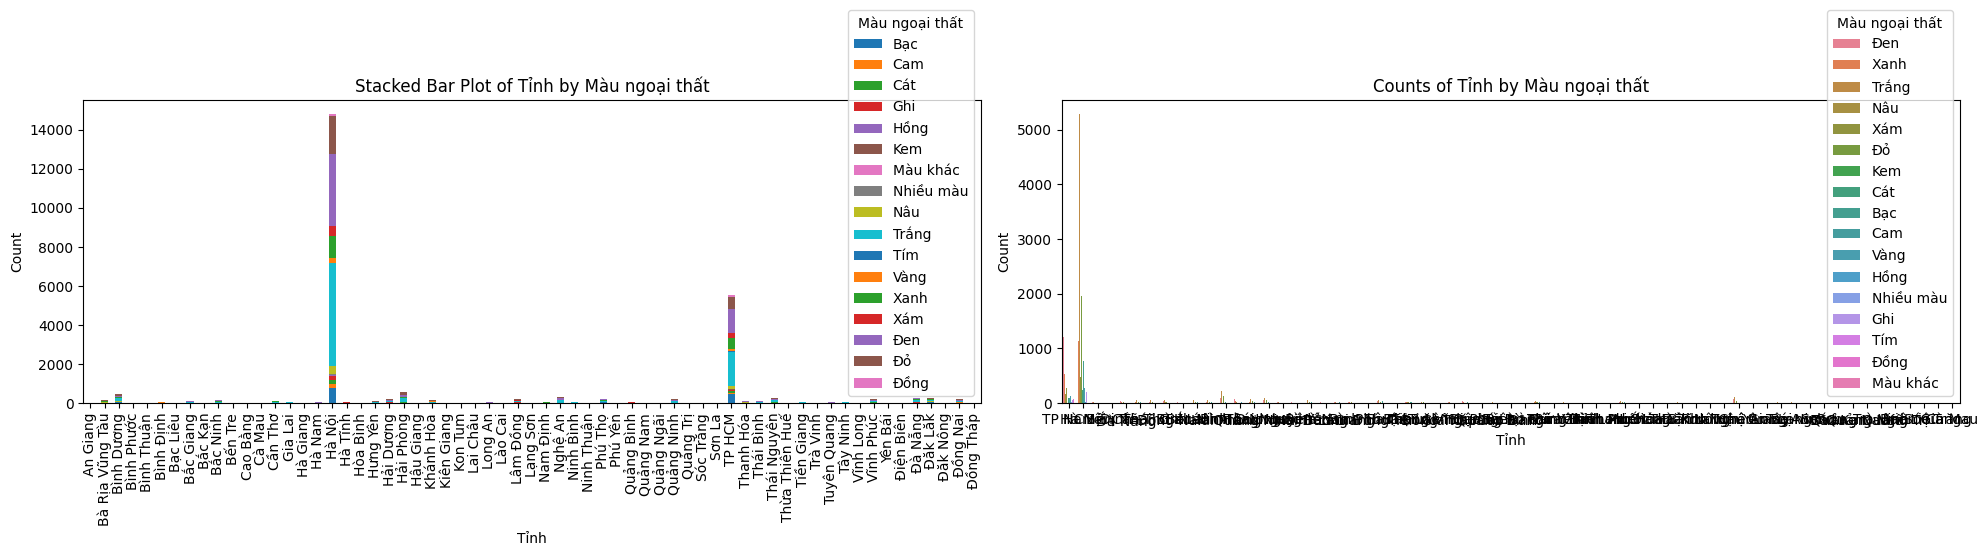

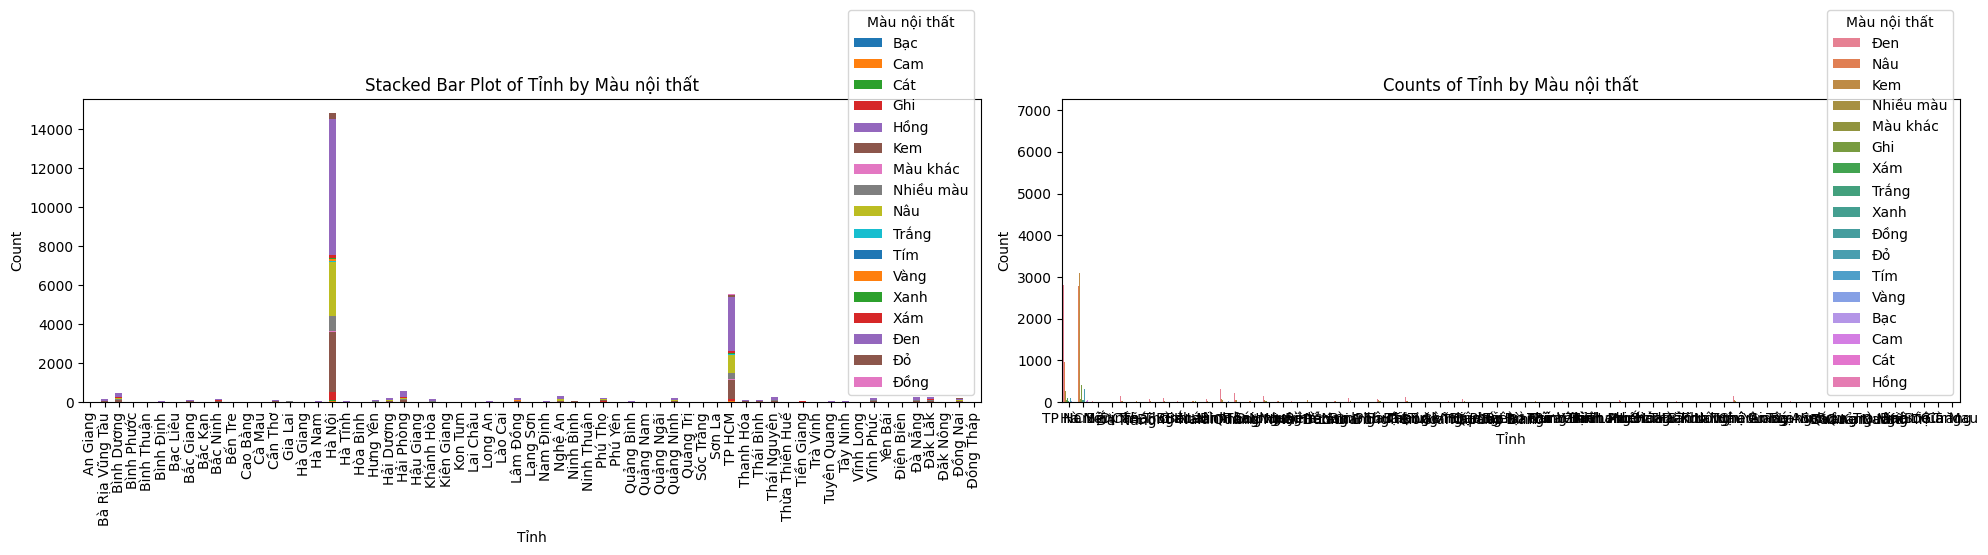

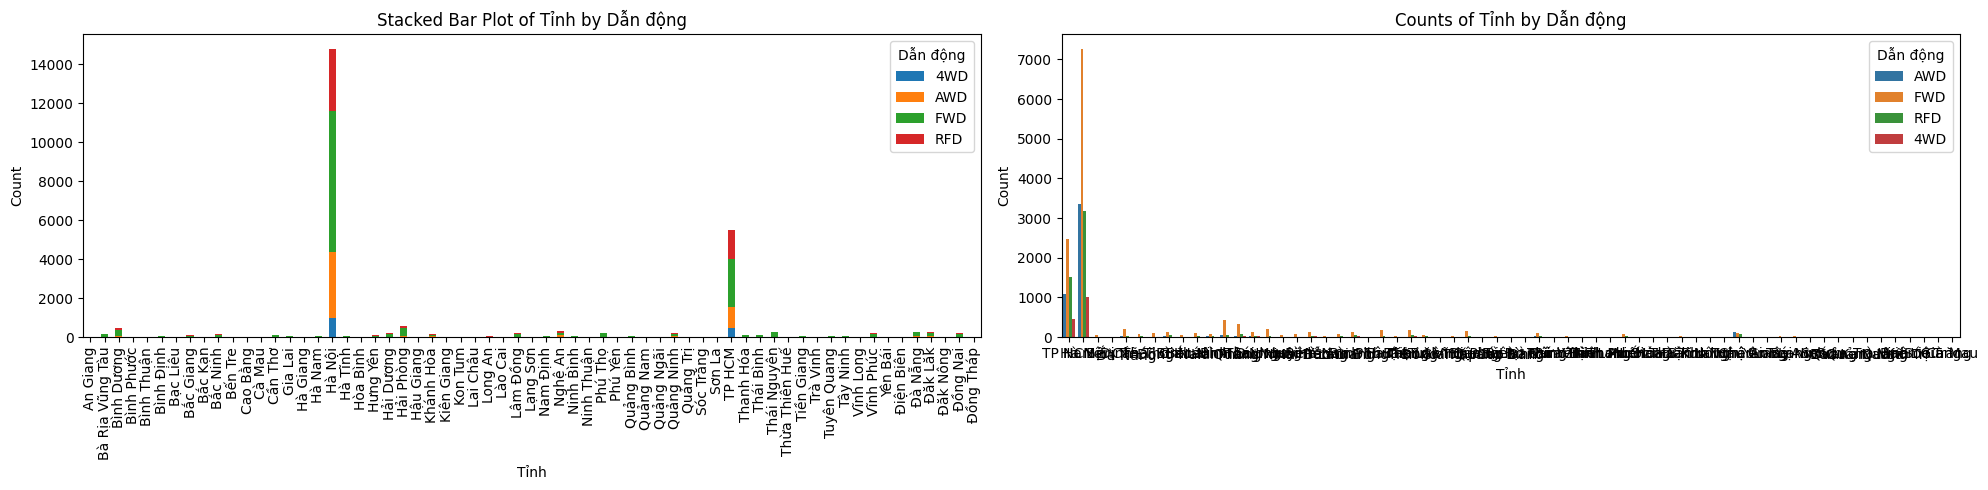

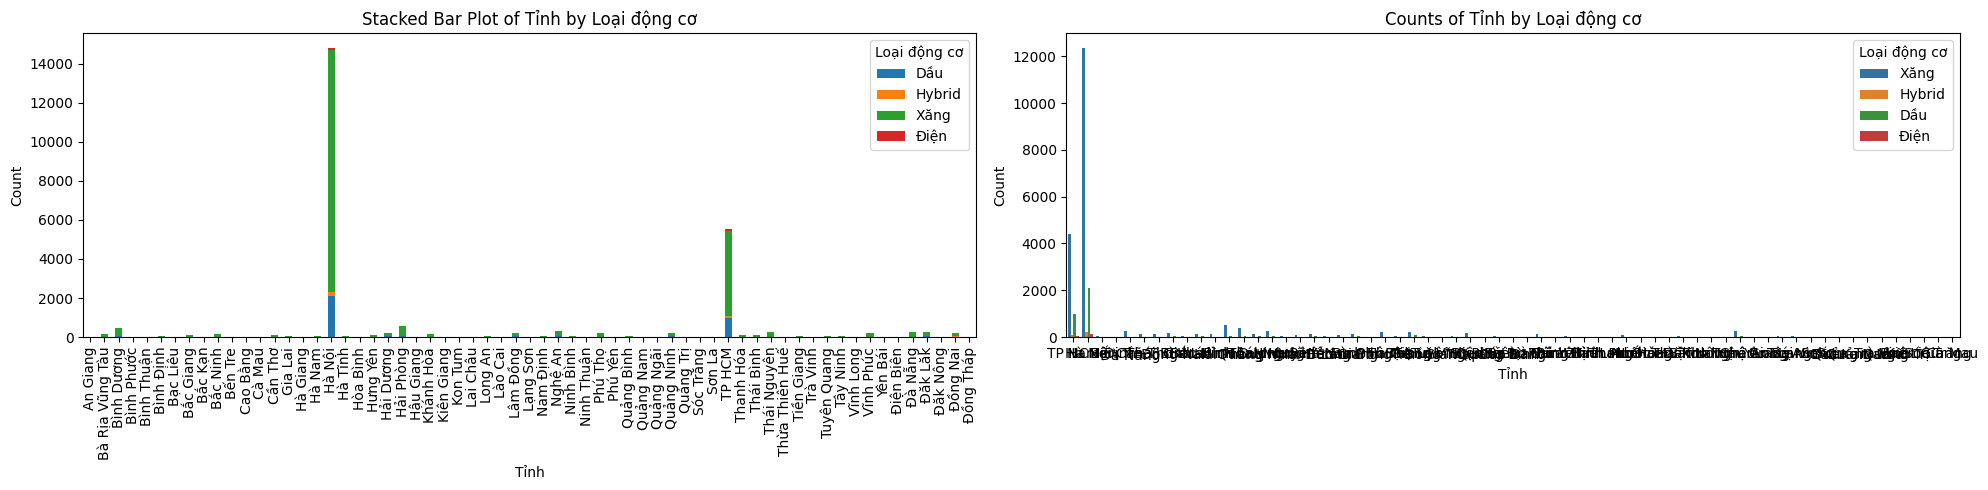

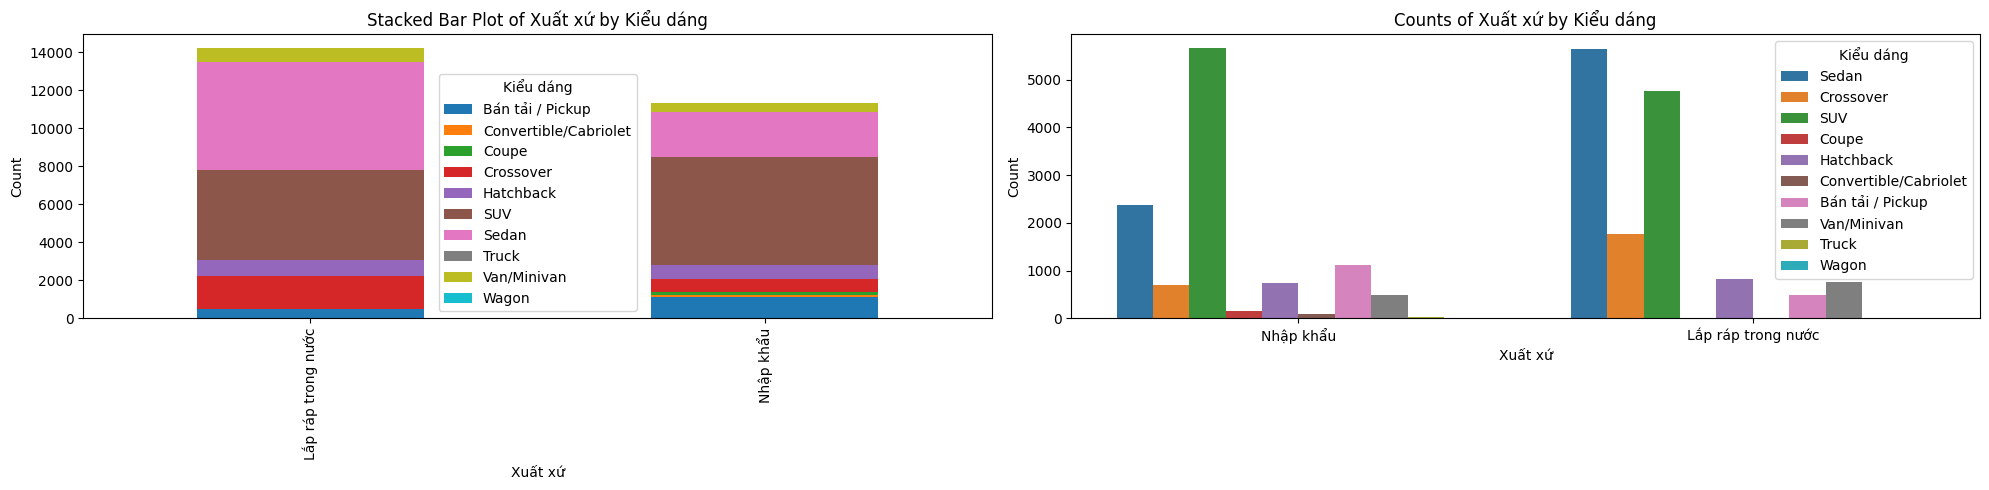

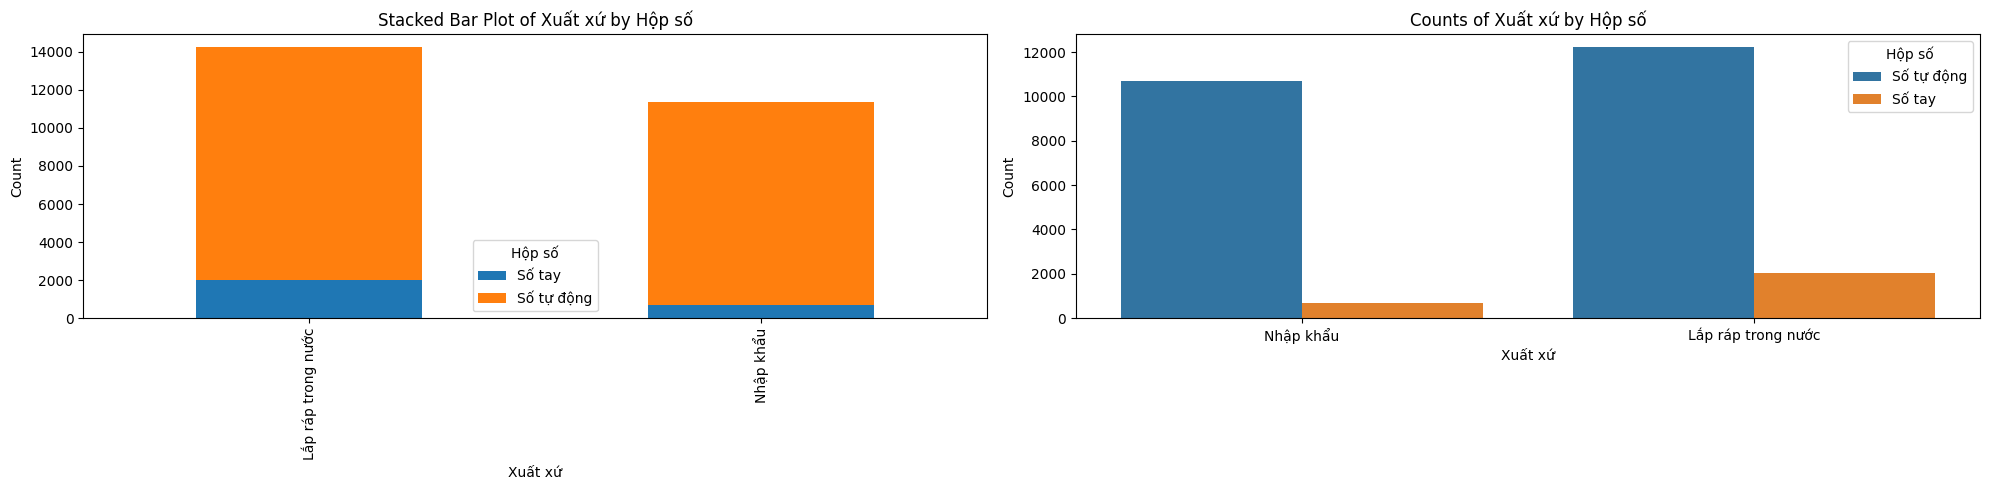

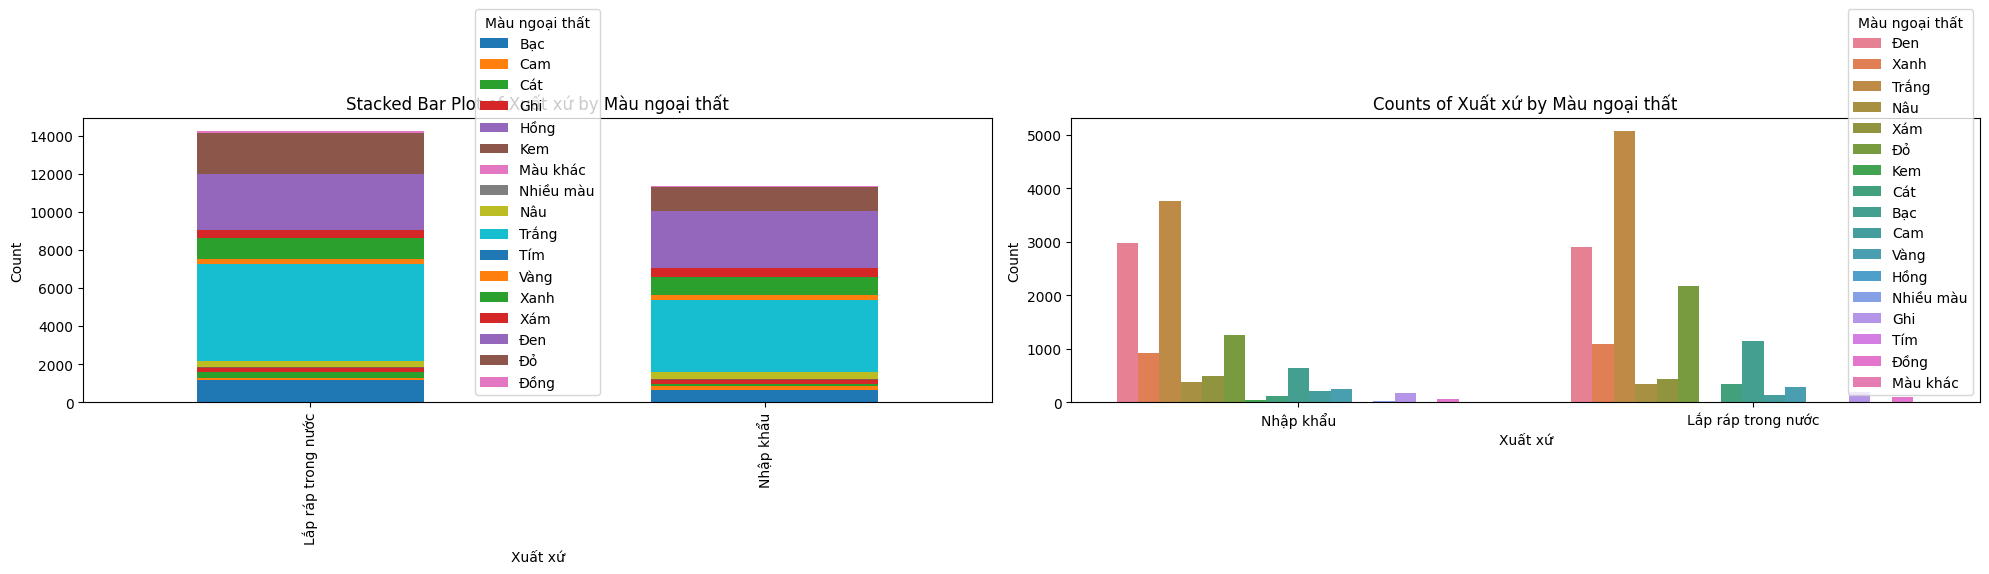

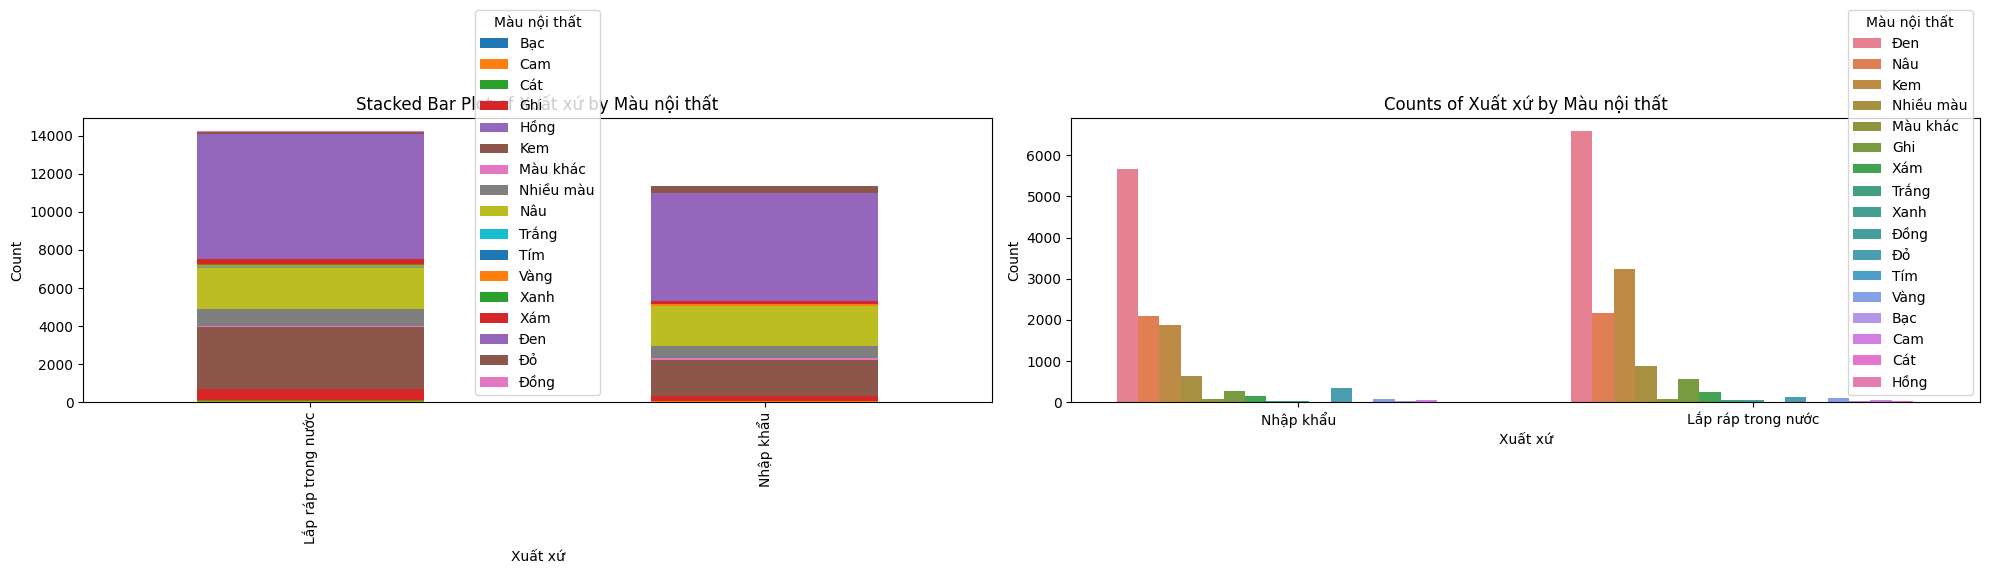

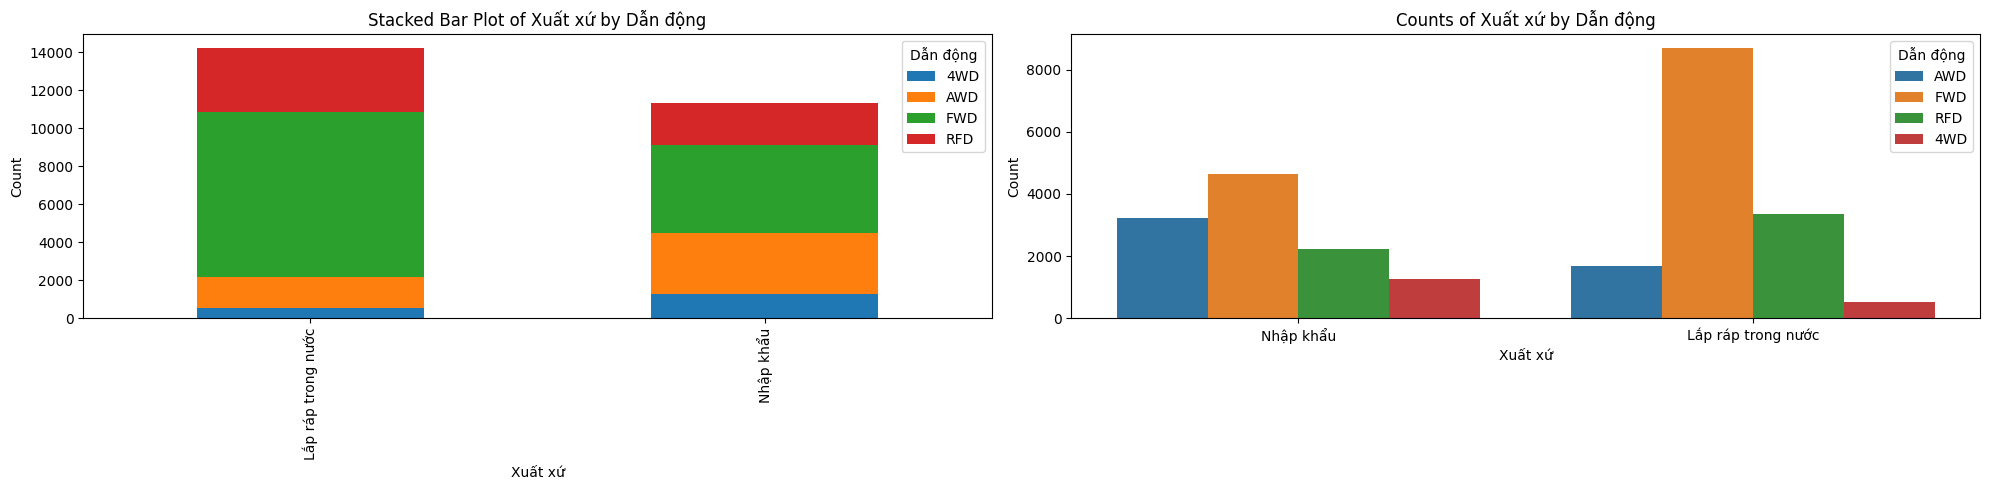

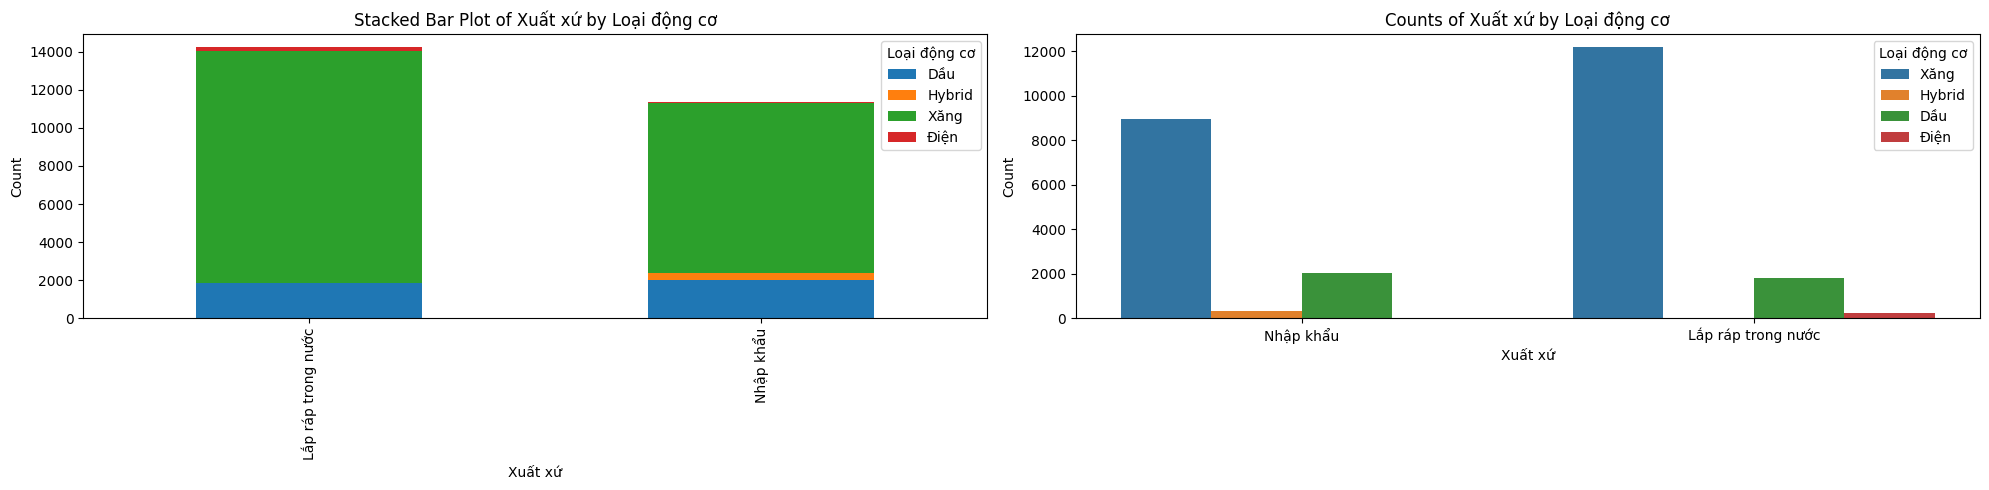

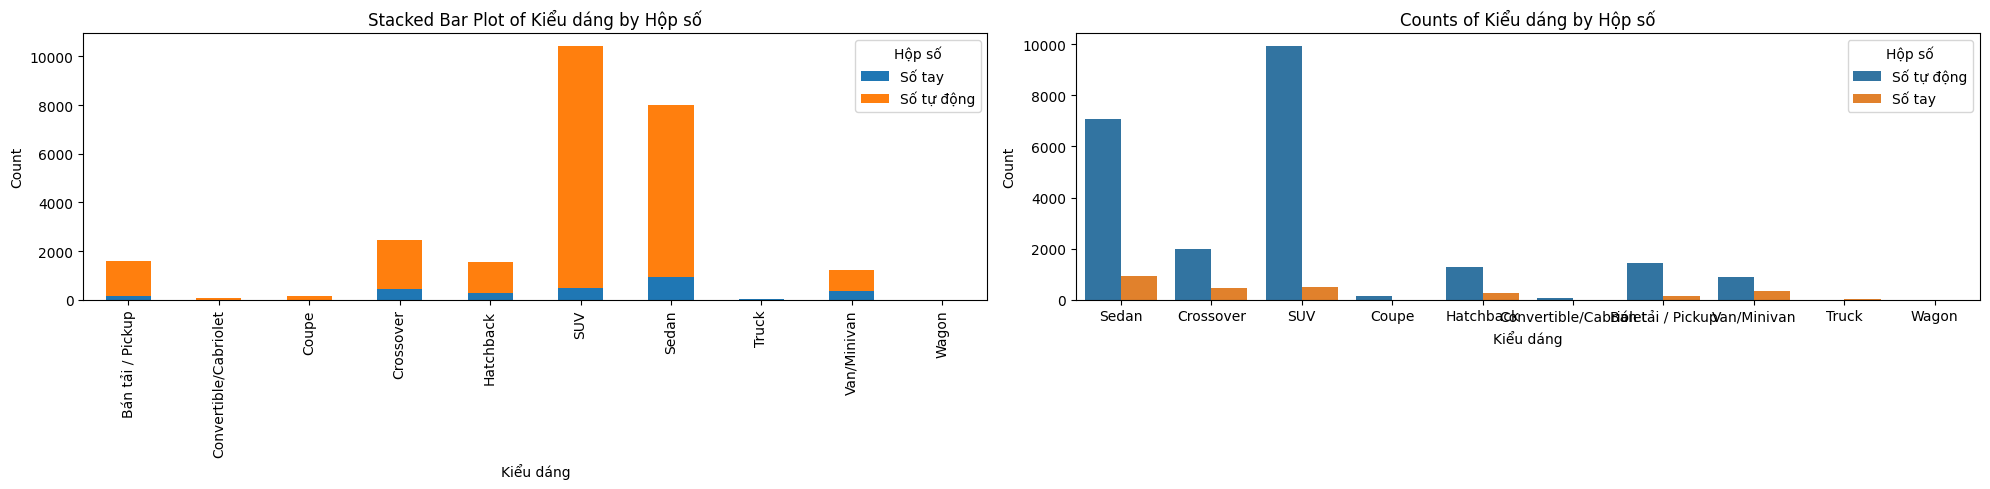

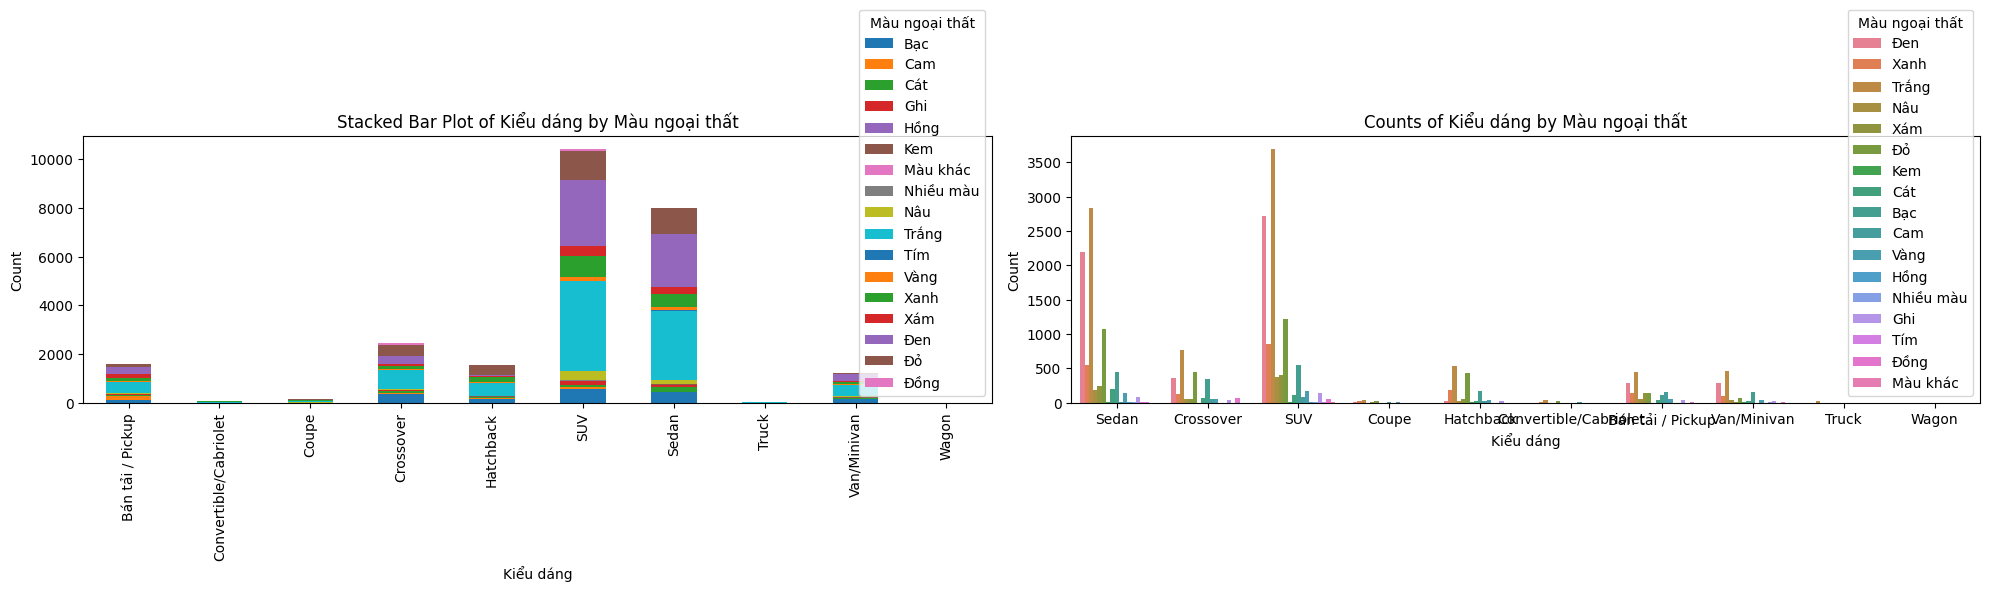

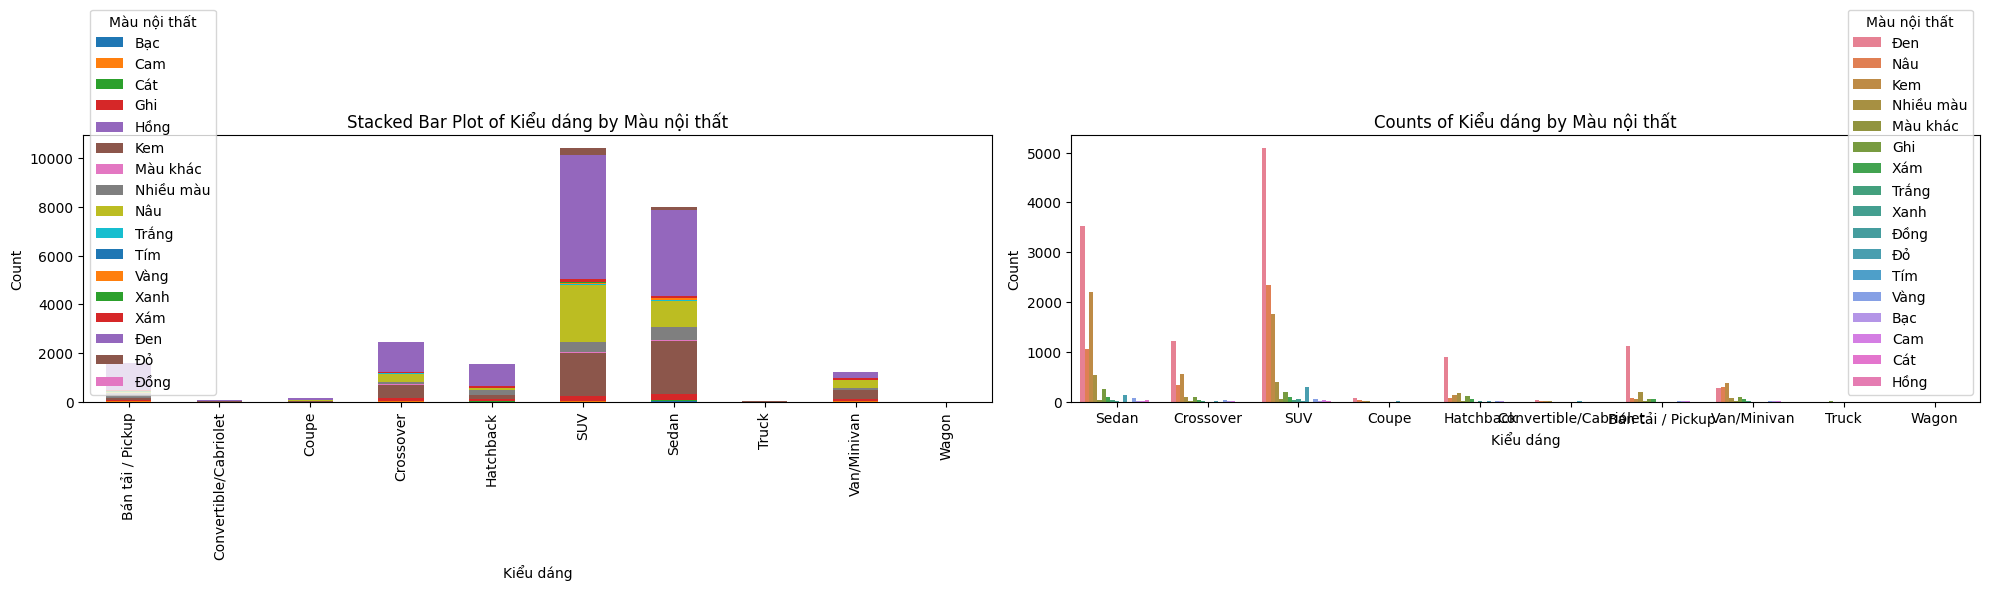

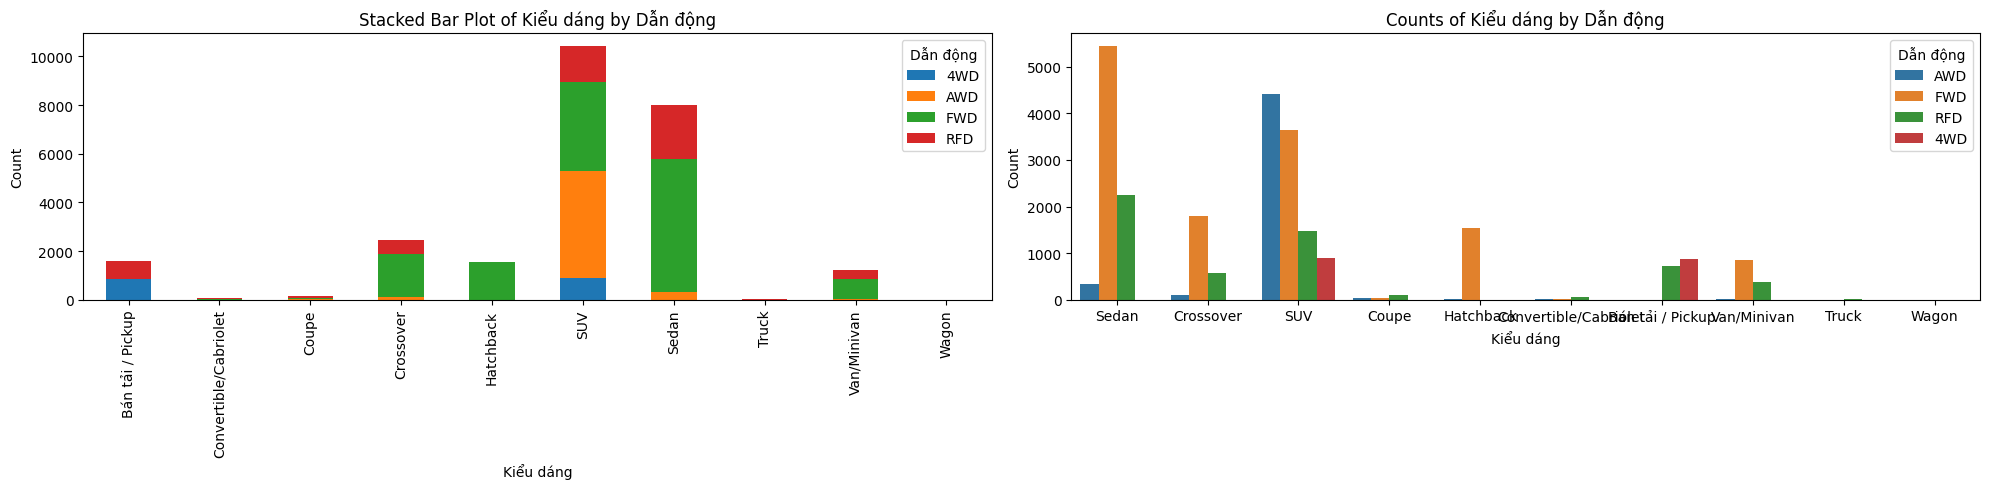

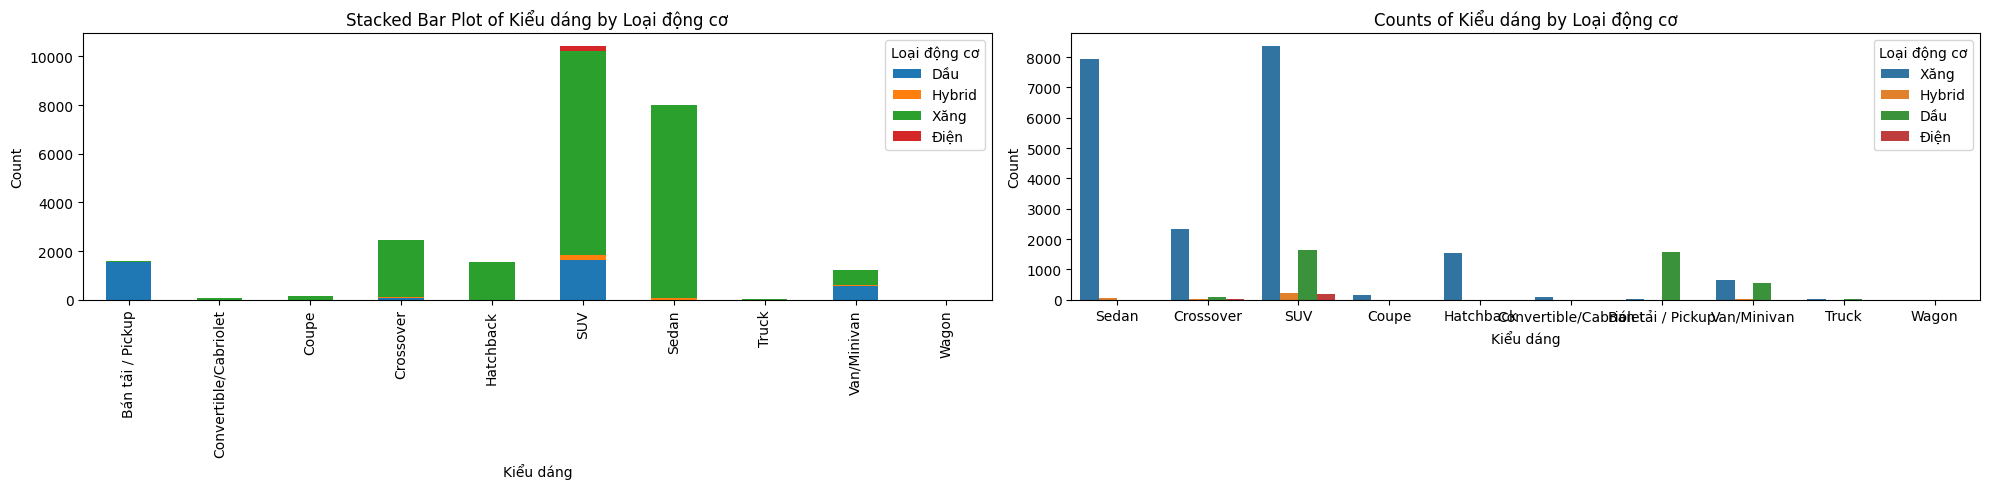

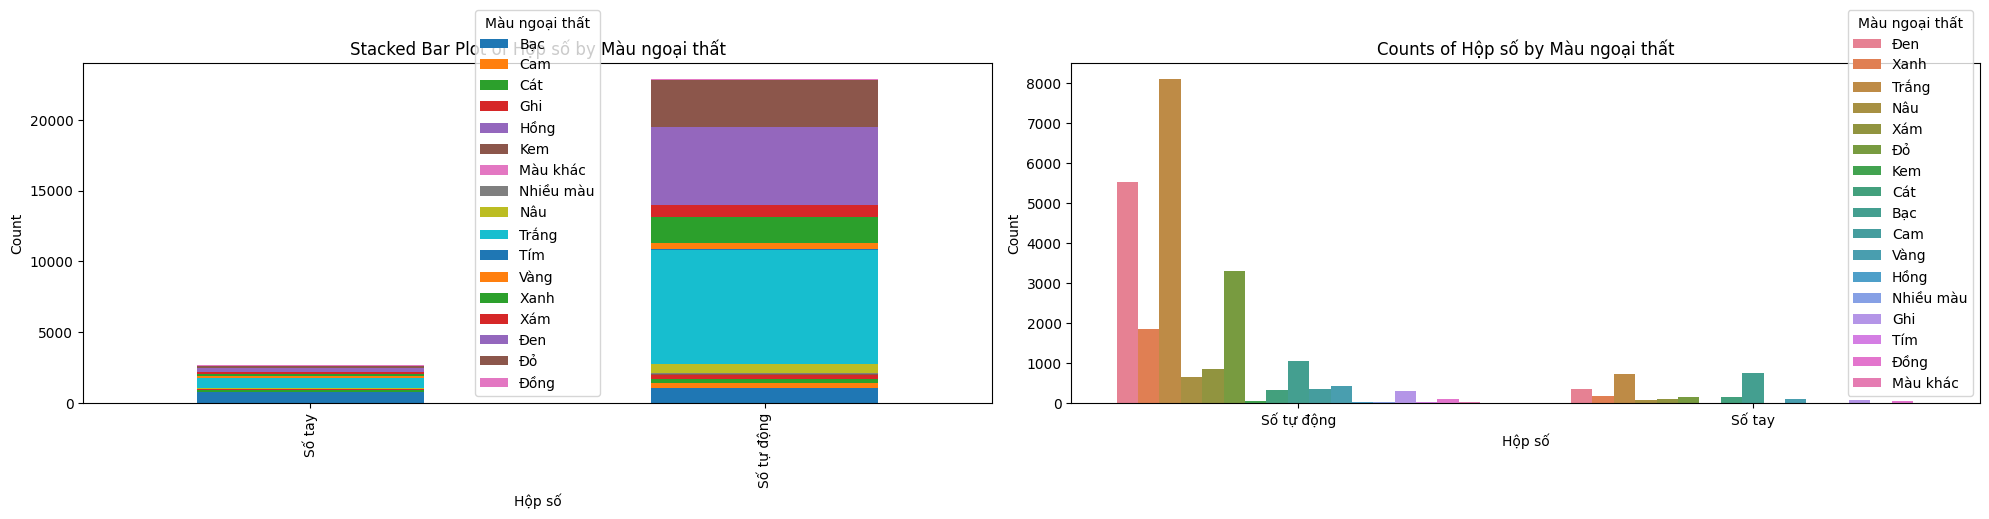

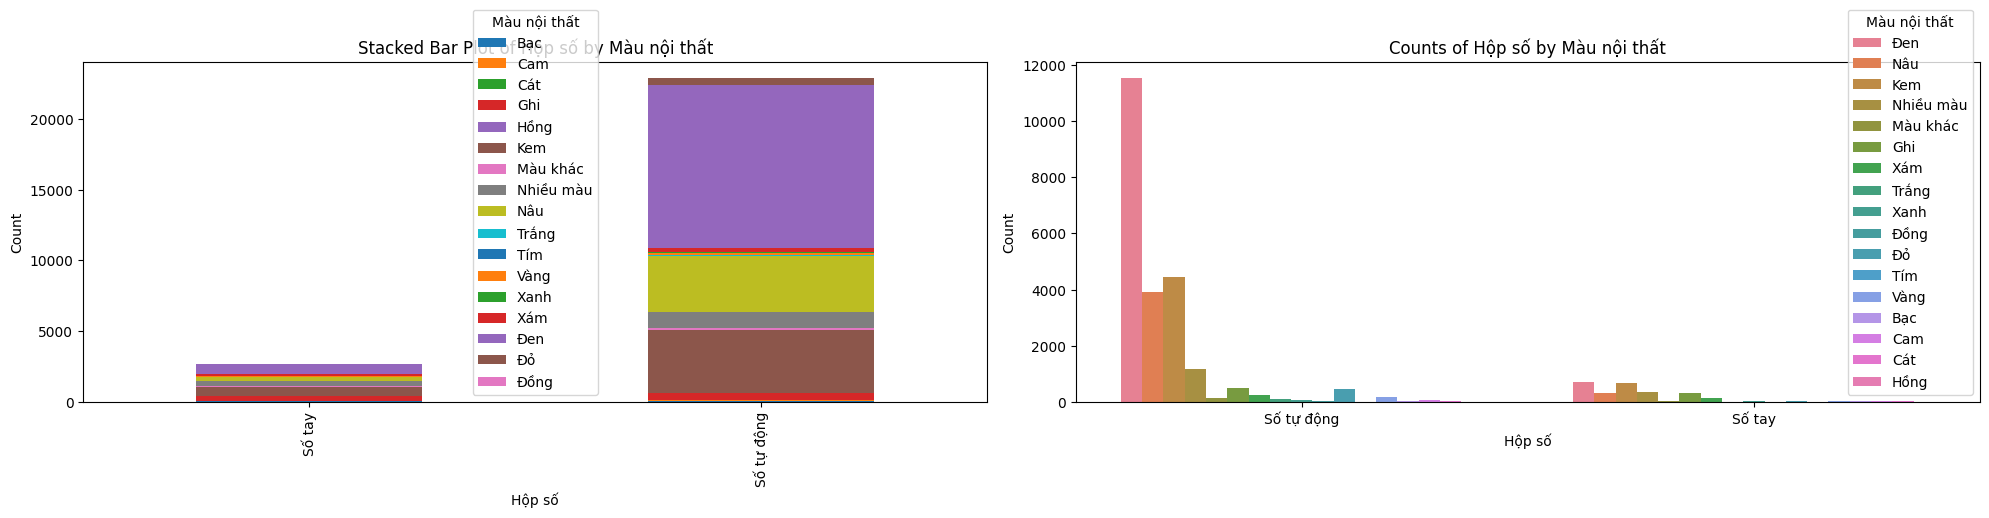

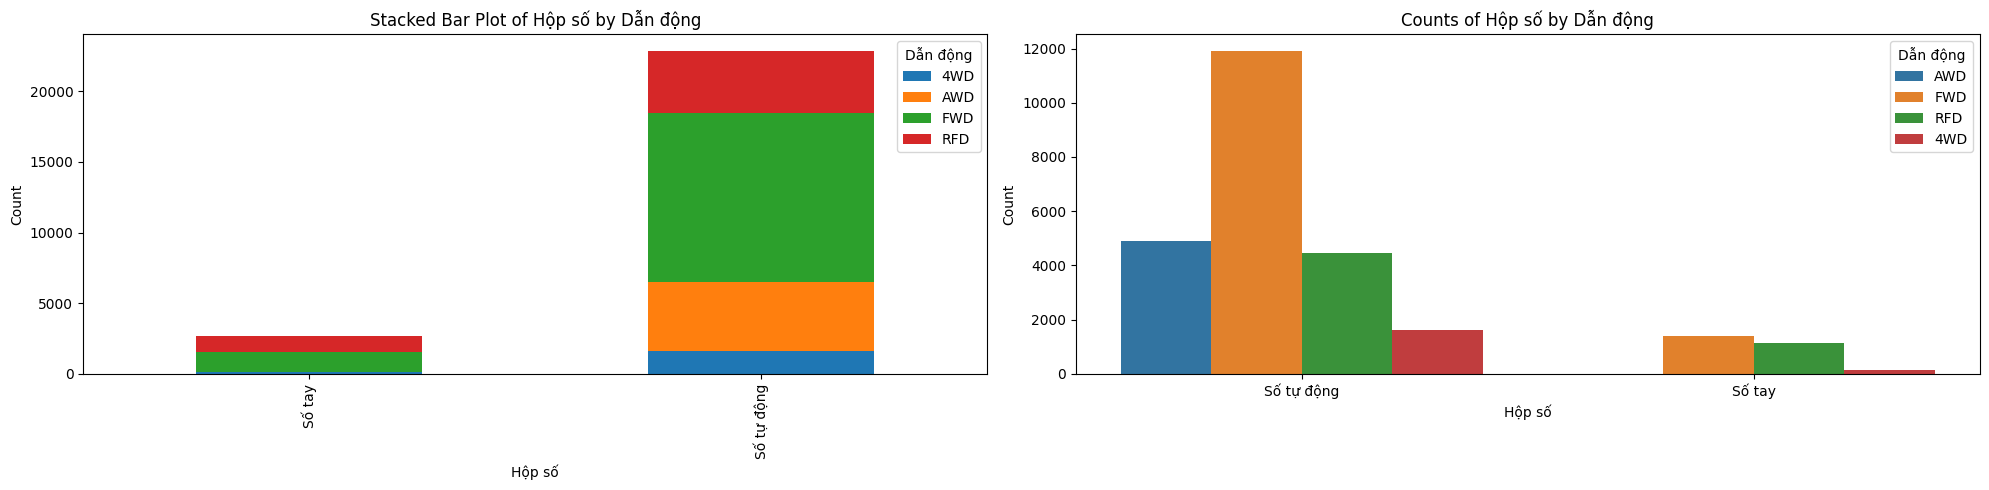

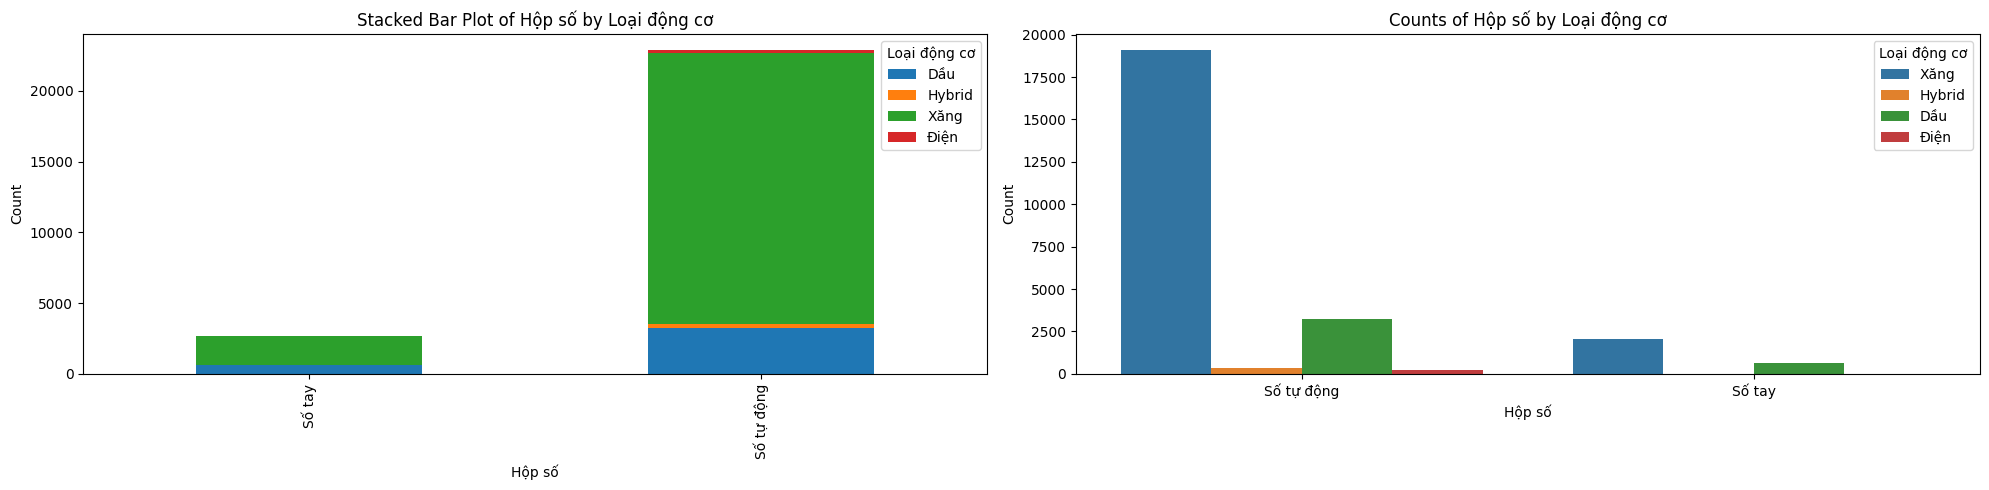

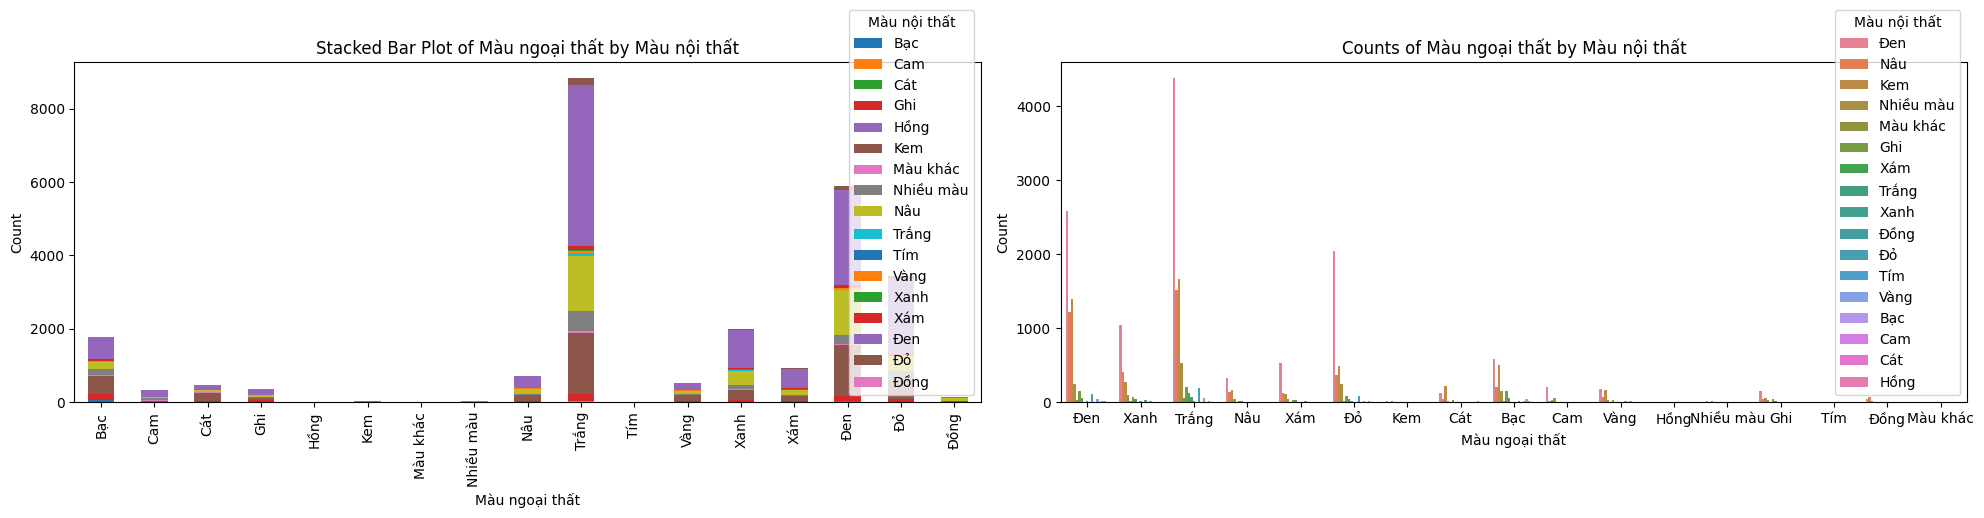

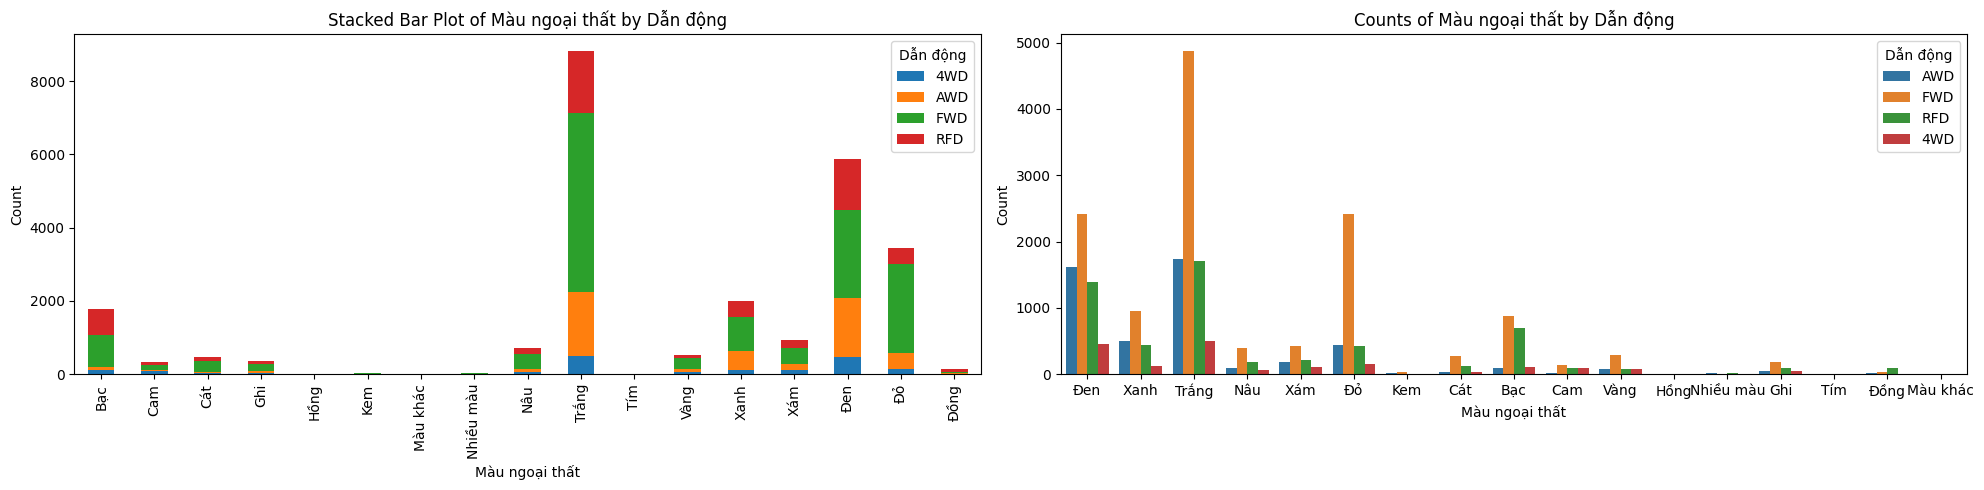

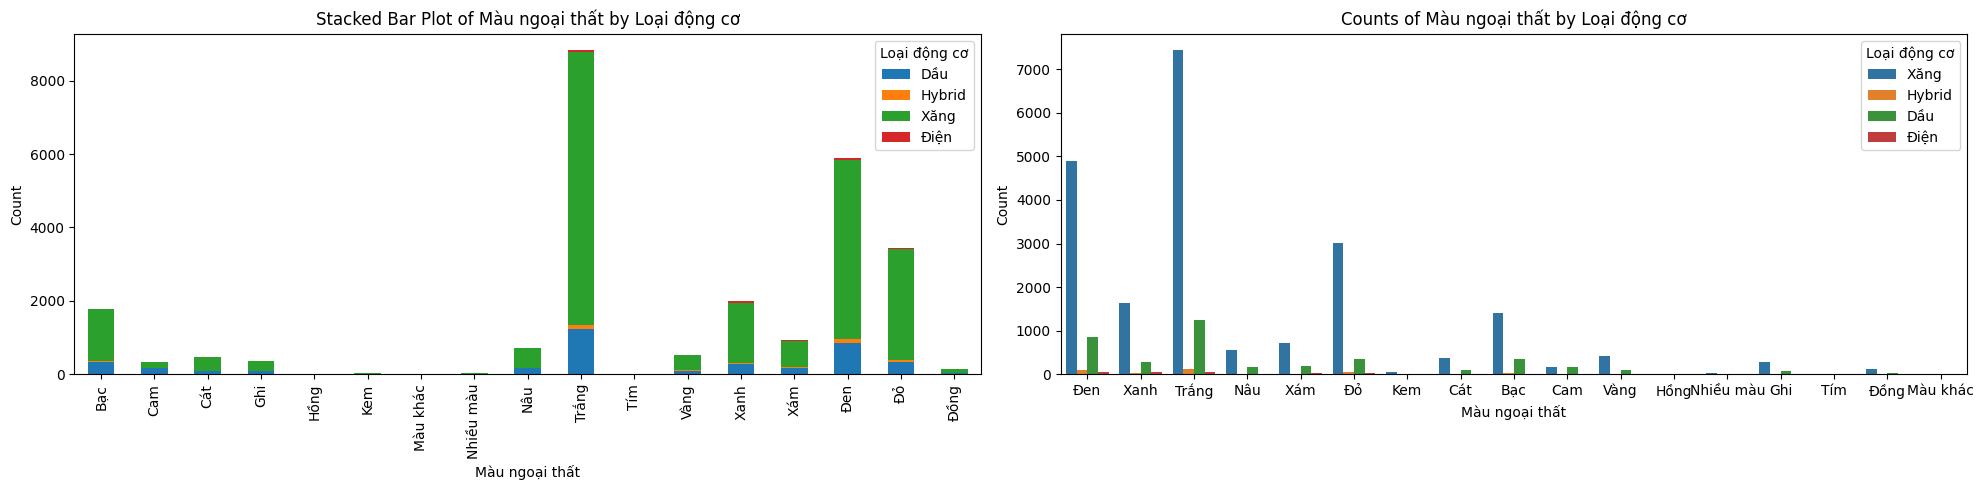

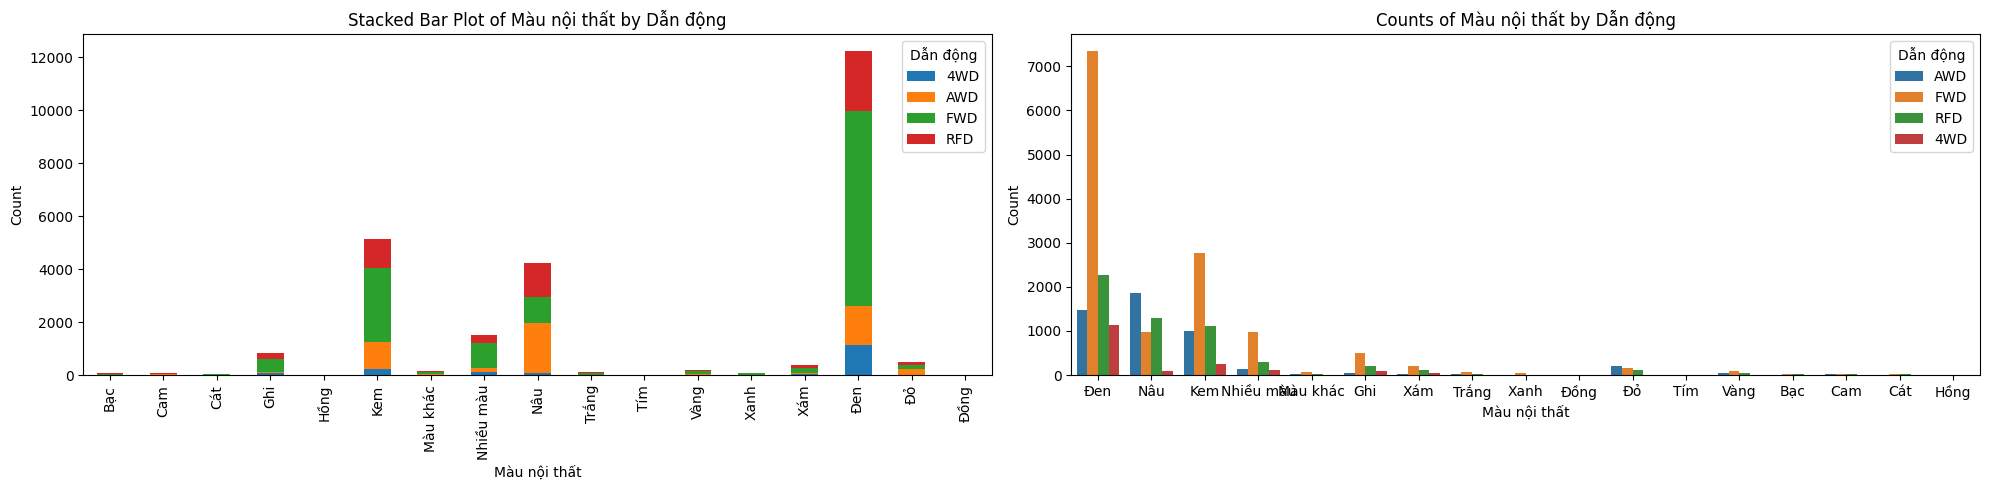

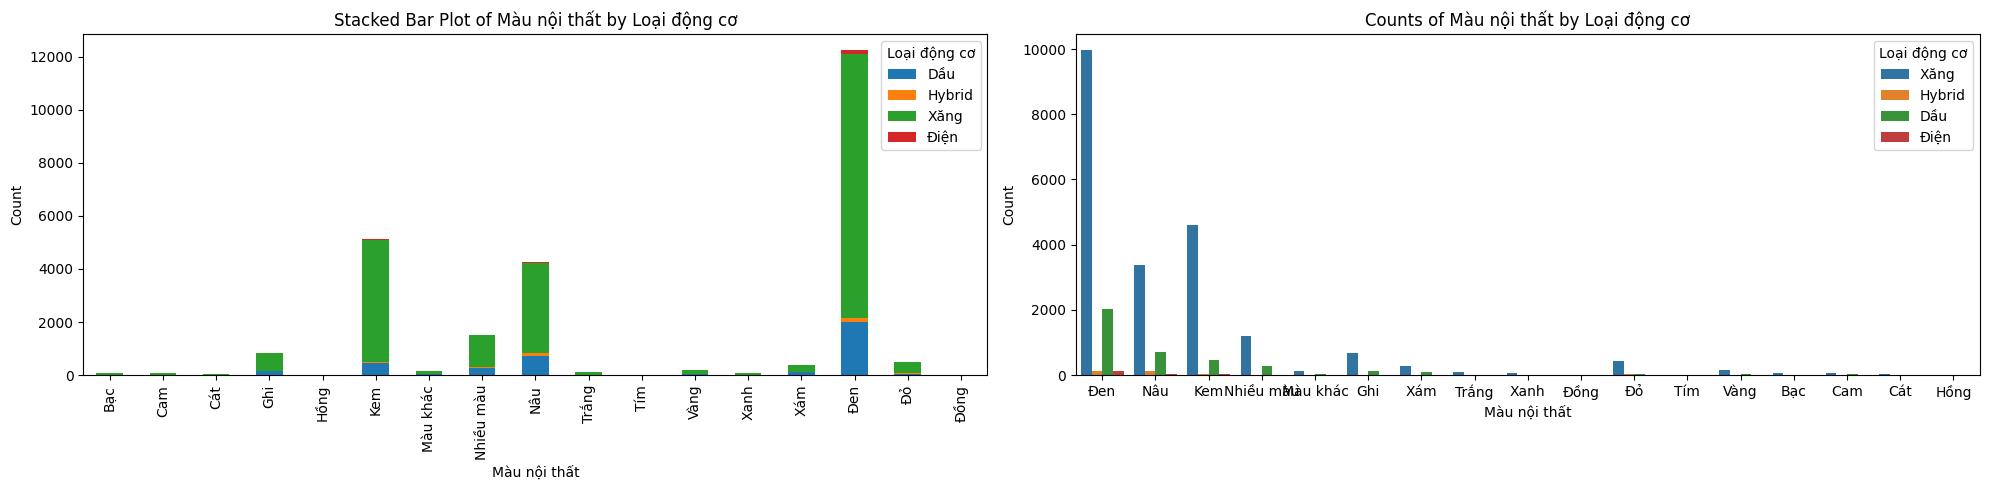

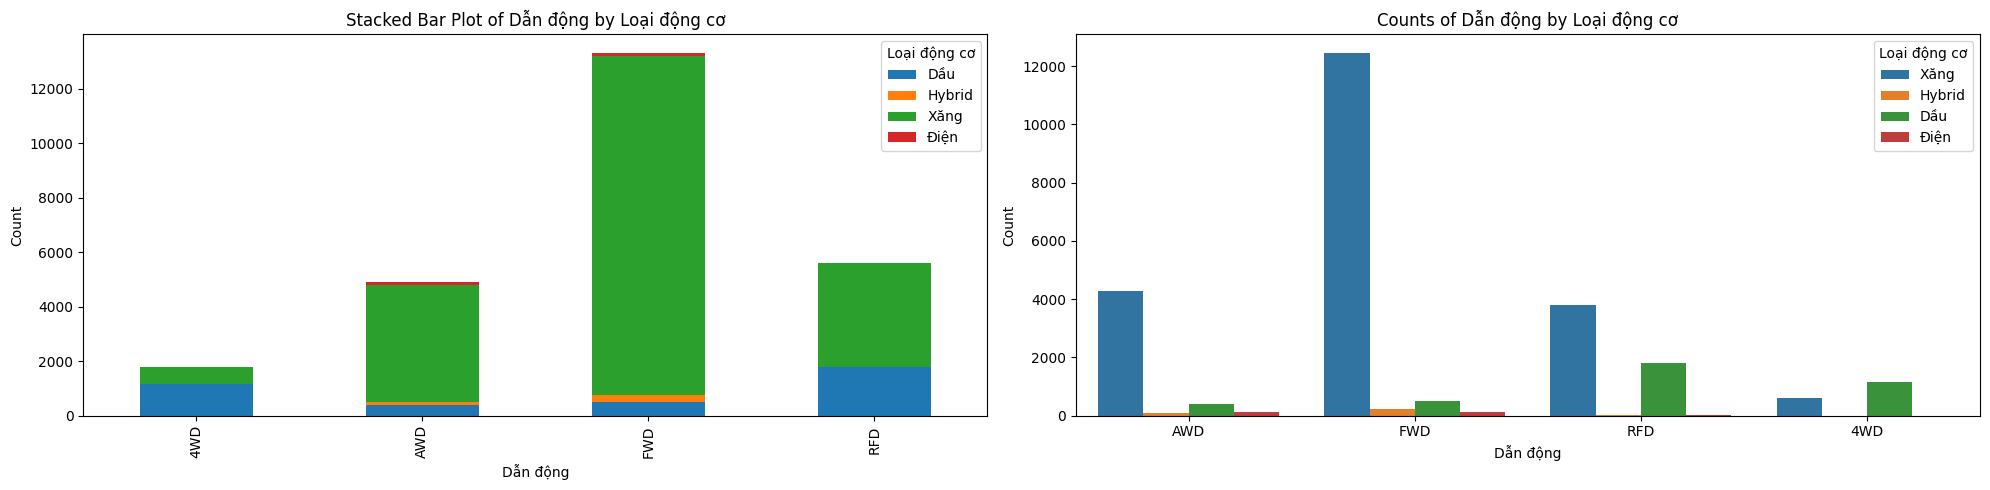

In [59]:
for i in range(len(categorical_column)):
    for j in range(i + 1, len(categorical_column)):
        # Tabulation
        tab = pd.crosstab(df[categorical_column[i]], df[categorical_column[j]])

        # Create subplots
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

        # Stacked Bar Plot
        tab.plot(kind='bar', stacked=True, ax=axes[0])
        axes[0].set_xlabel(categorical_column[i])
        axes[0].set_ylabel('Count')
        axes[0].set_title(f'Stacked Bar Plot of {categorical_column[i]} by {categorical_column[j]}')

        # Grouped Bar Plot
        sns.countplot(data=df, x=categorical_column[i], hue=categorical_column[j], ax=axes[1])
        axes[1].set_xlabel(categorical_column[i])
        axes[1].set_ylabel('Count')
        axes[1].set_title(f'Counts of {categorical_column[i]} by {categorical_column[j]}')

        plt.tight_layout()
        plt.show()

#### Kiểm tra thống kê

In [60]:
cat_columns=[]
for column in df.columns:
    if df[column].dtype== object:
        cat_columns.append(column)
        
# Create an empty dictionary to store chi-square test results
chi_square_results = {}

# Tabulation and Chi-Square Test
for i in range(len(cat_columns)):
    for j in range(i + 1, len(cat_columns)):
        # Tabulation
        tab = pd.crosstab(df[cat_columns[i]], df[cat_columns[j]])
        
        # Perform chi-square test of independence
        chi2, p_value, dof, expected = stats.chi2_contingency(tab)
        
        # Store the results in the dictionary
        chi_square_results[(cat_columns[i], cat_columns[j])] = {'Chi-Square': chi2, 'P-Value': p_value}

# Print Chi-Square Test results
for pair, result in chi_square_results.items():
    print(f"Chi-Square Test of Independence for {pair}:")
    print(f"Chi-Square Statistic: {result['Chi-Square']}")
    print(f"P-Value: {result['P-Value']}")
    print("--------------------------------------------------")

Chi-Square Test of Independence for ('Tên hãng xe', 'Tỉnh'):
Chi-Square Statistic: 7274.635555800069
P-Value: 0.0
--------------------------------------------------
Chi-Square Test of Independence for ('Tên hãng xe', 'Xuất xứ'):
Chi-Square Statistic: 9082.242715391476
P-Value: 0.0
--------------------------------------------------
Chi-Square Test of Independence for ('Tên hãng xe', 'Kiểu dáng'):
Chi-Square Statistic: 23157.060425989992
P-Value: 0.0
--------------------------------------------------
Chi-Square Test of Independence for ('Tên hãng xe', 'Hộp số'):
Chi-Square Statistic: 2915.6298998052475
P-Value: 0.0
--------------------------------------------------
Chi-Square Test of Independence for ('Tên hãng xe', 'Màu ngoại thất'):
Chi-Square Statistic: 6926.341037576141
P-Value: 0.0
--------------------------------------------------
Chi-Square Test of Independence for ('Tên hãng xe', 'Màu nội thất'):
Chi-Square Statistic: 10330.104228784912
P-Value: 0.0
------------------------------

## Chia tập dữ liệu huấn luyện và kiểm thử

In [61]:
df = pd.read_pickle("data/clean/cars.pkl")

In [62]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.to_csv("data/train/cars_train.csv", index=False)
train_df.to_pickle("data/train/cars_train.pkl")
test_df.to_csv("data/train/cars_test.csv", index=False)
test_df.to_pickle("data/train/cars_test.pkl")